In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
from fragmenter import chemi, torsions, utils
import re
import numpy as np
import glob

In [2]:
with open('psi4_final_energies.json', 'r') as f:
    final_energies = json.load(f)
with open('psi4_final_molecules.json', 'r') as f:
    final_molecules = json.load(f)

In [3]:
utils.sort_energies(final_energies)
final_molecules = utils.deserialze_molecules(final_molecules)
for frag in final_molecules:
    for job in final_molecules[frag]:
        chemi.qcschema_to_xyz_traj(final_molecules[frag][job], filename='ethylene_glycol_psi4_traj.xyz')


/Users/chayastern/anaconda/envs/qcf/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


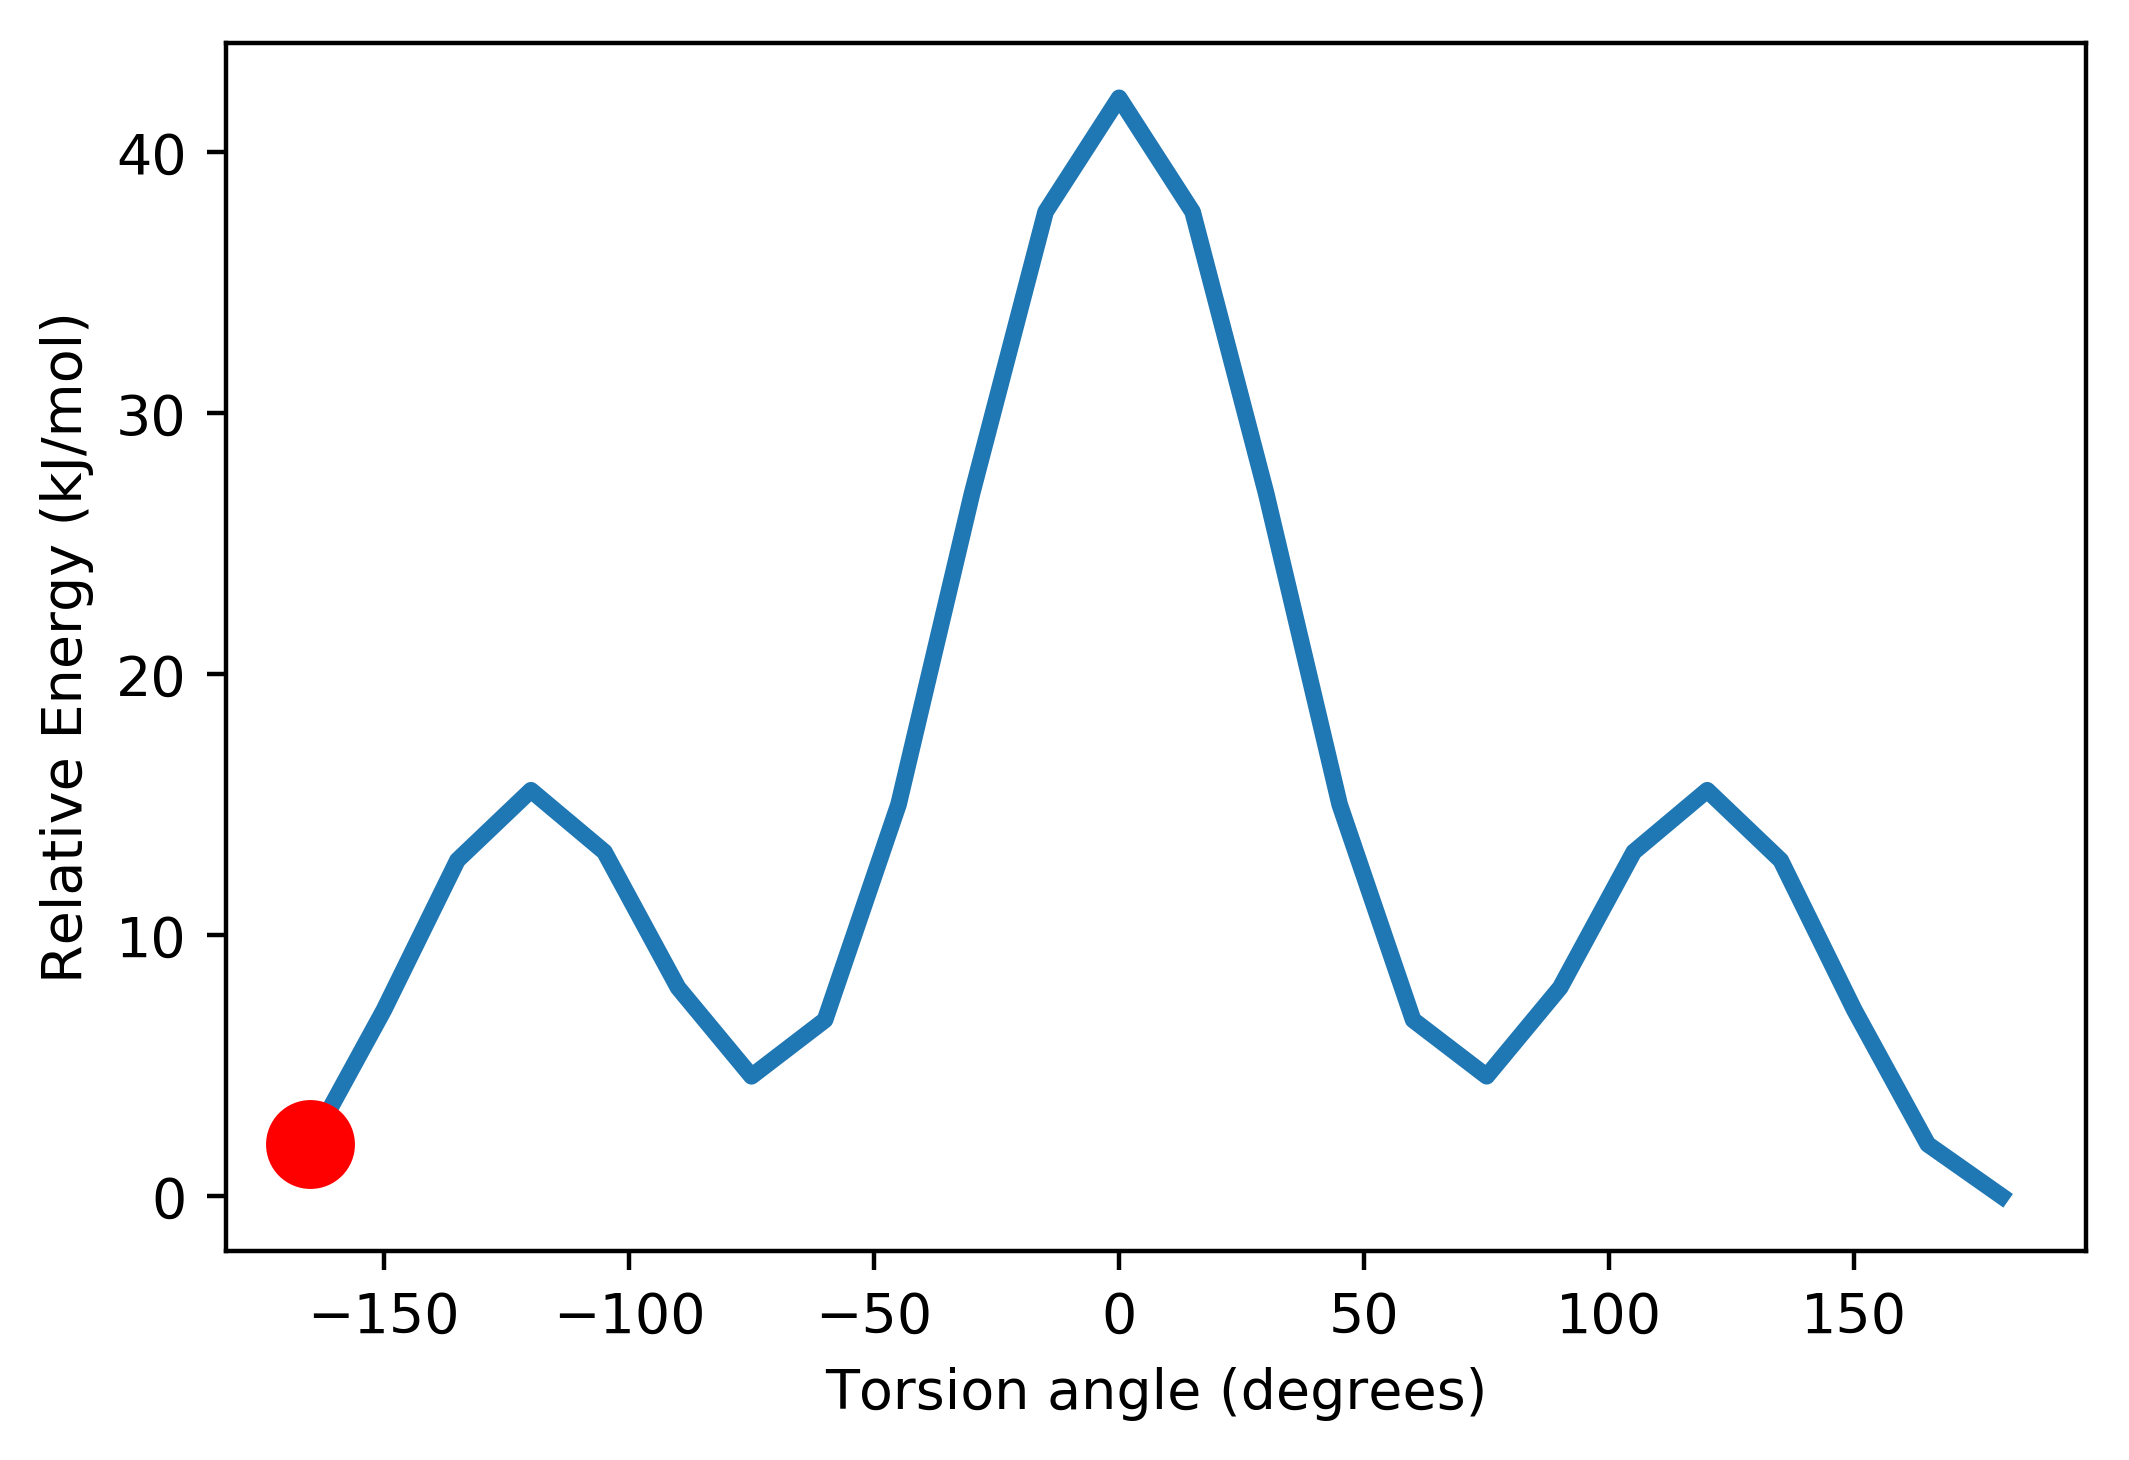

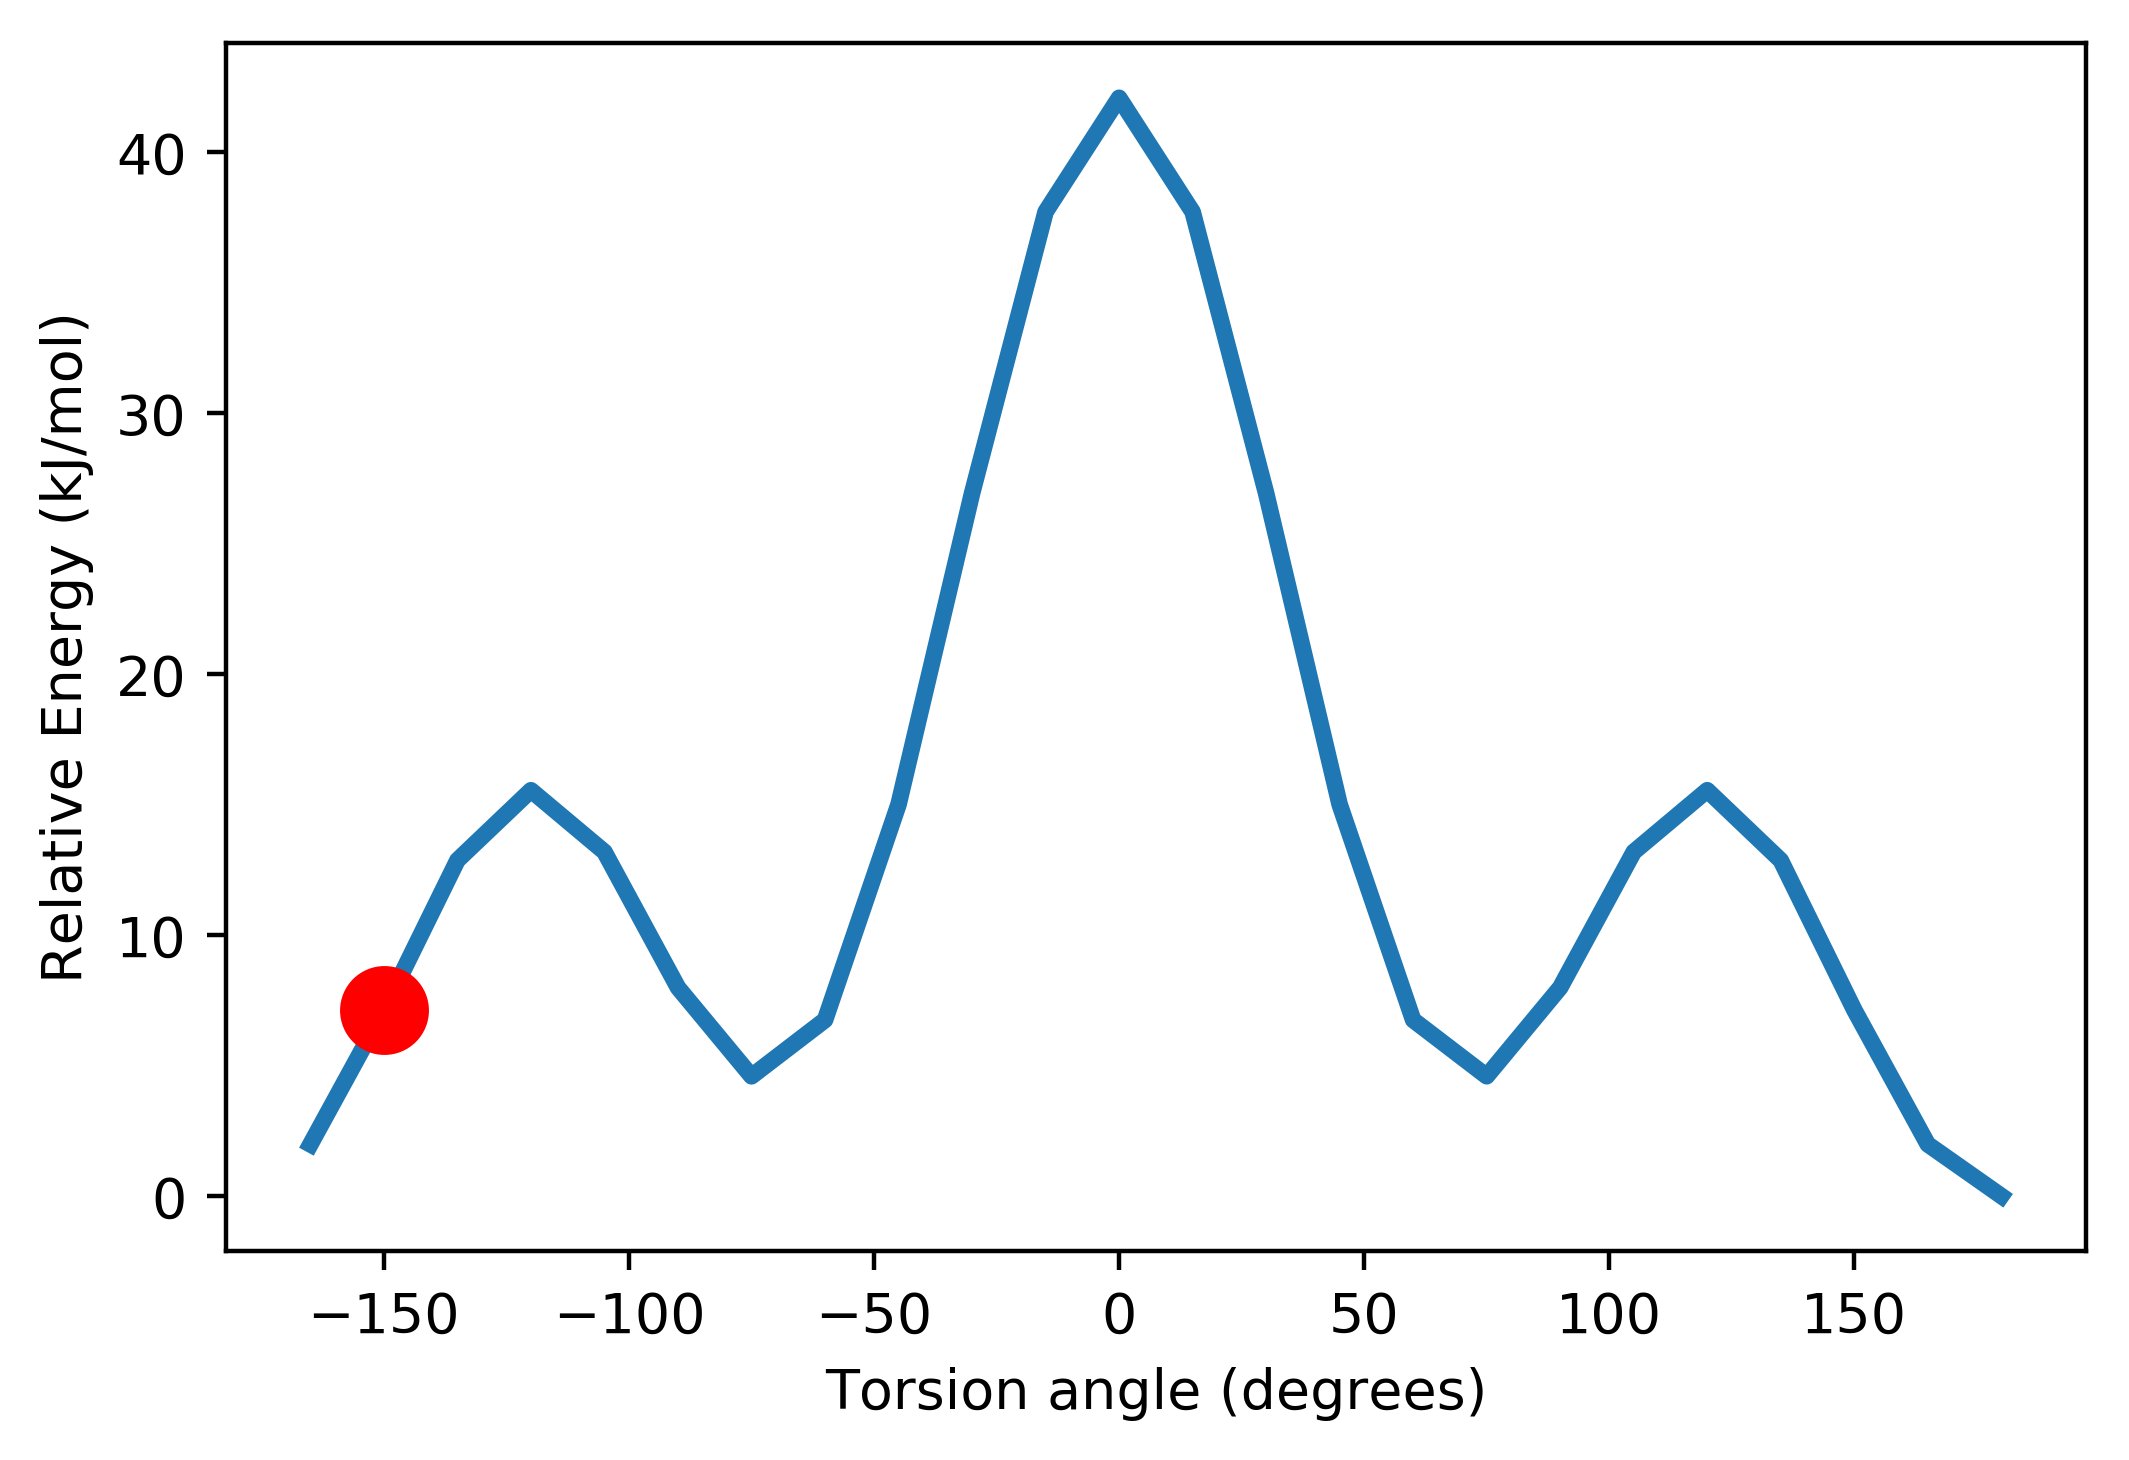

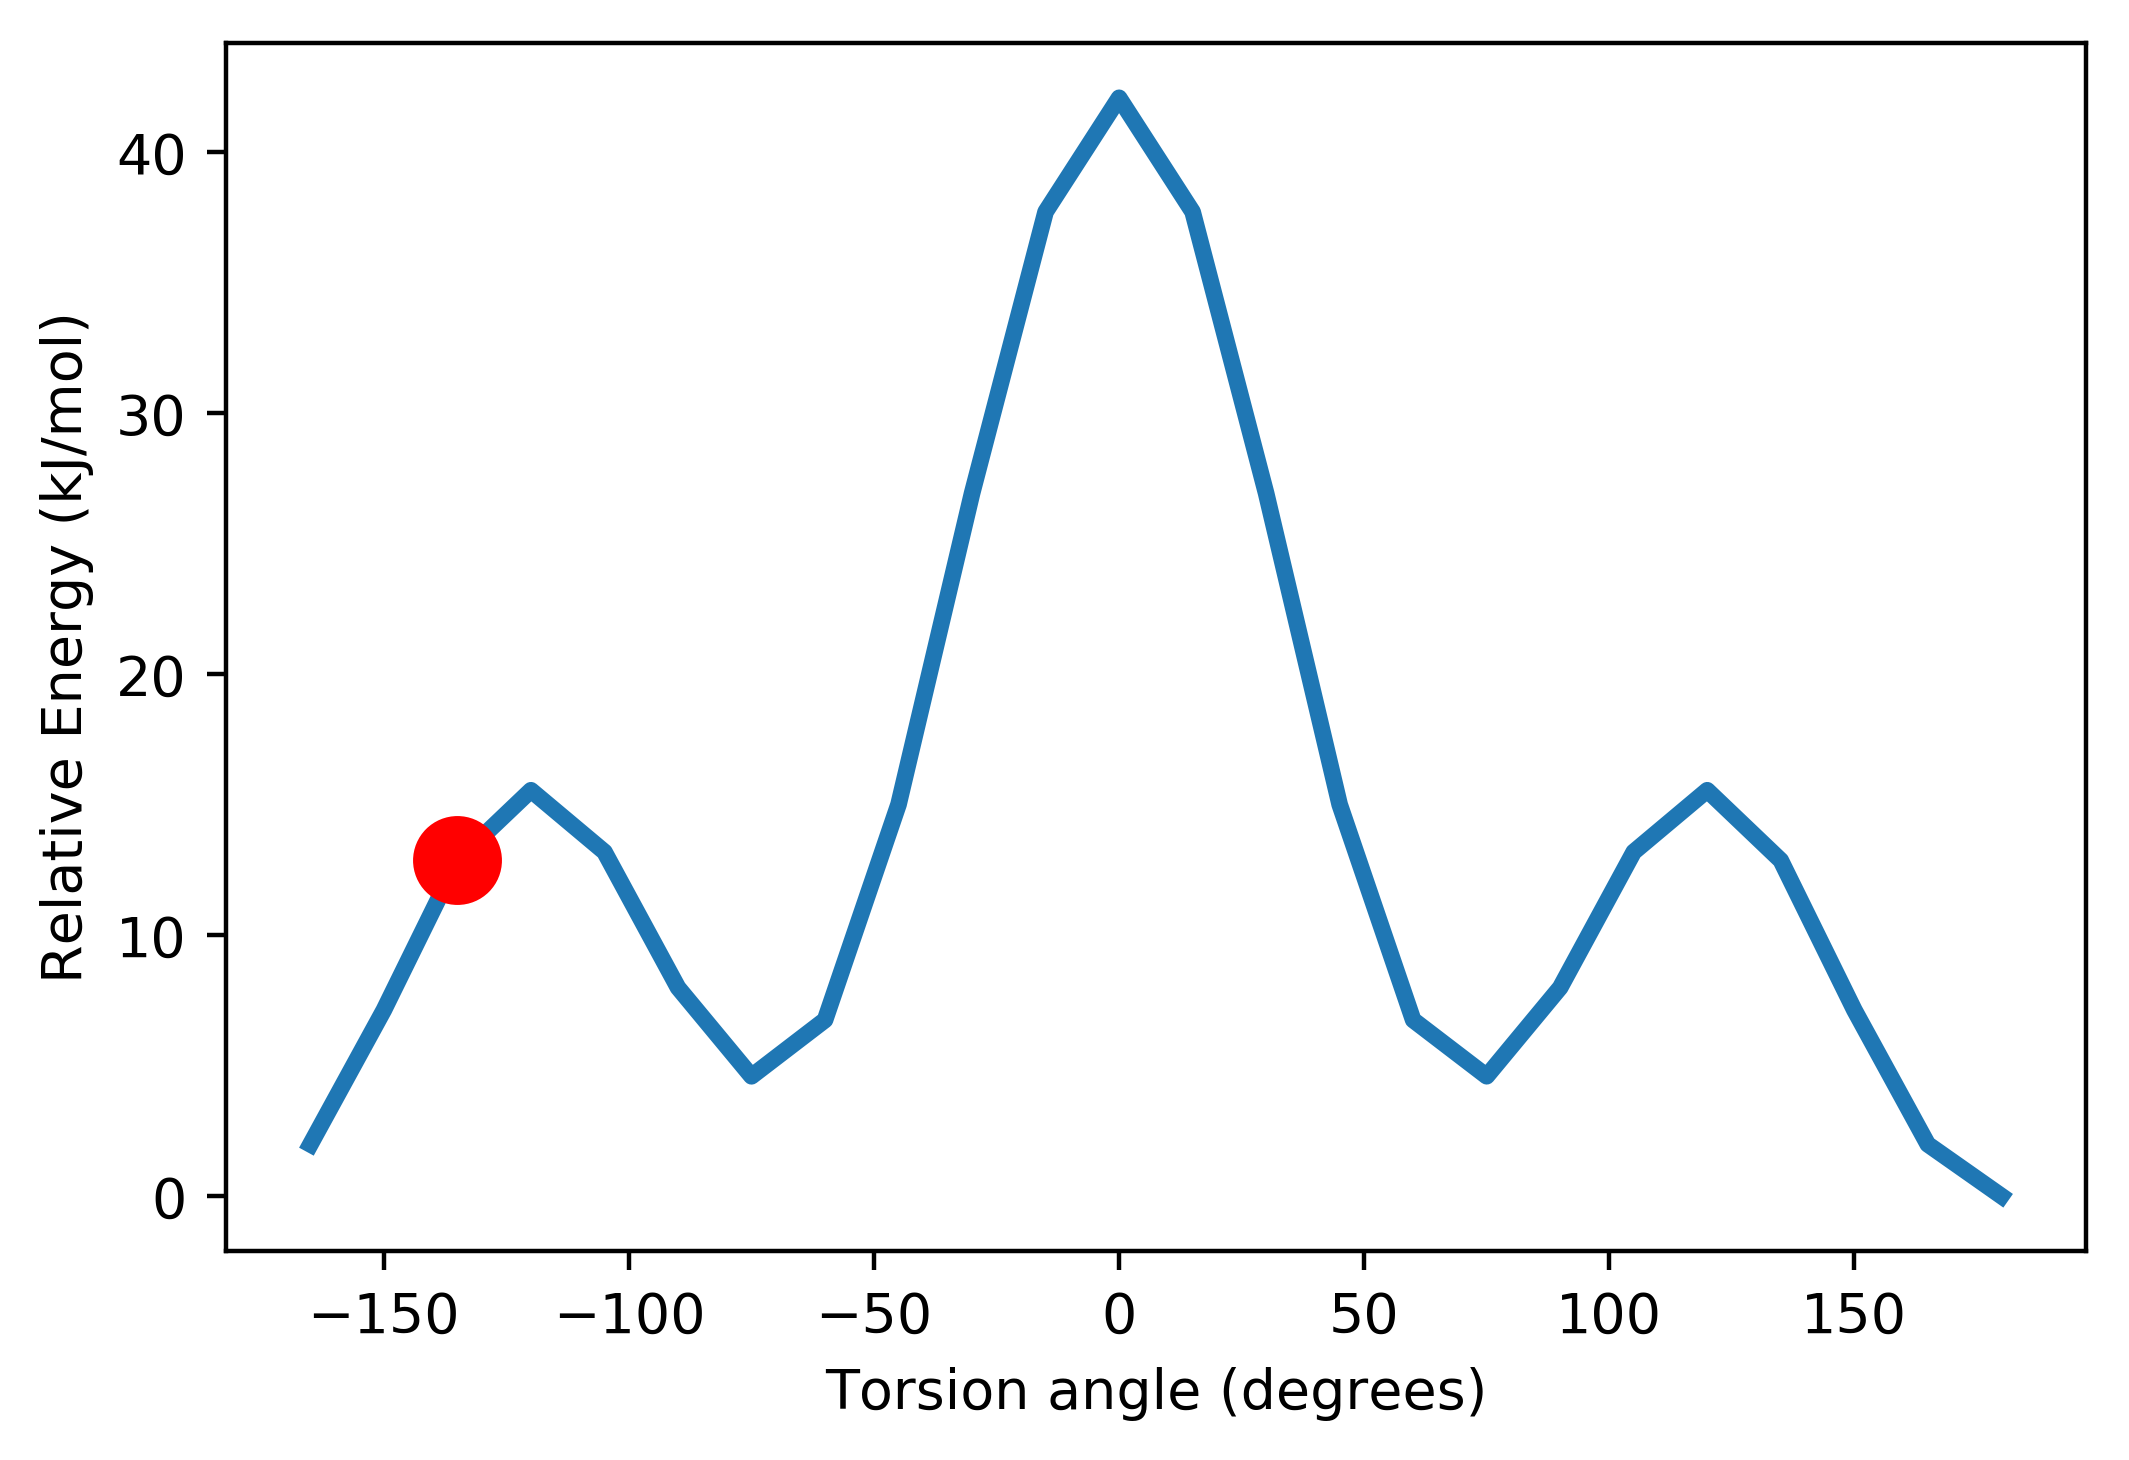

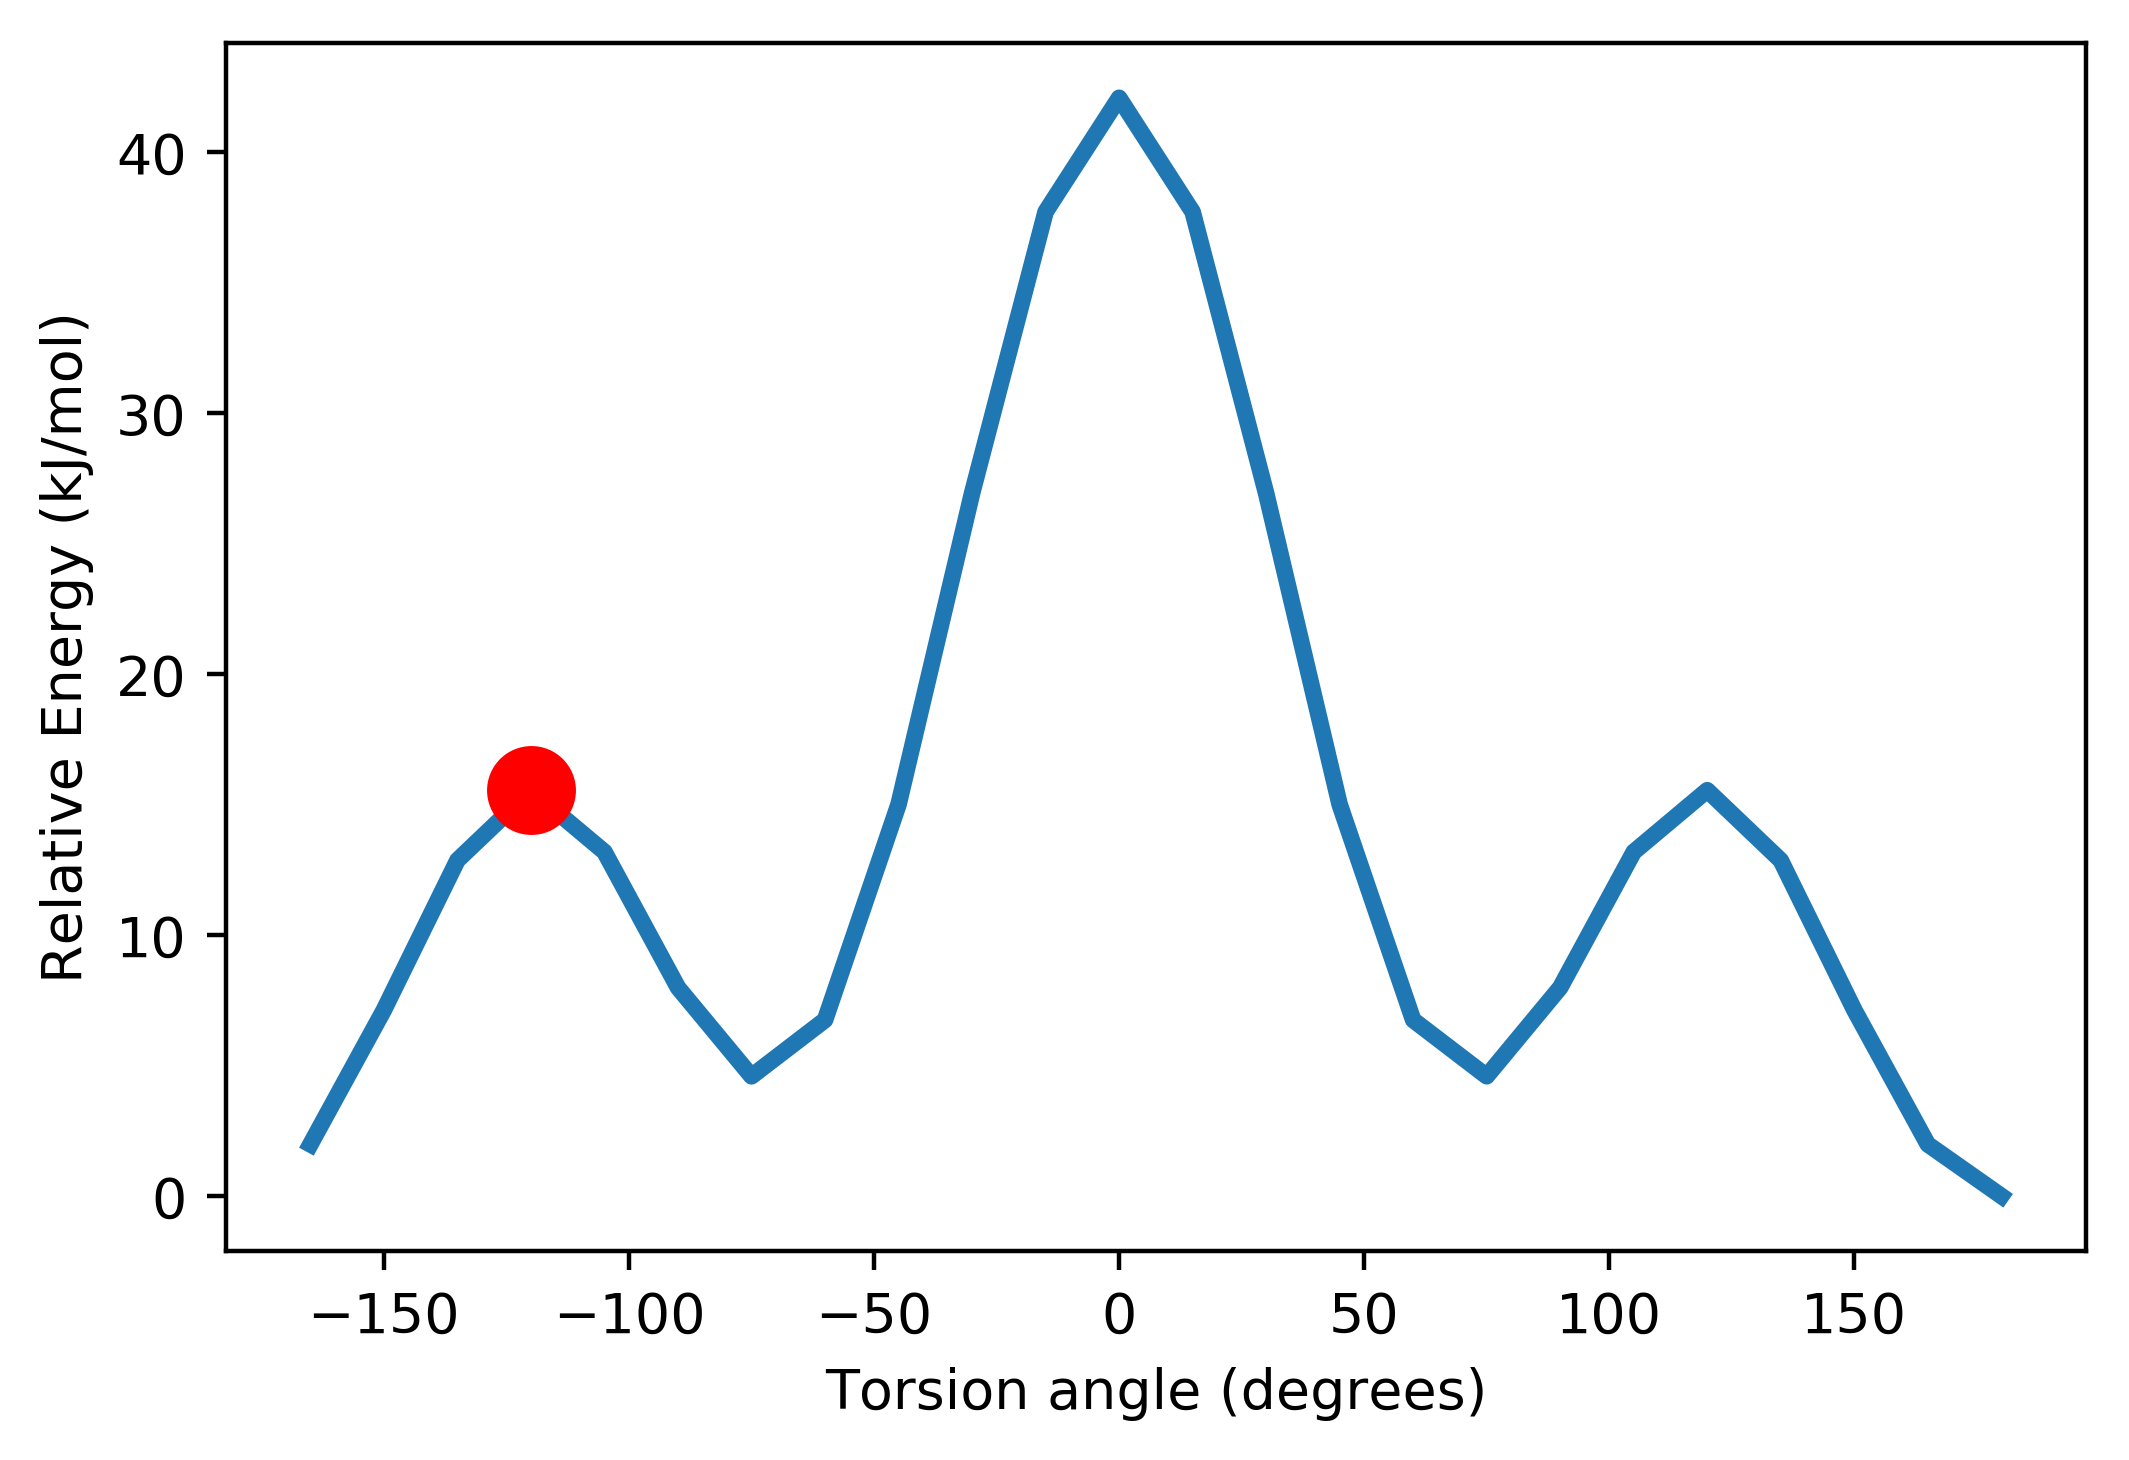

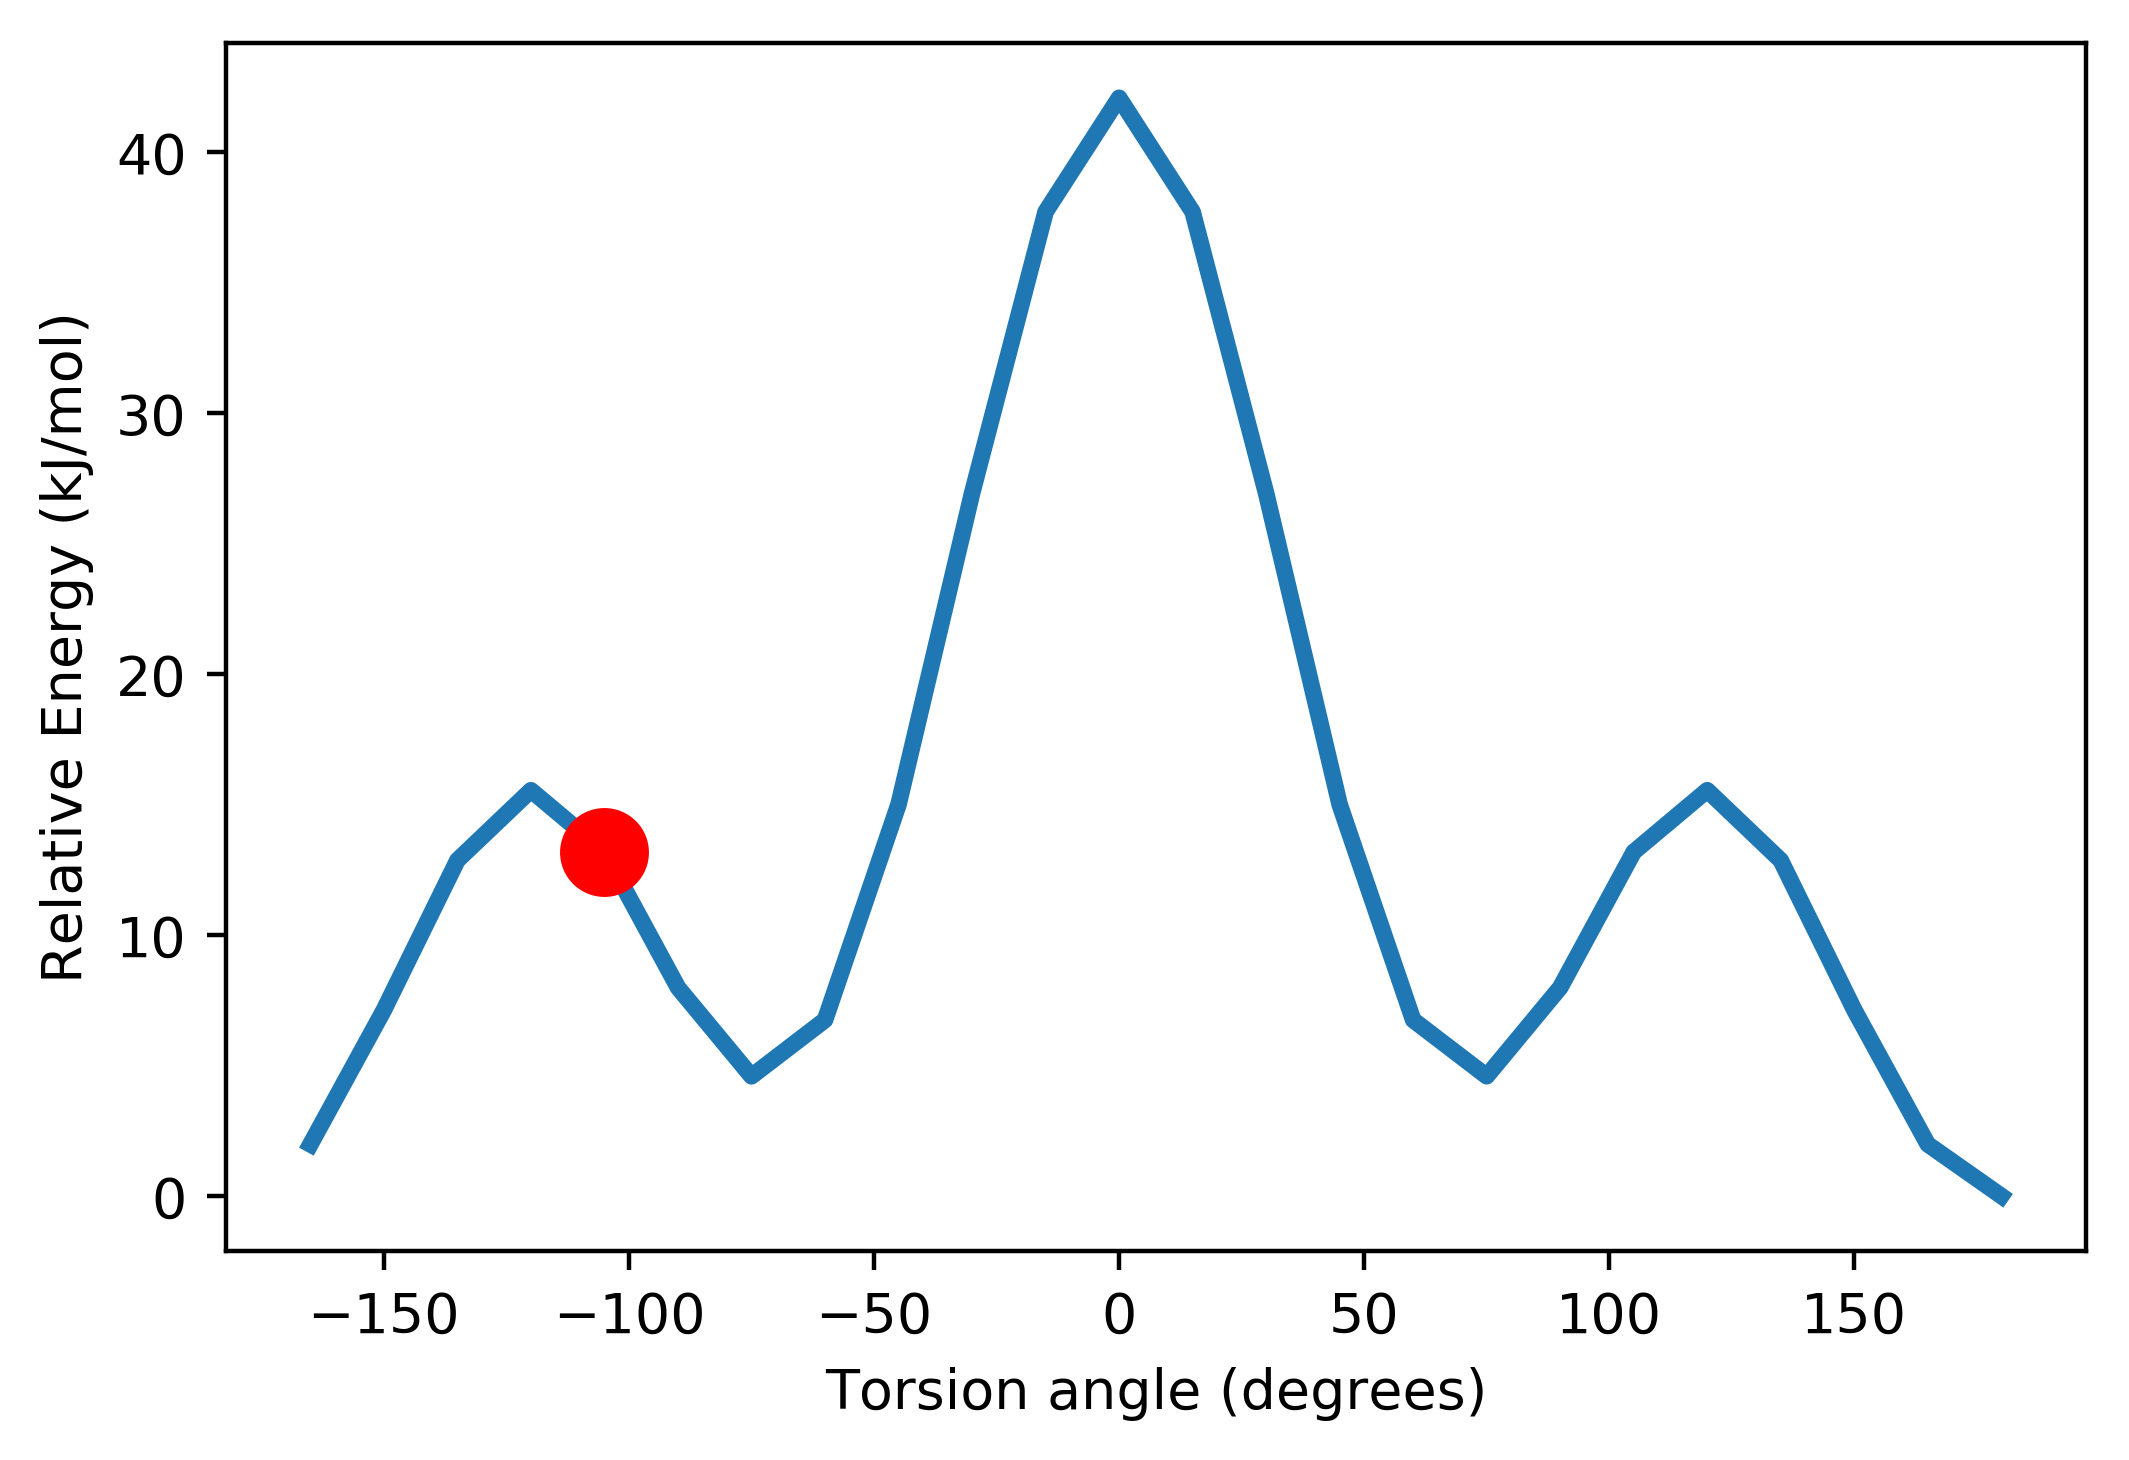

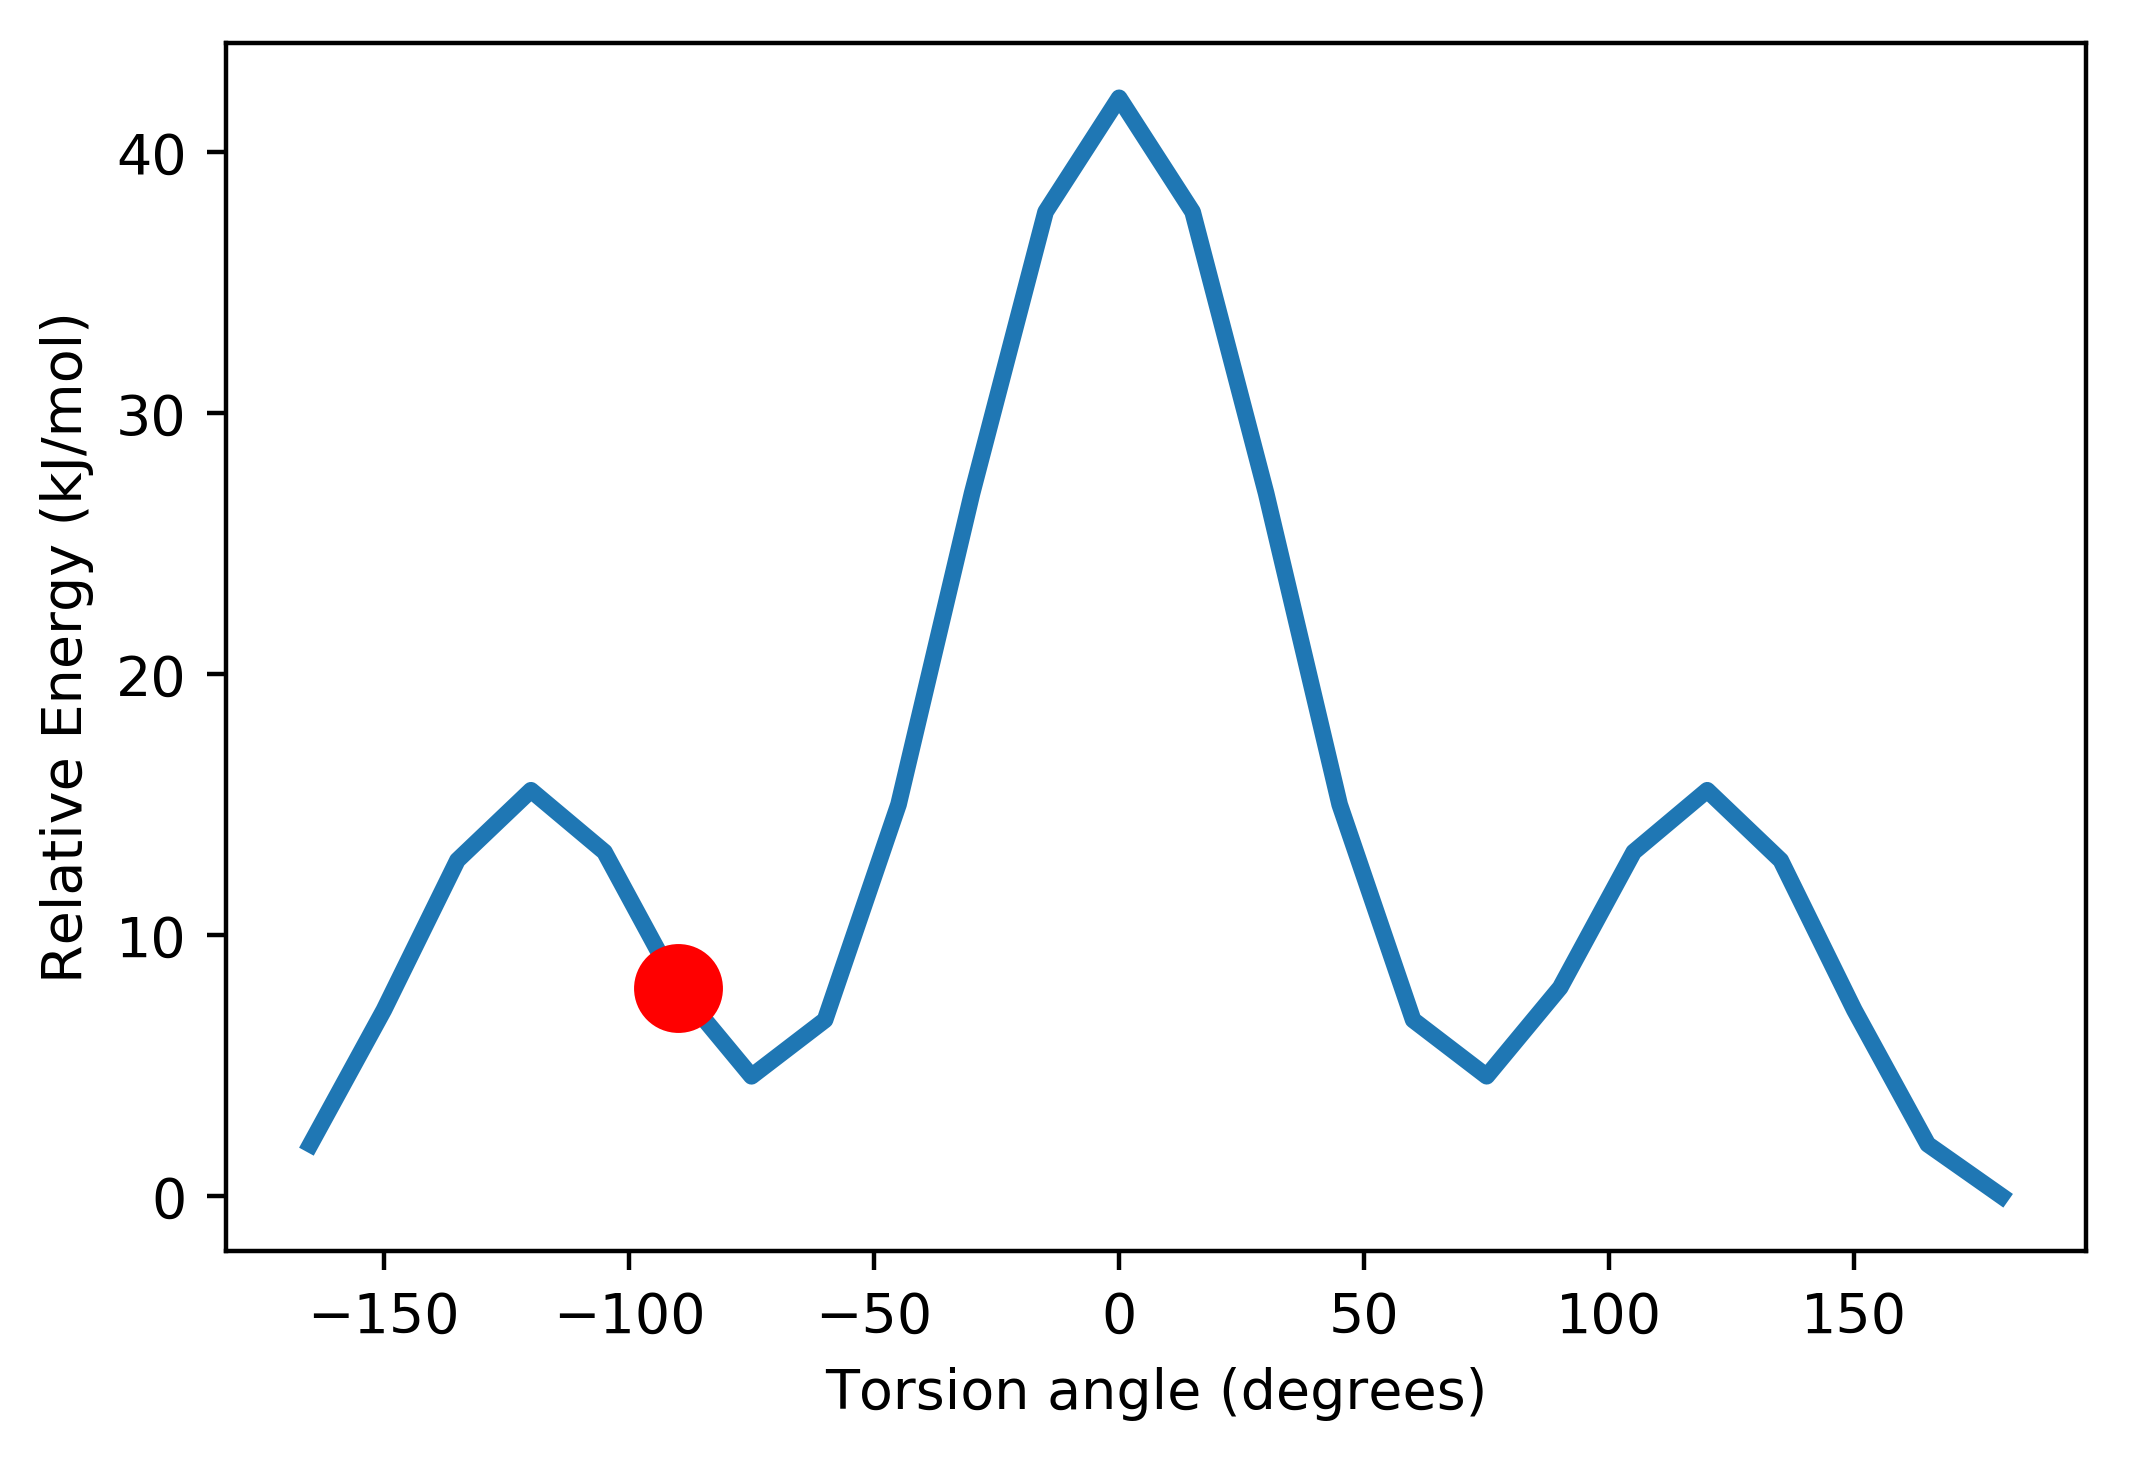

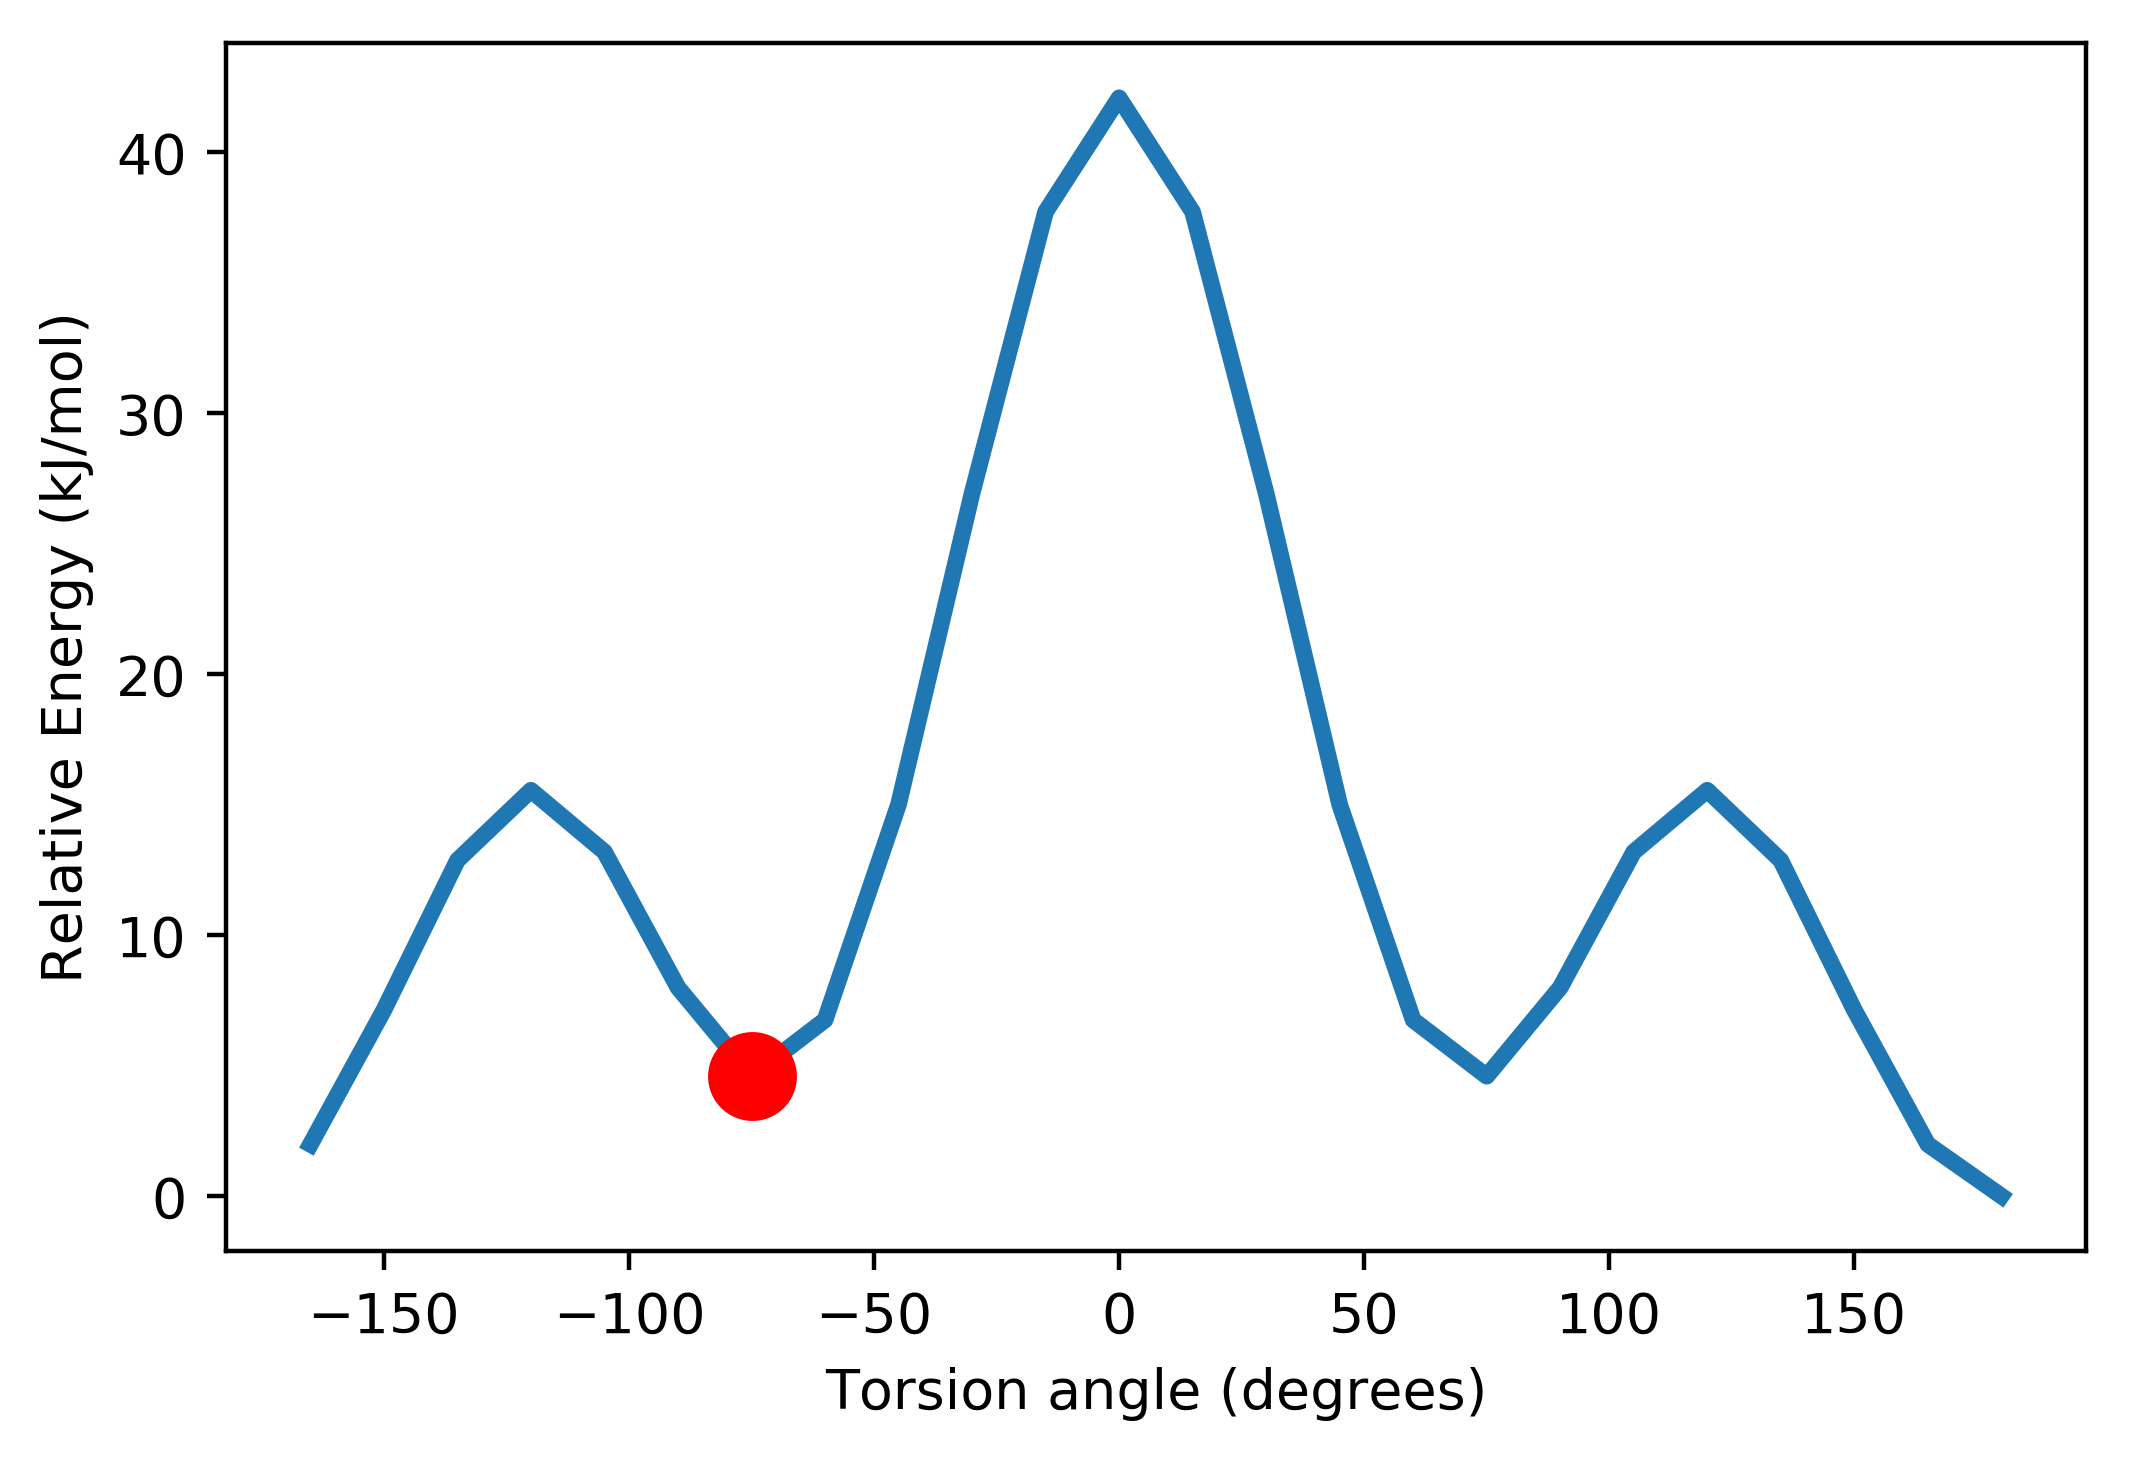

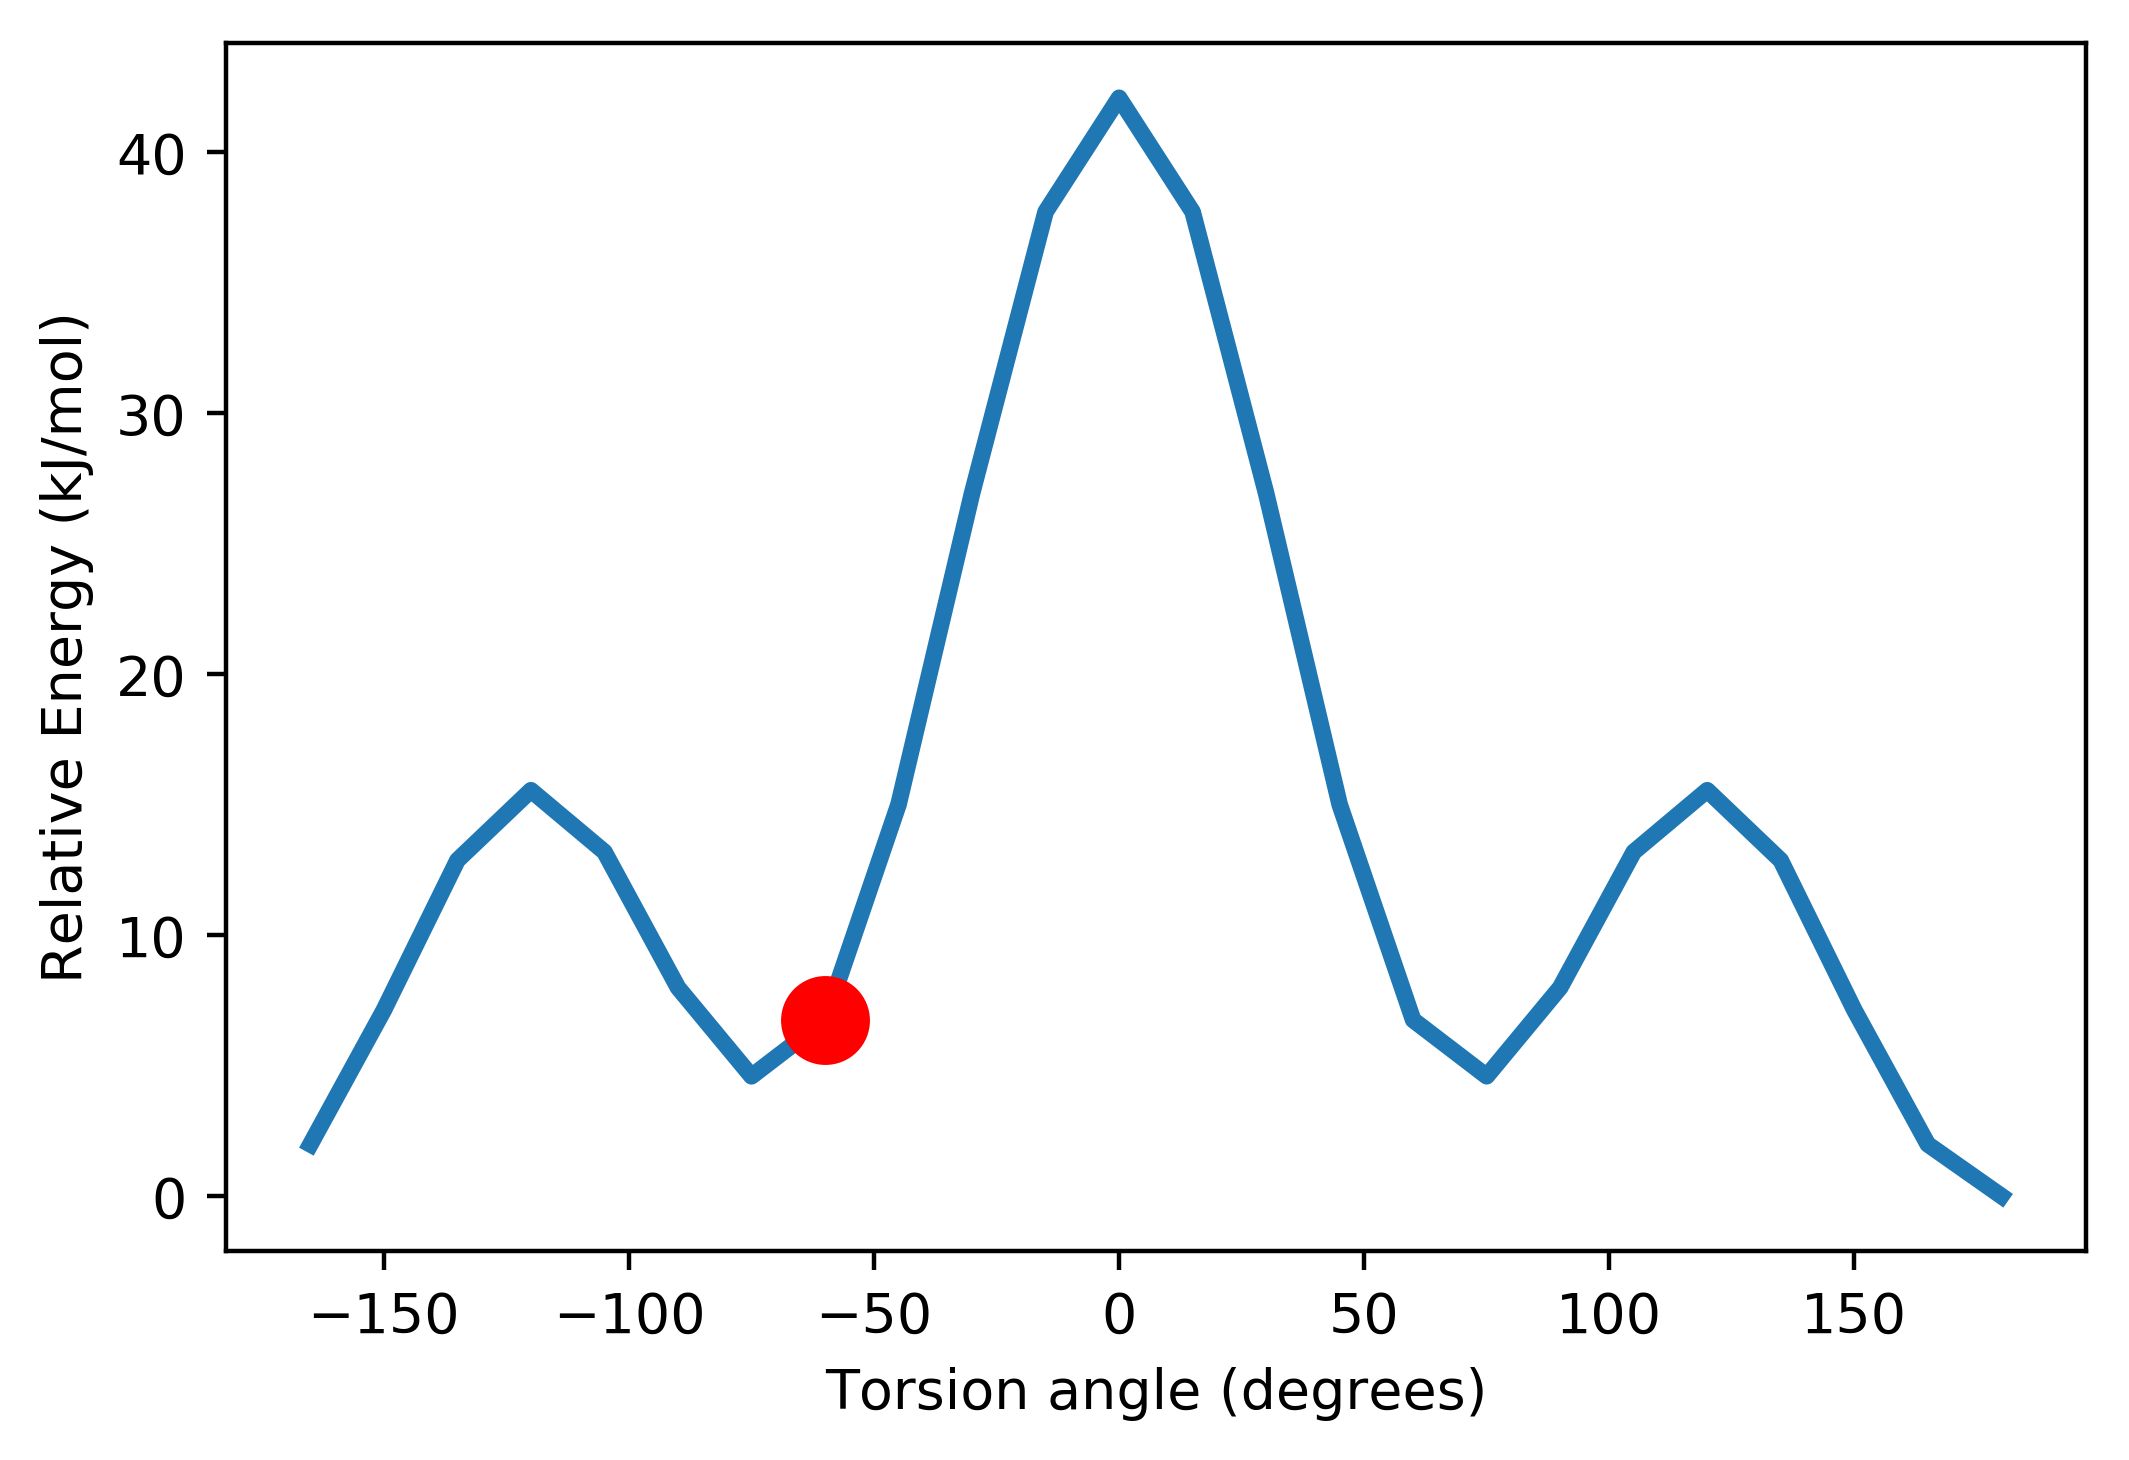

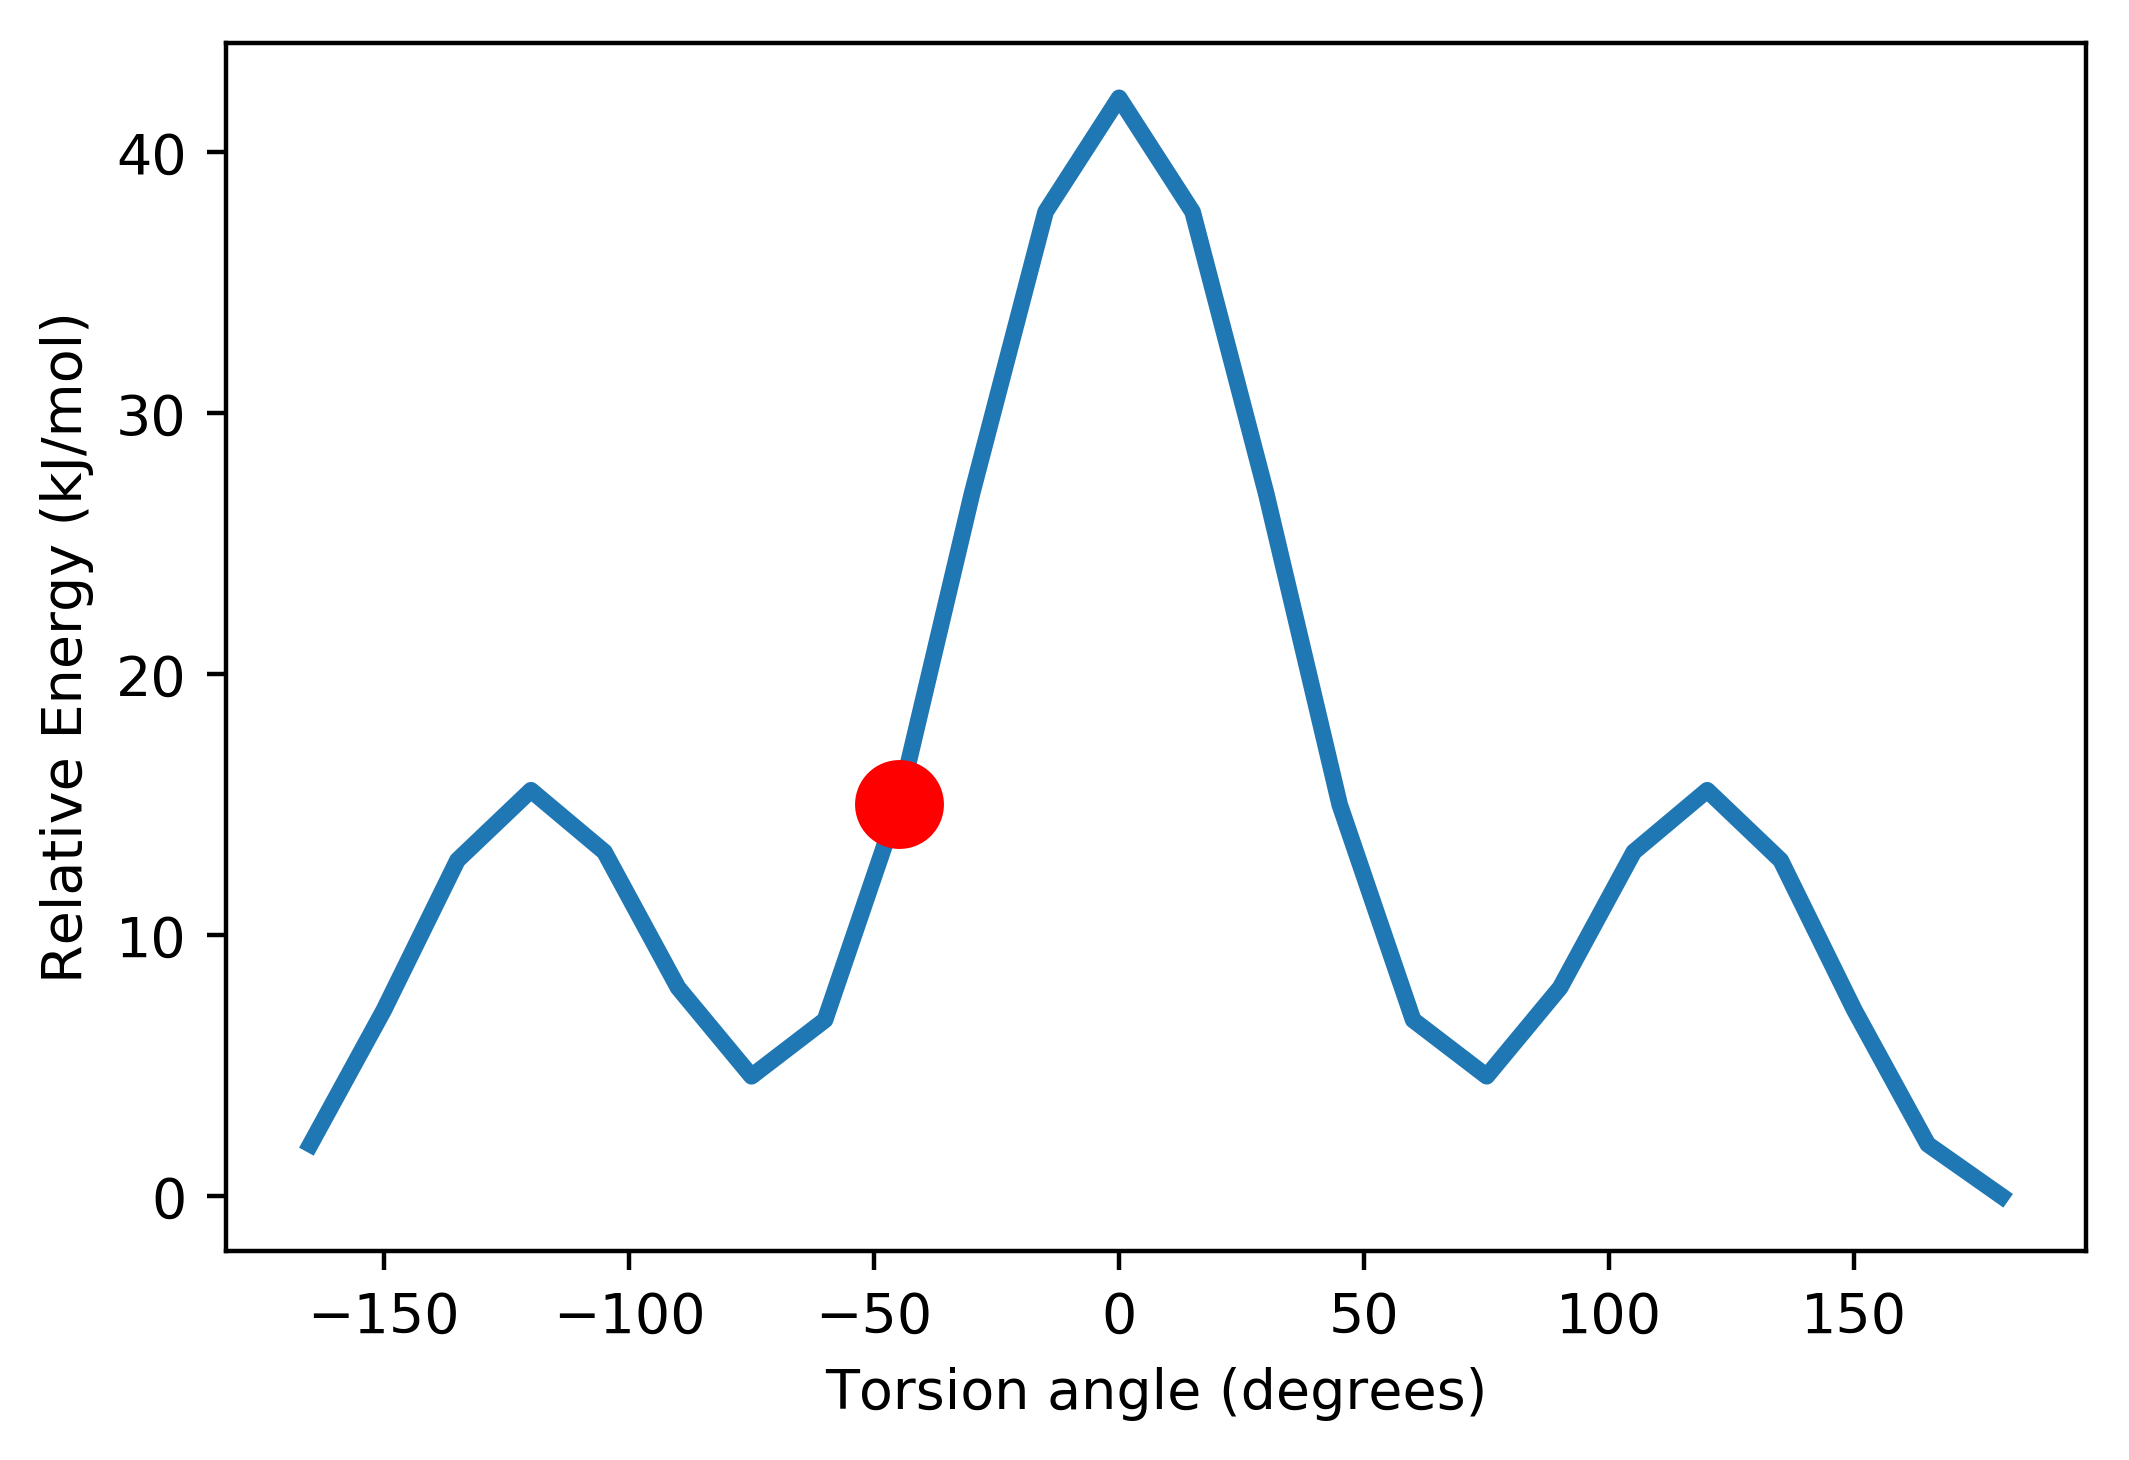

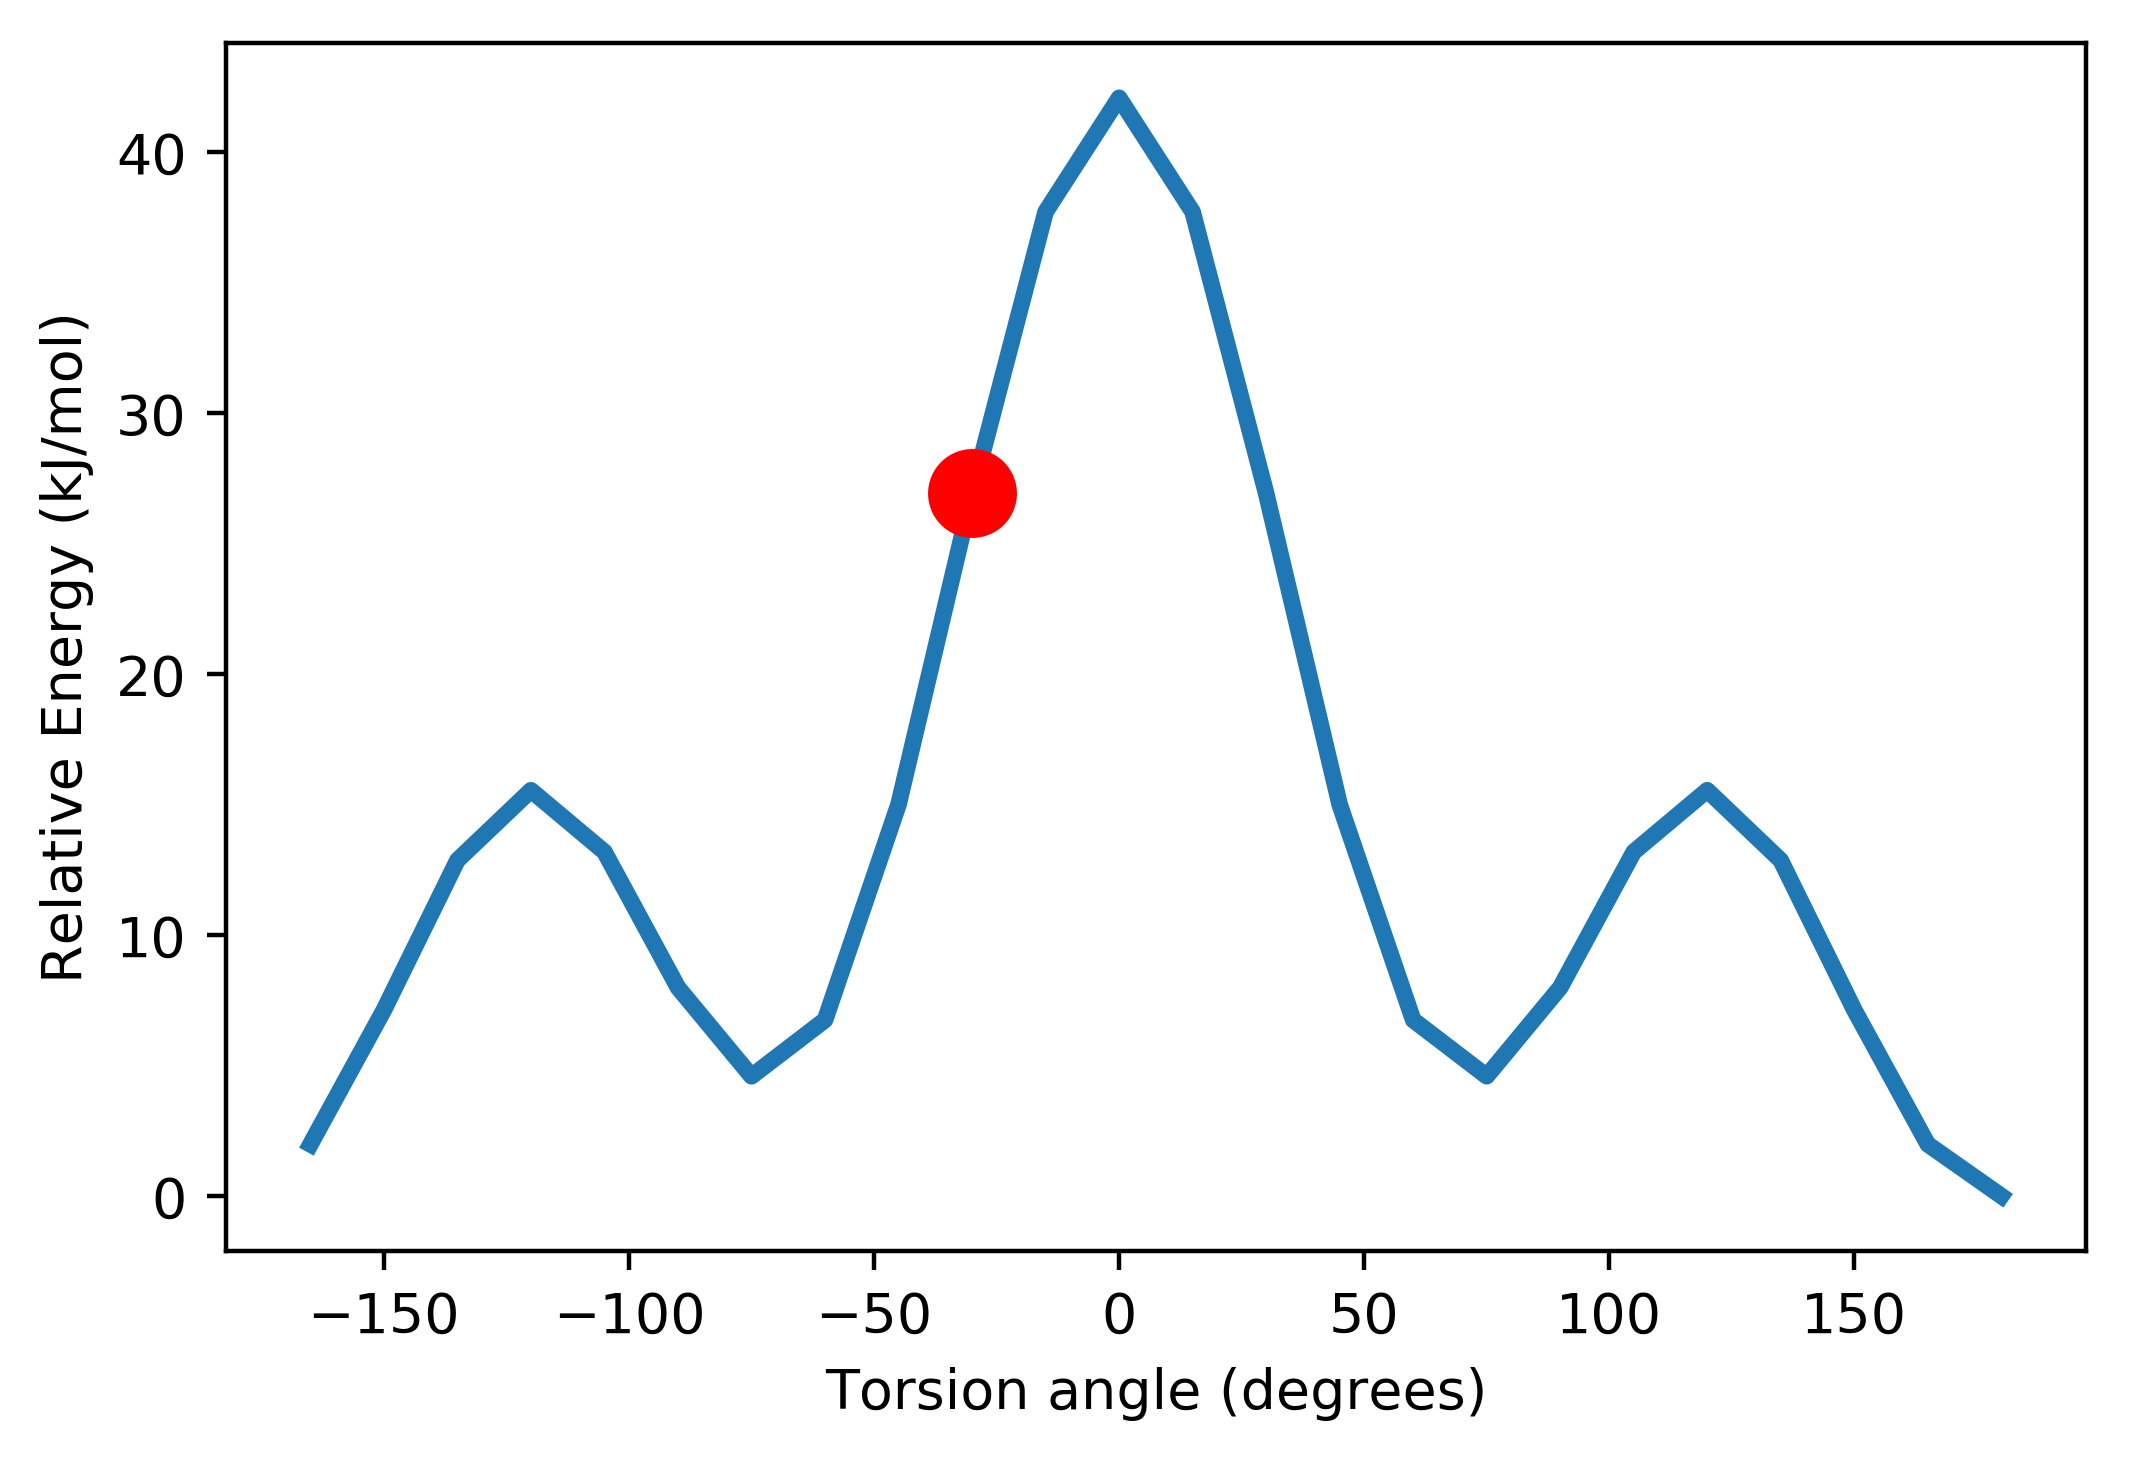

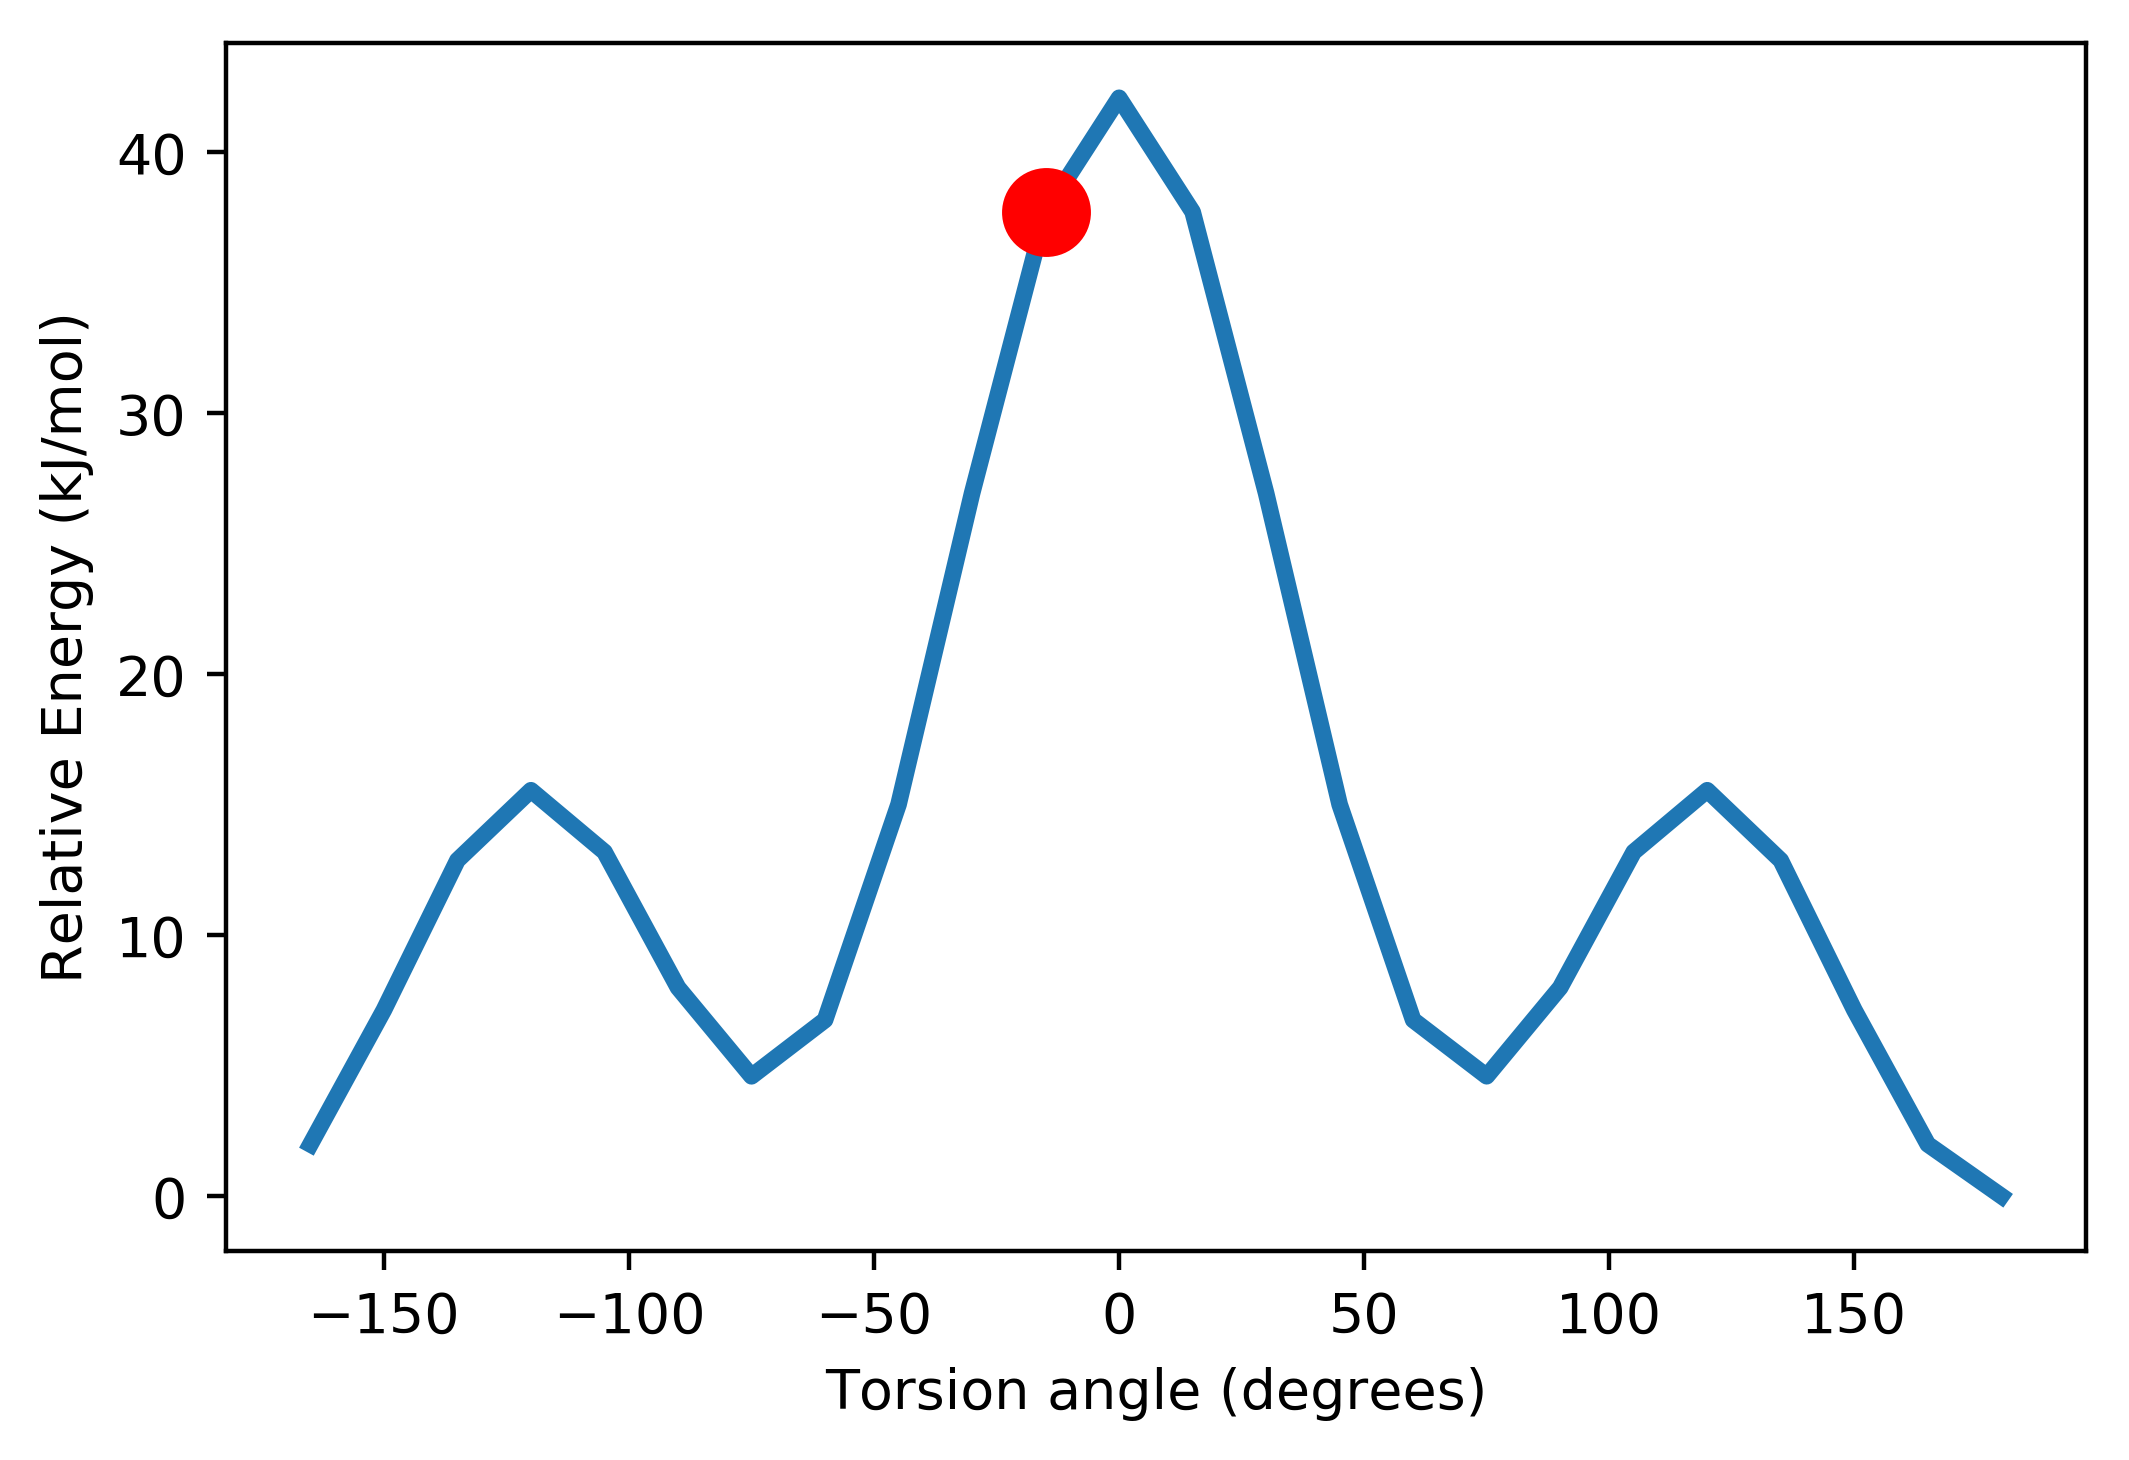

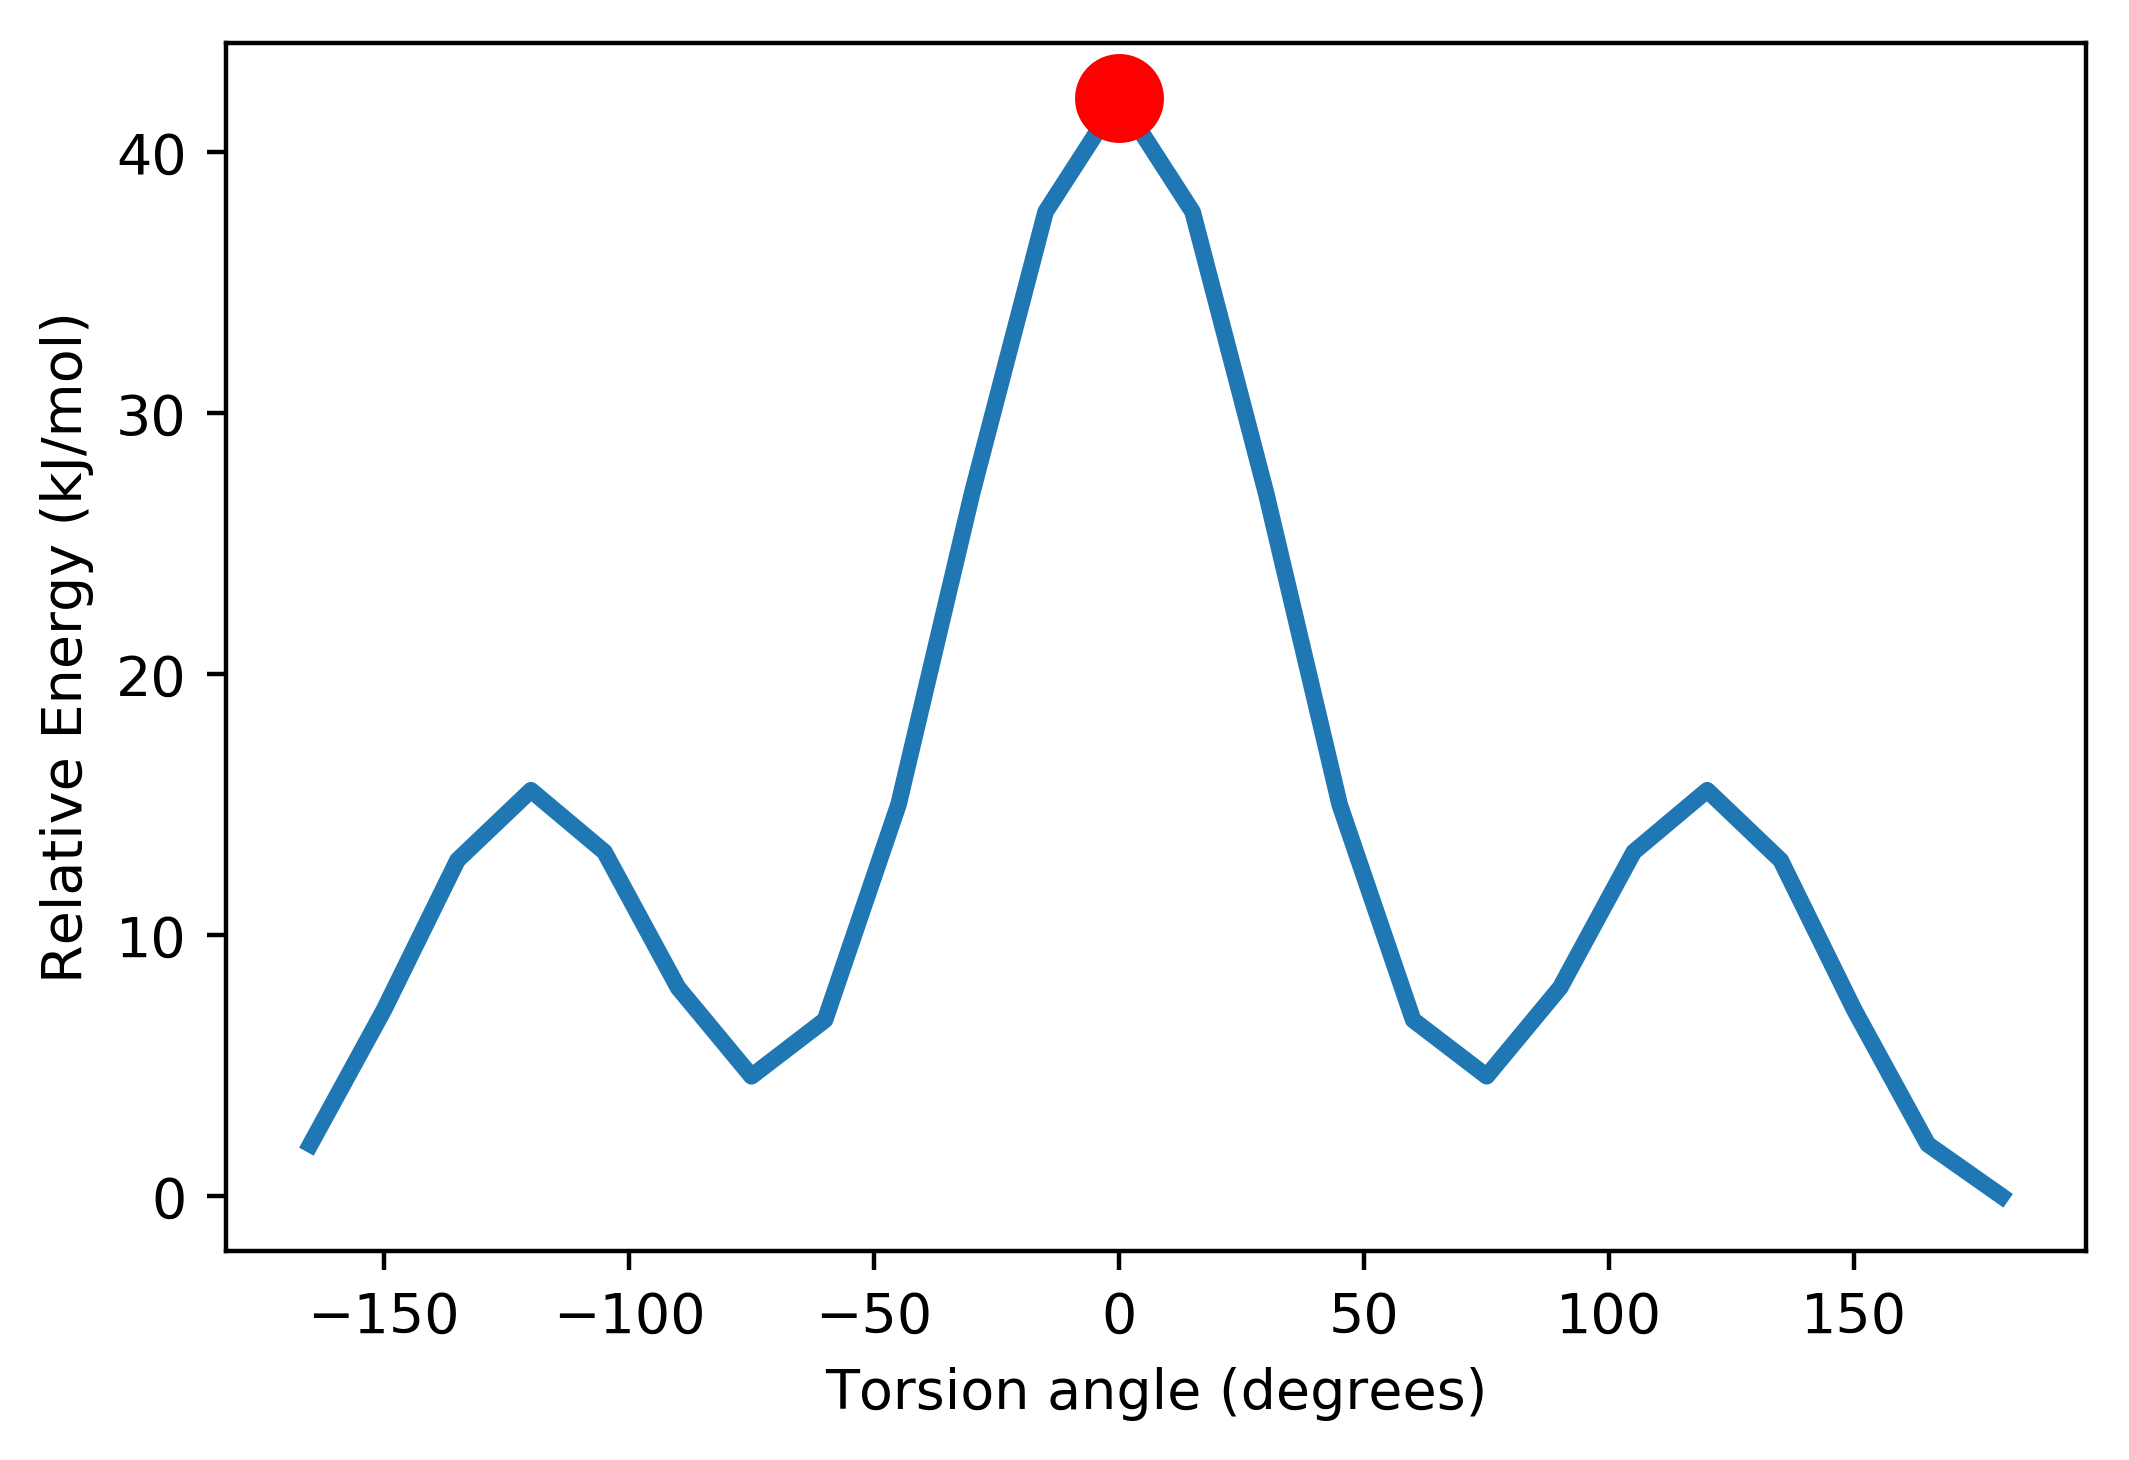

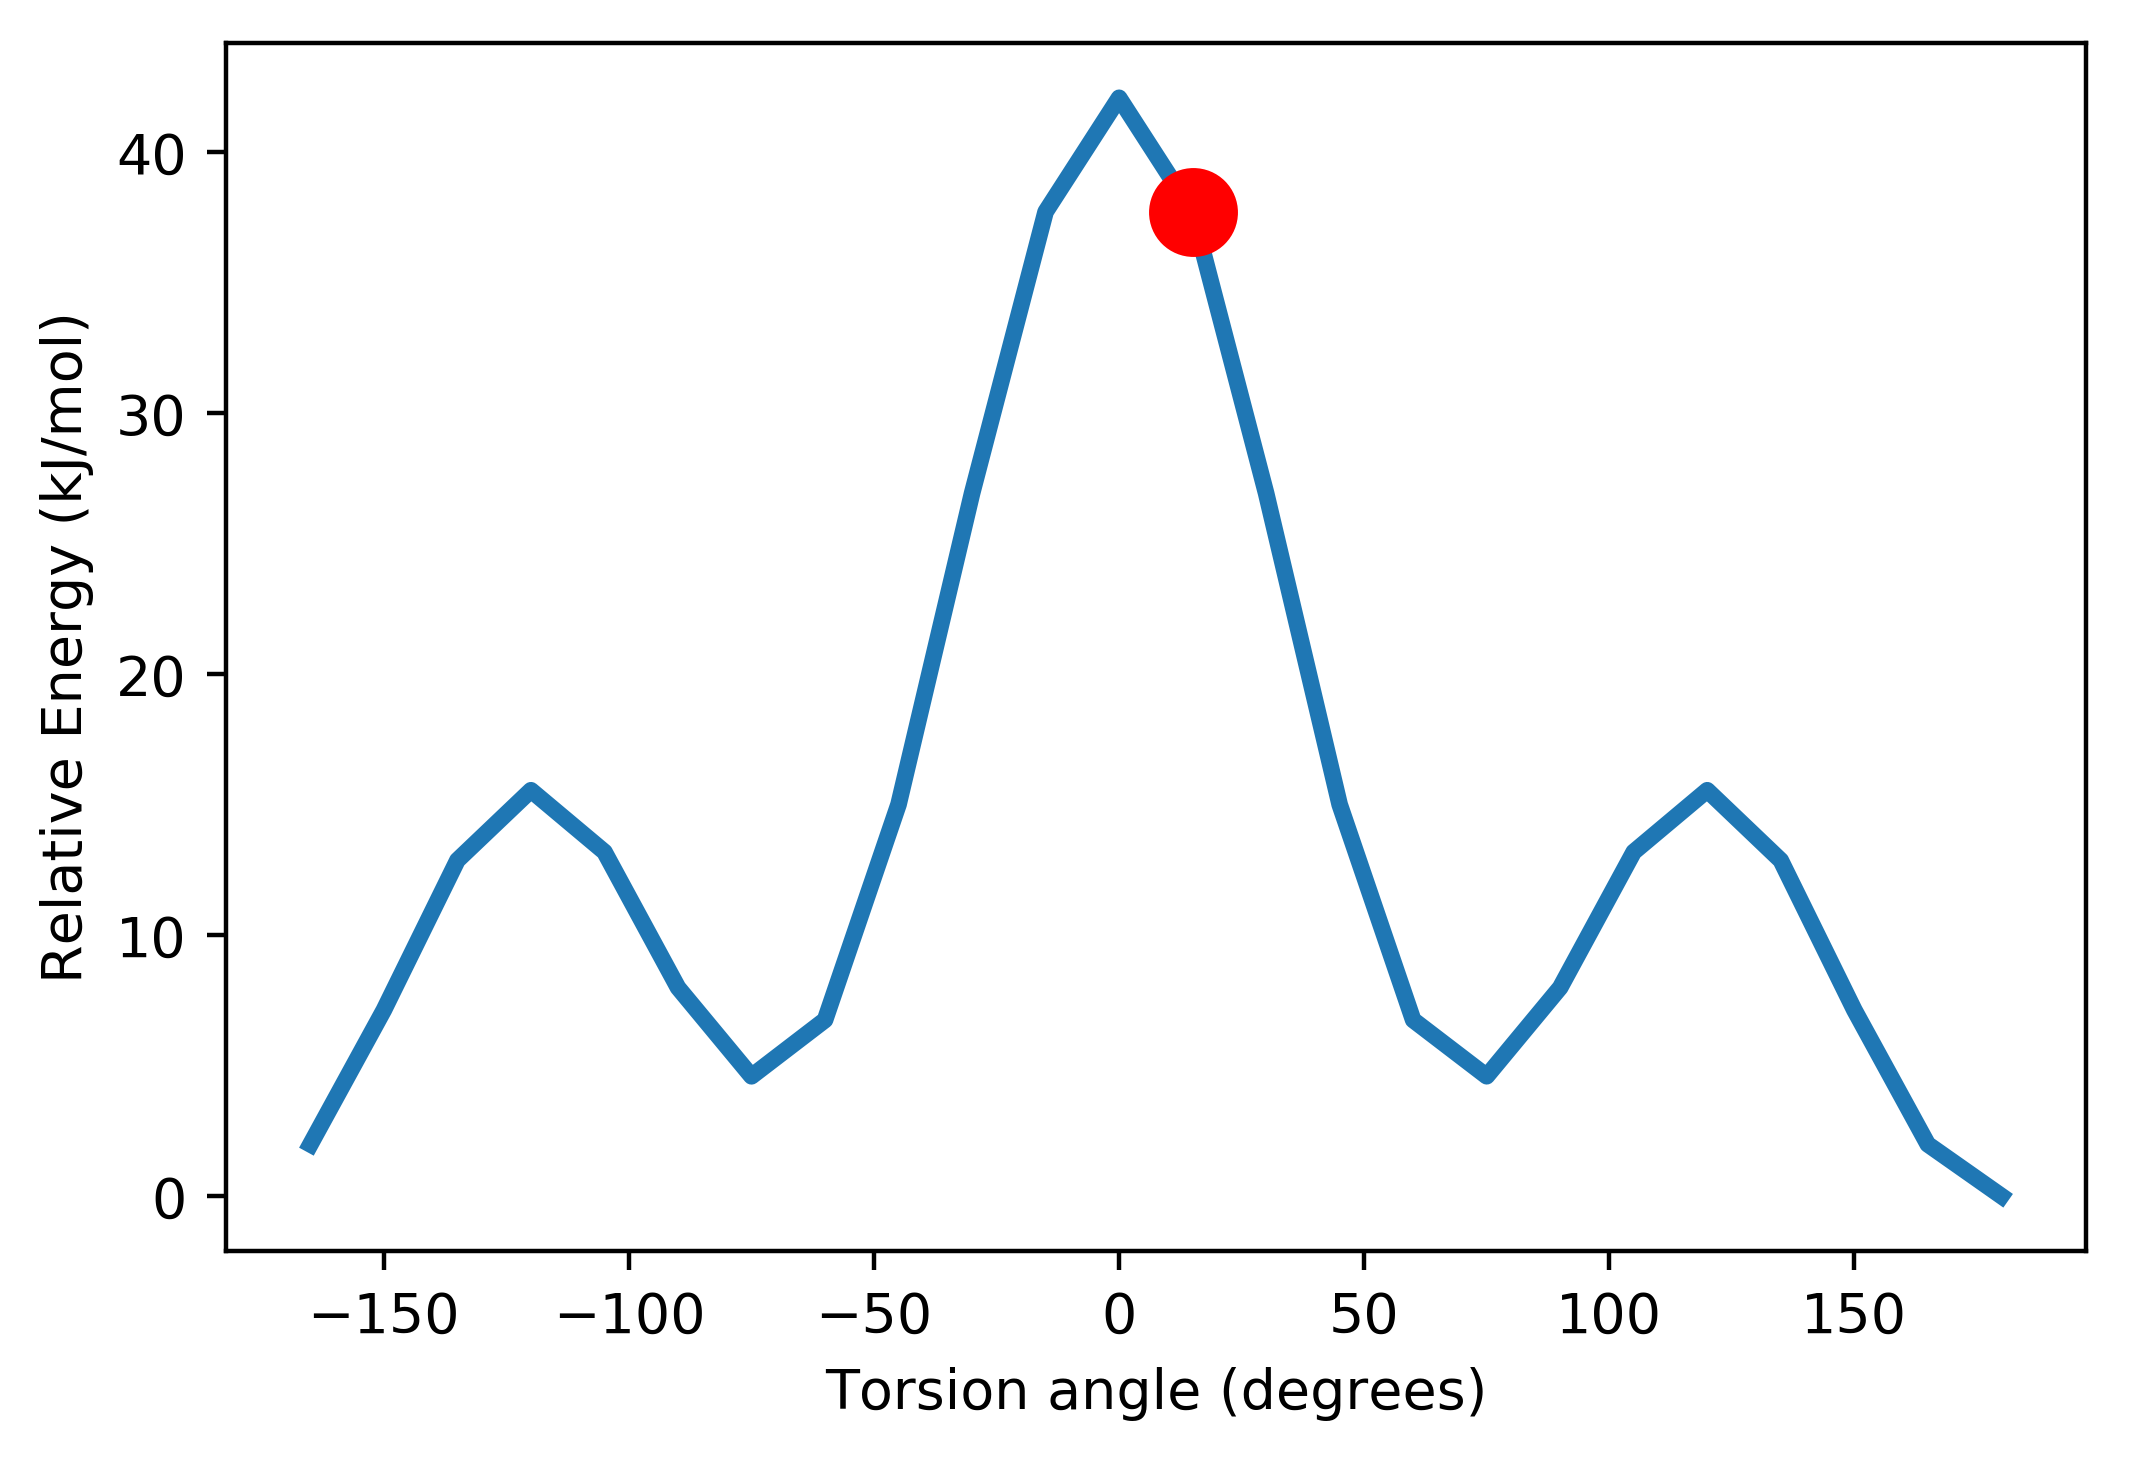

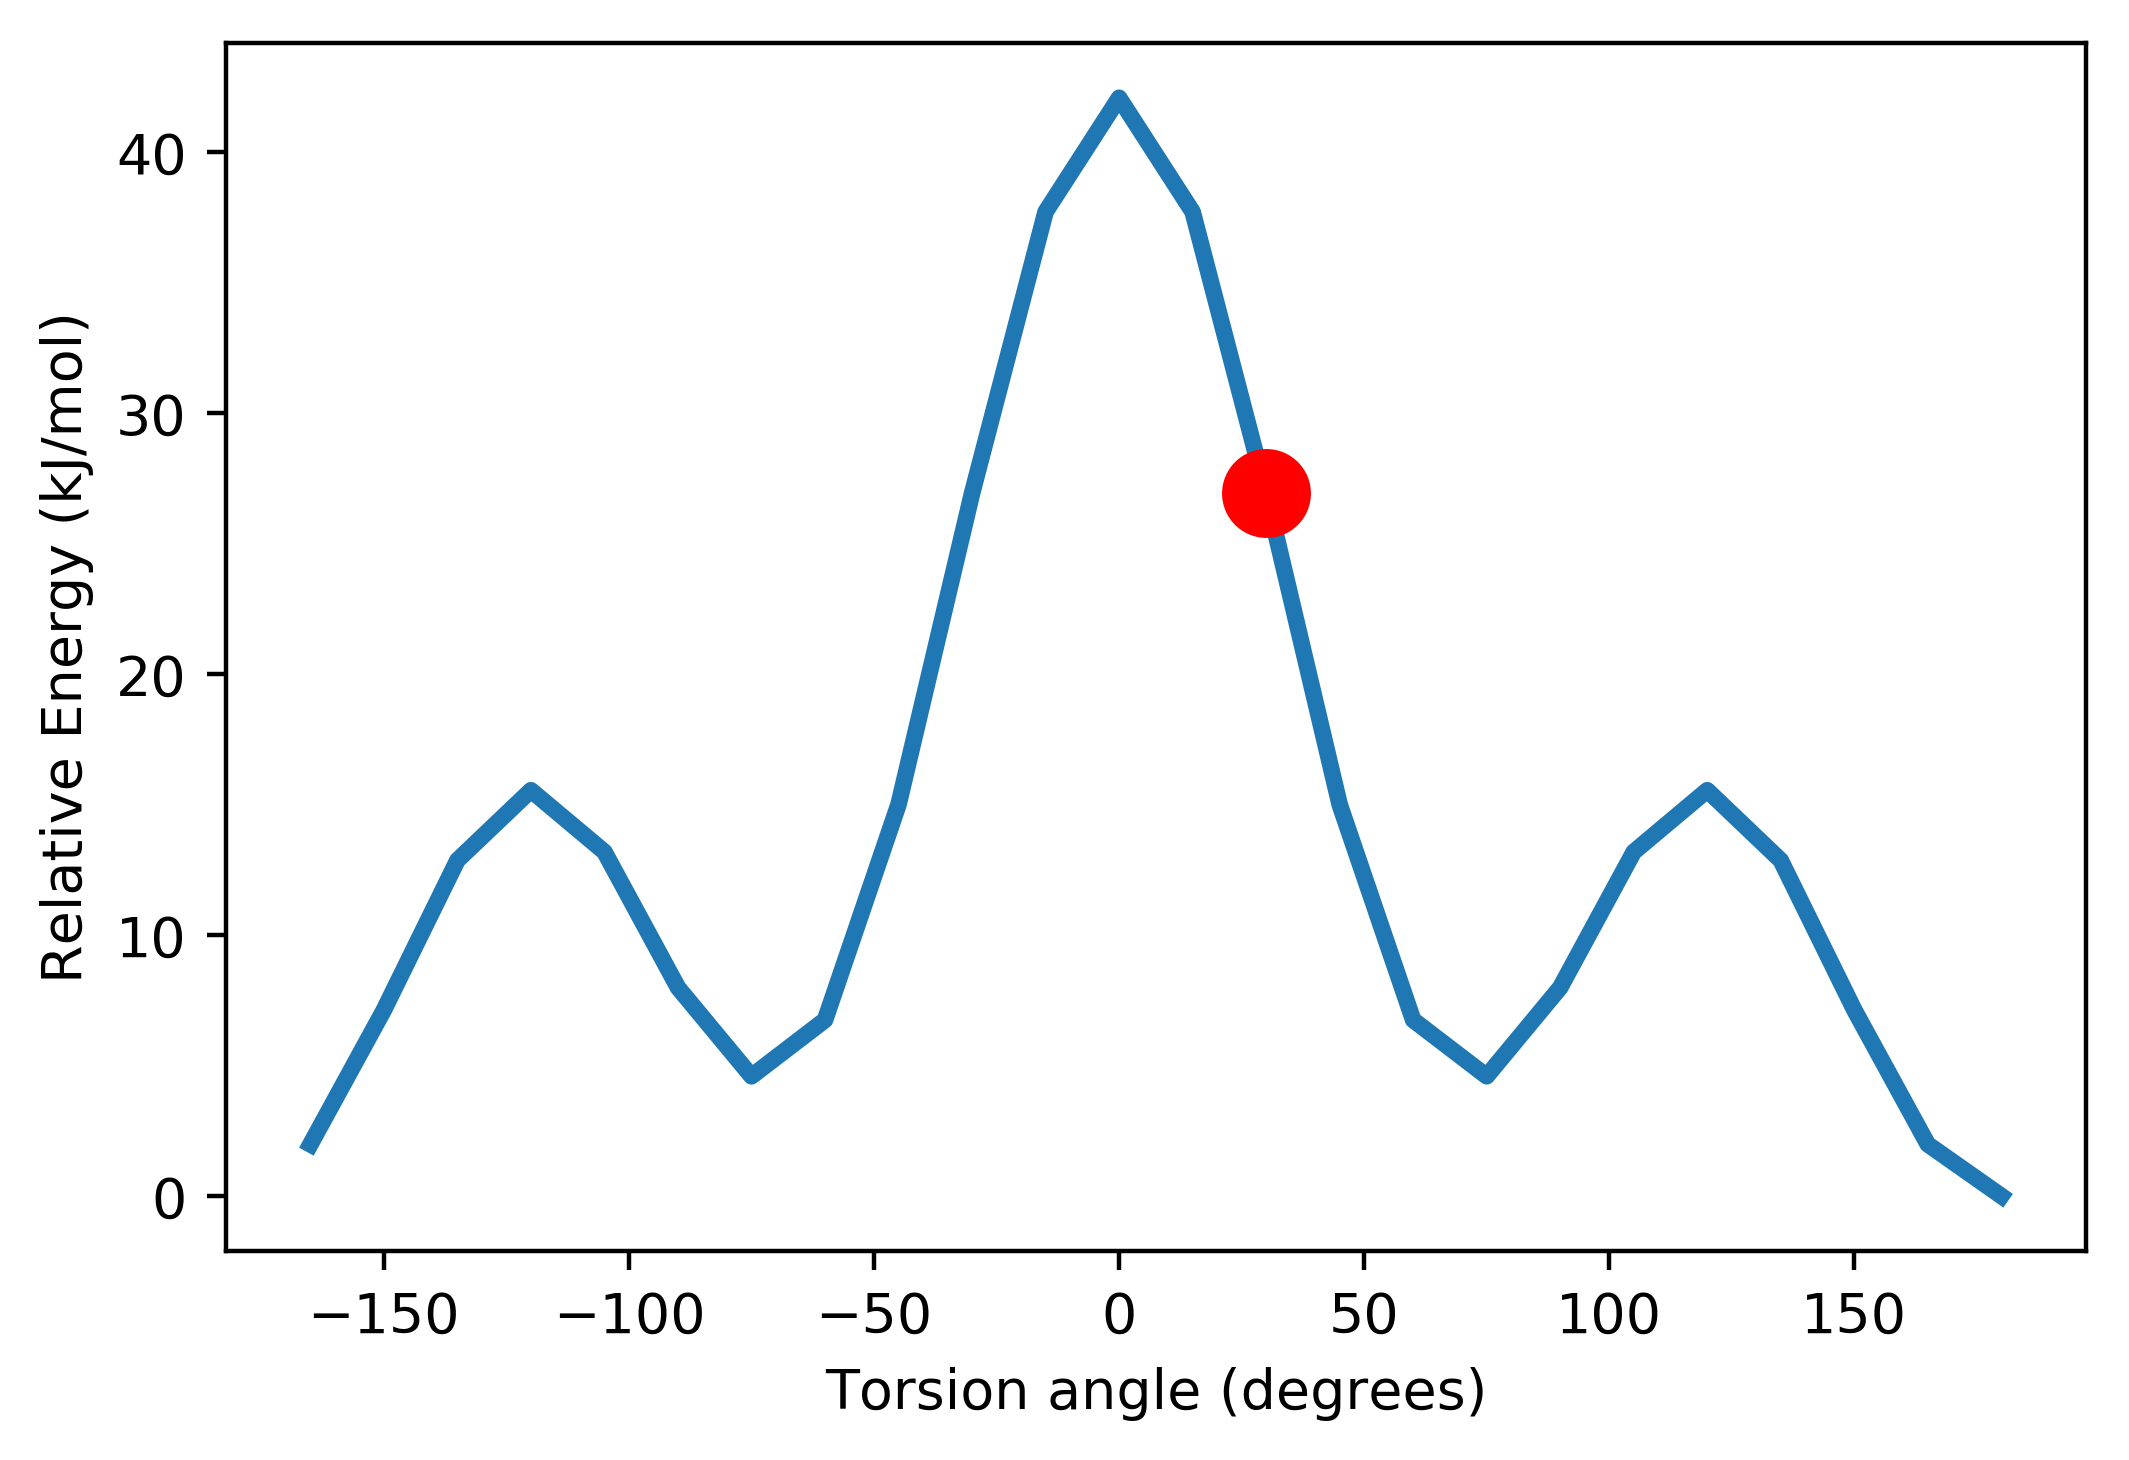

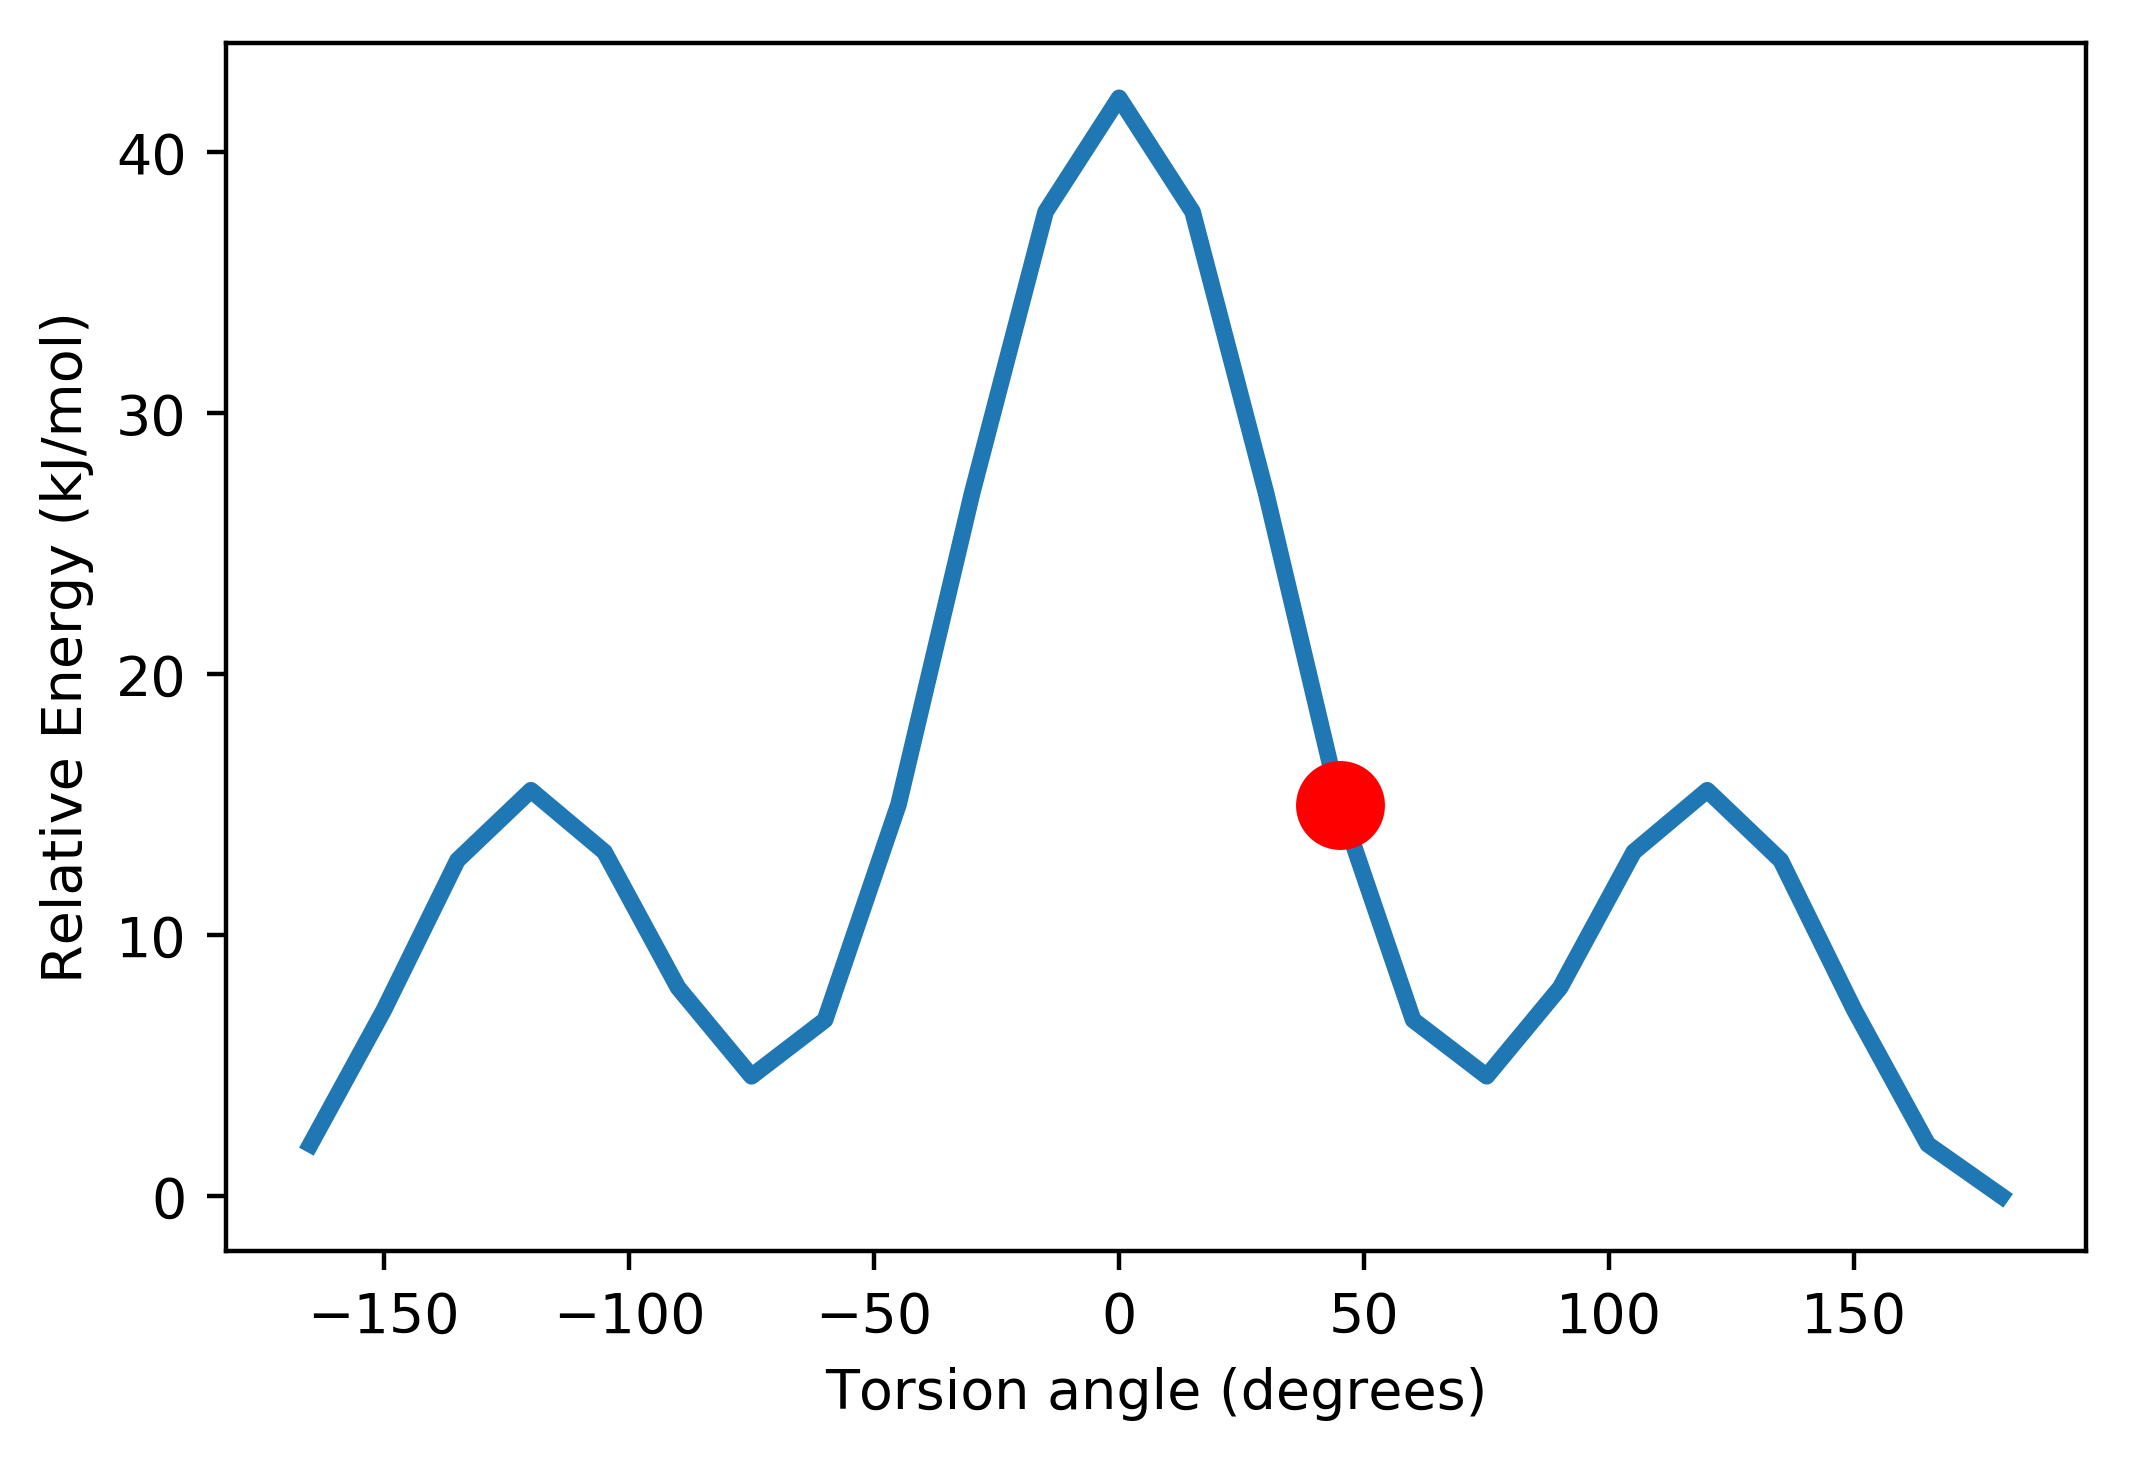

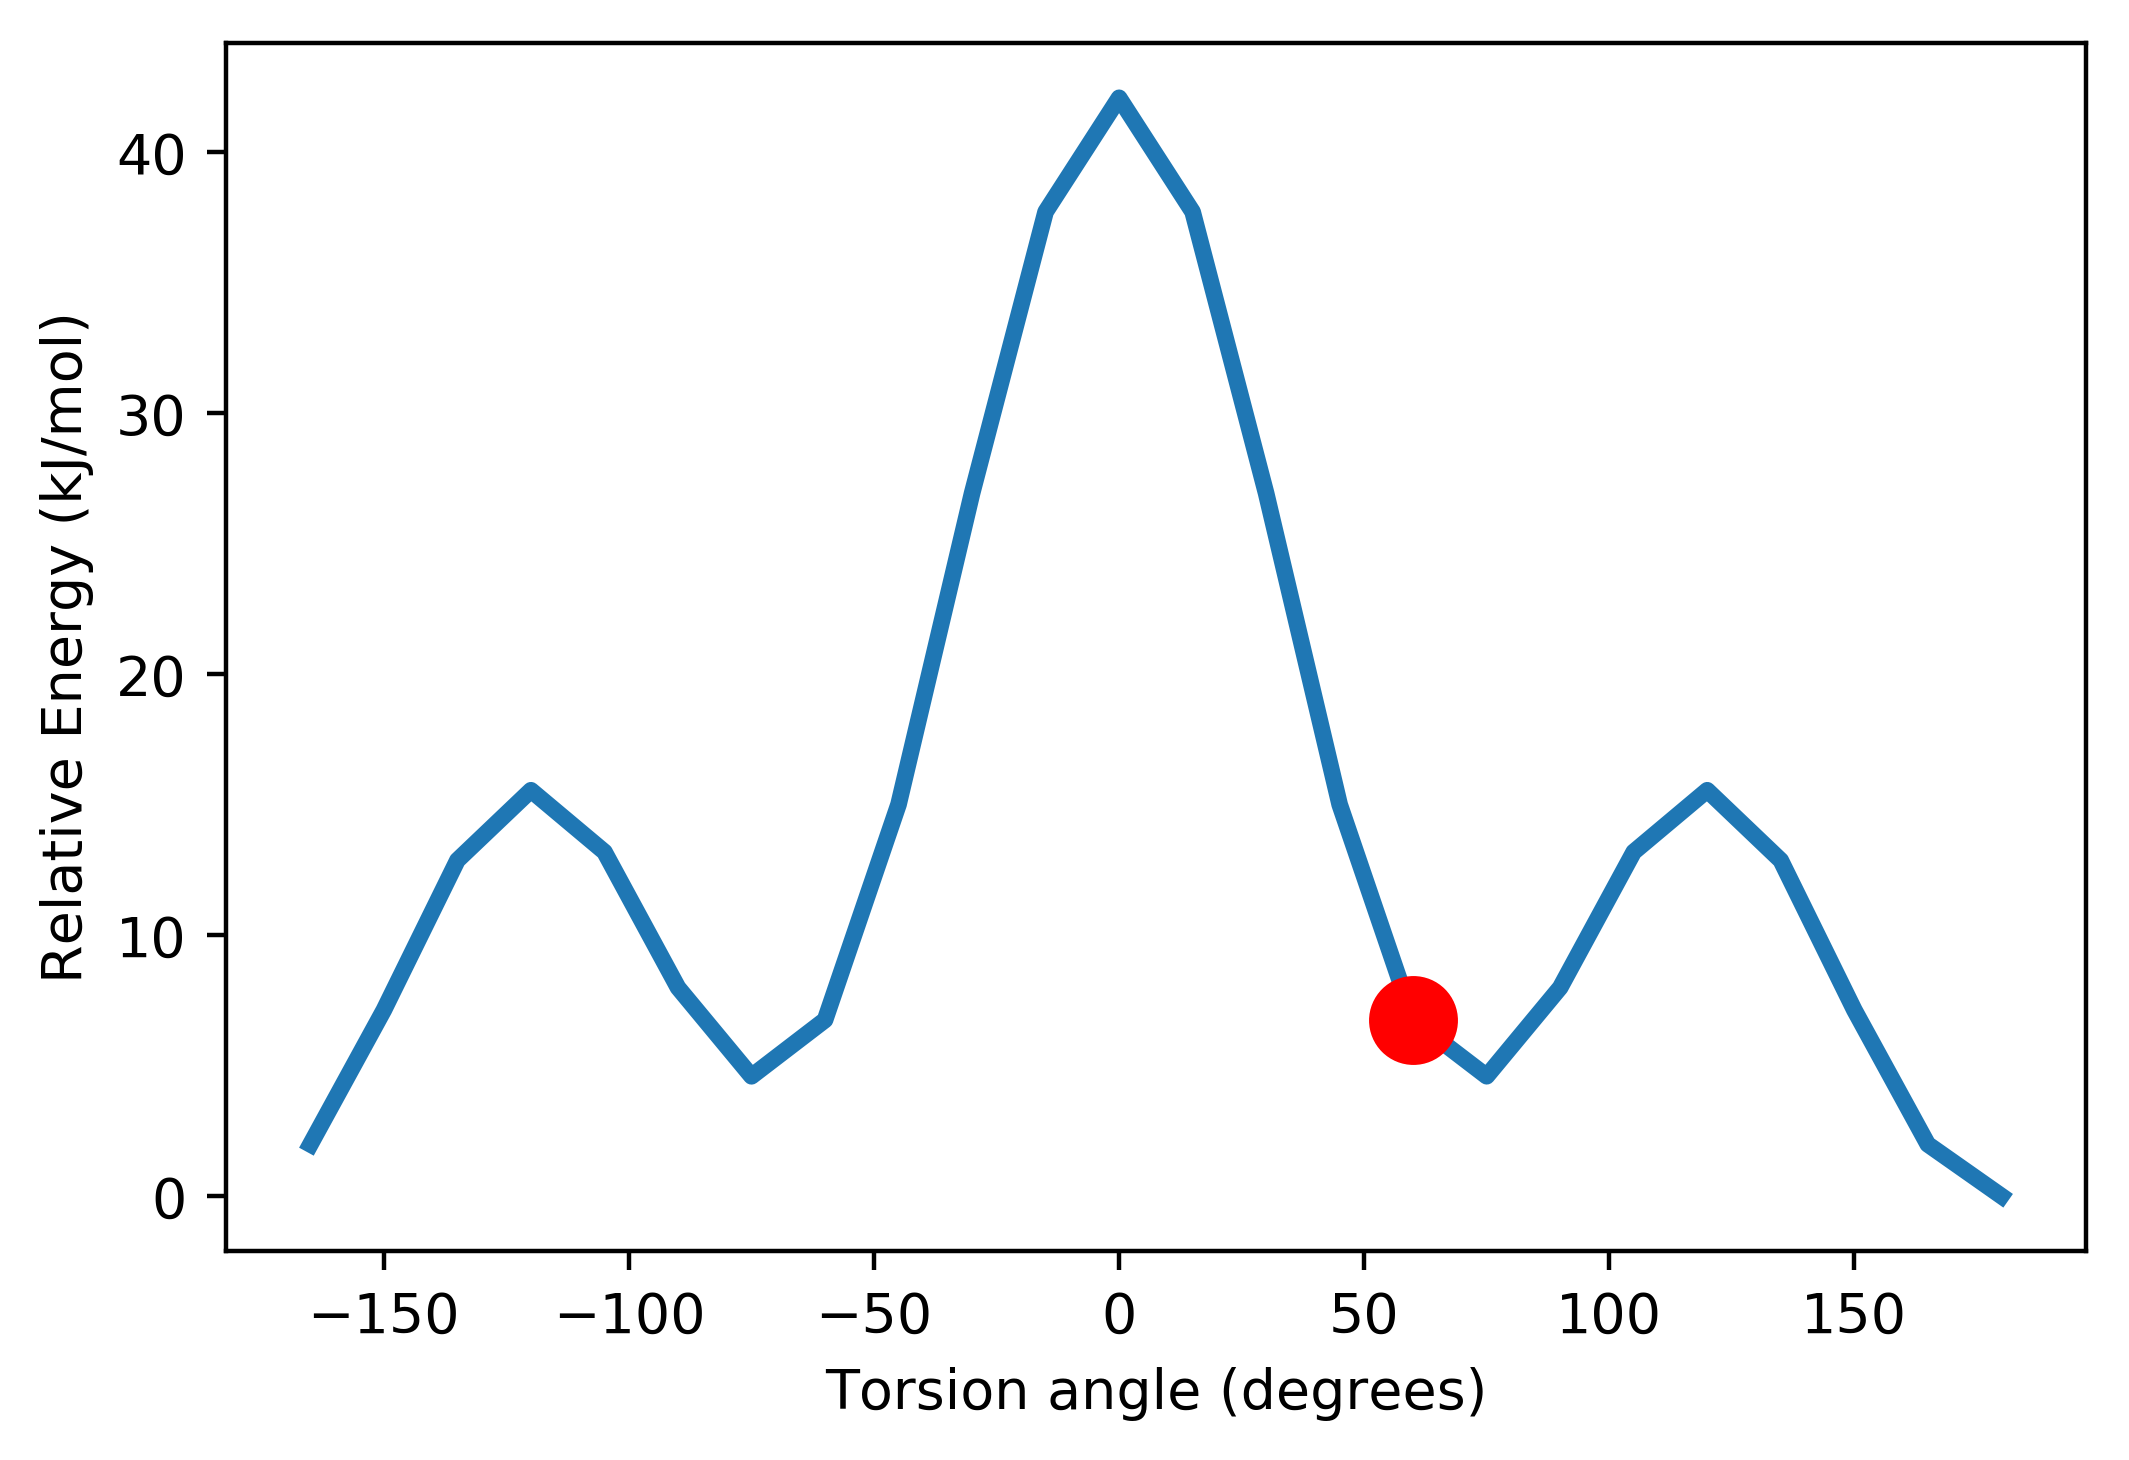

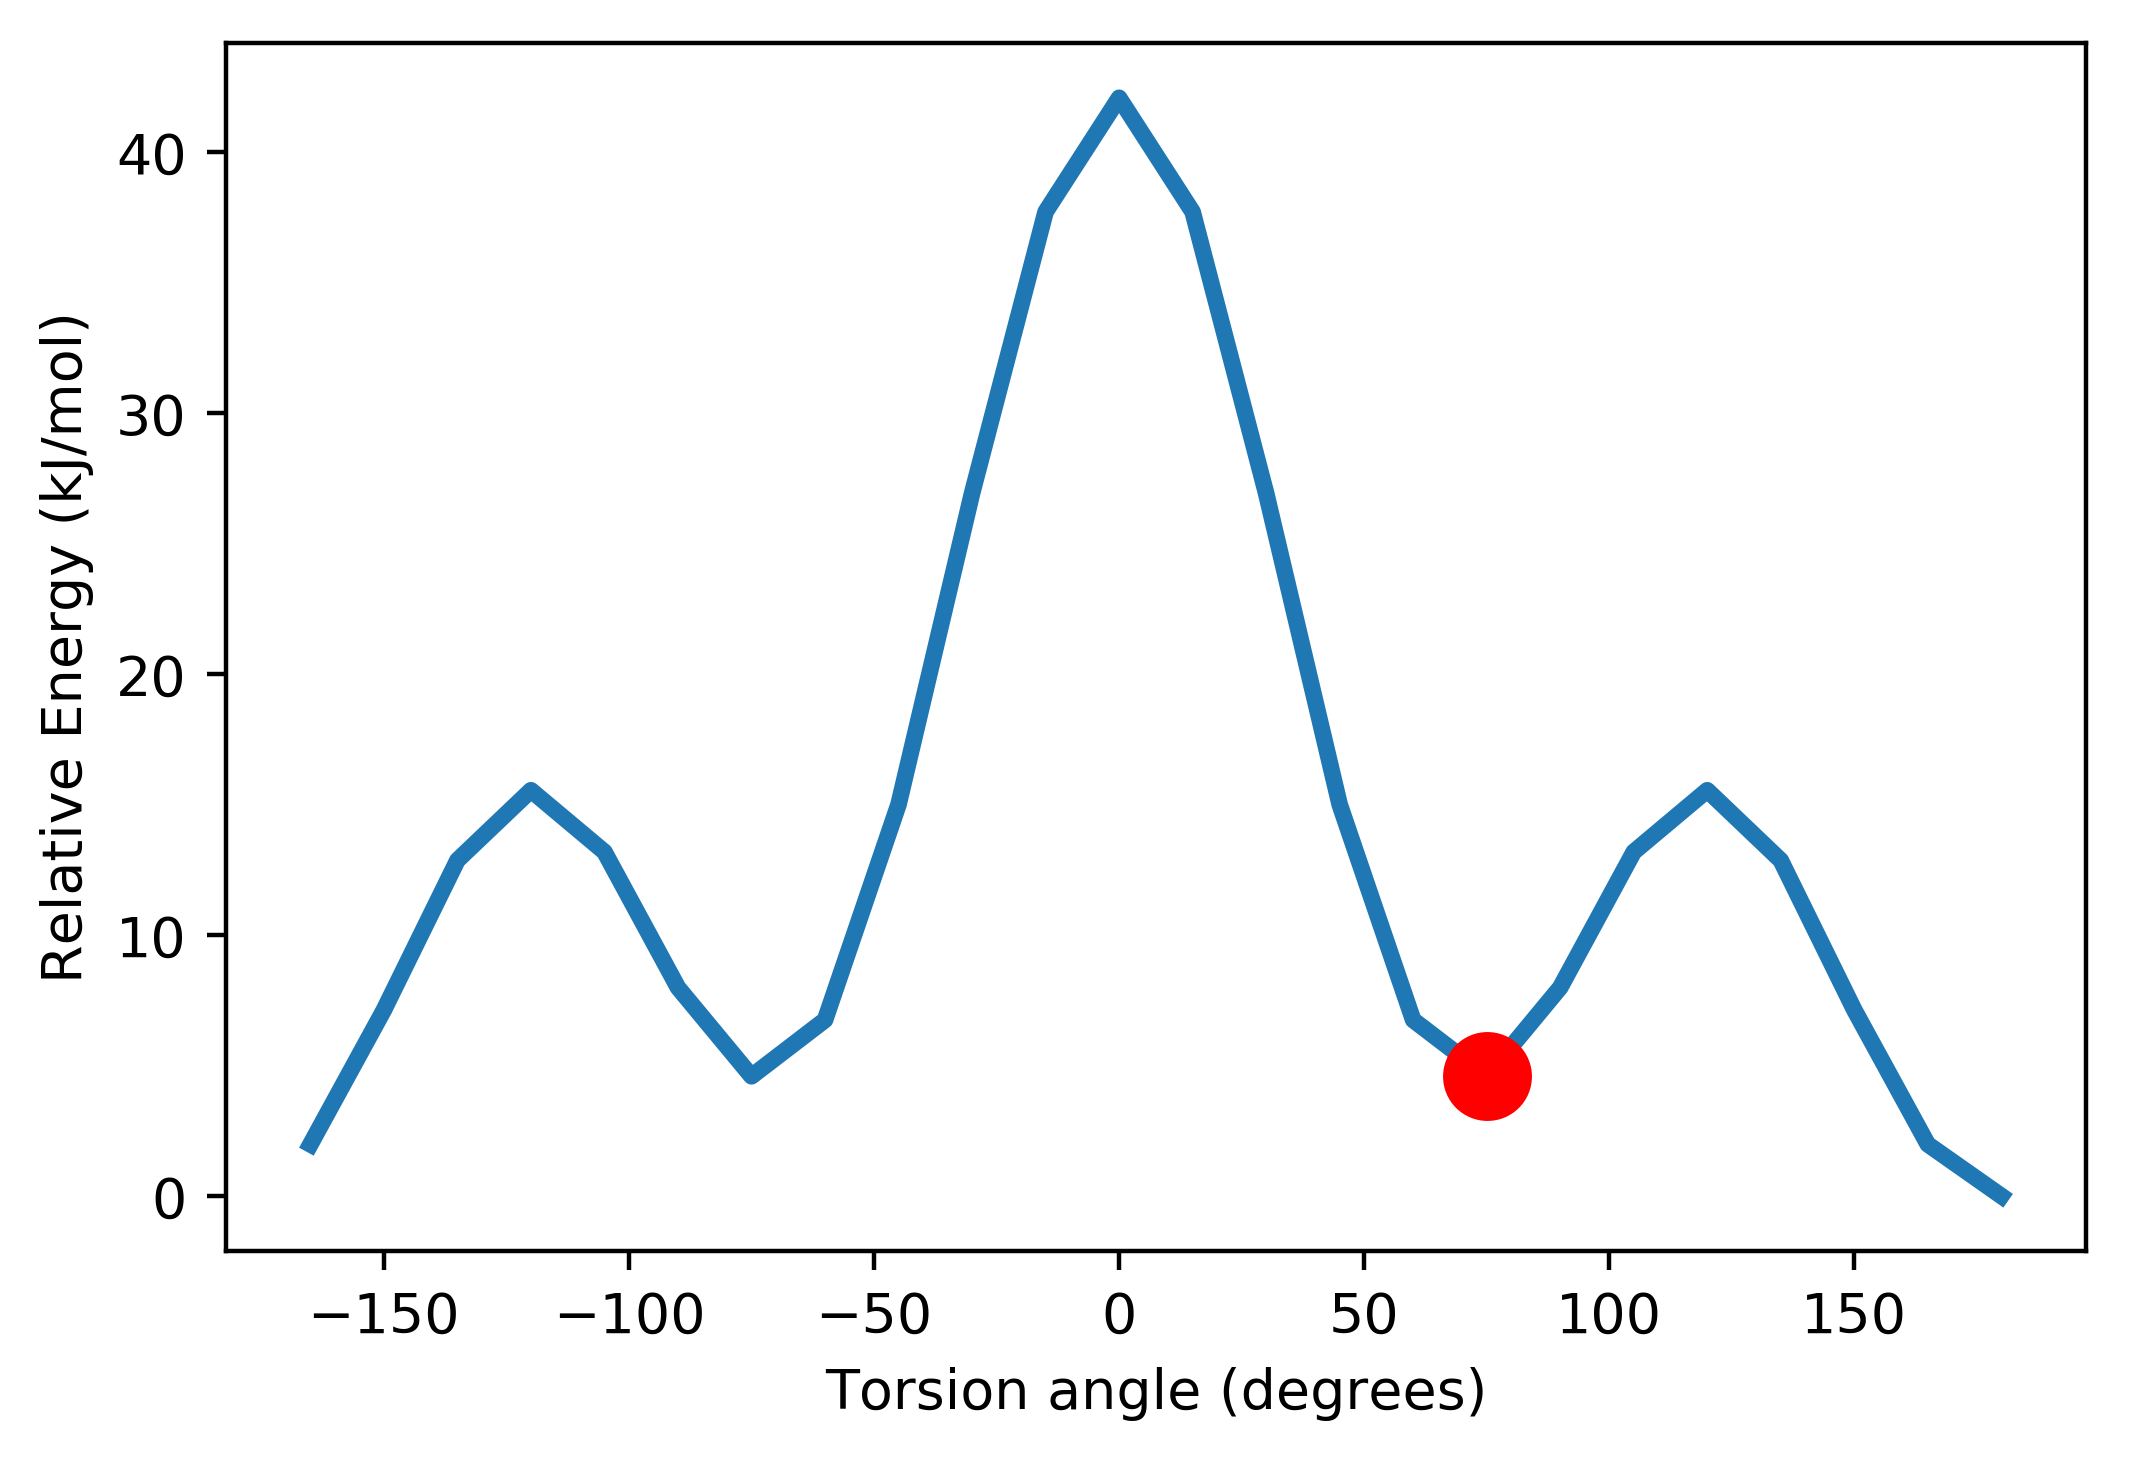

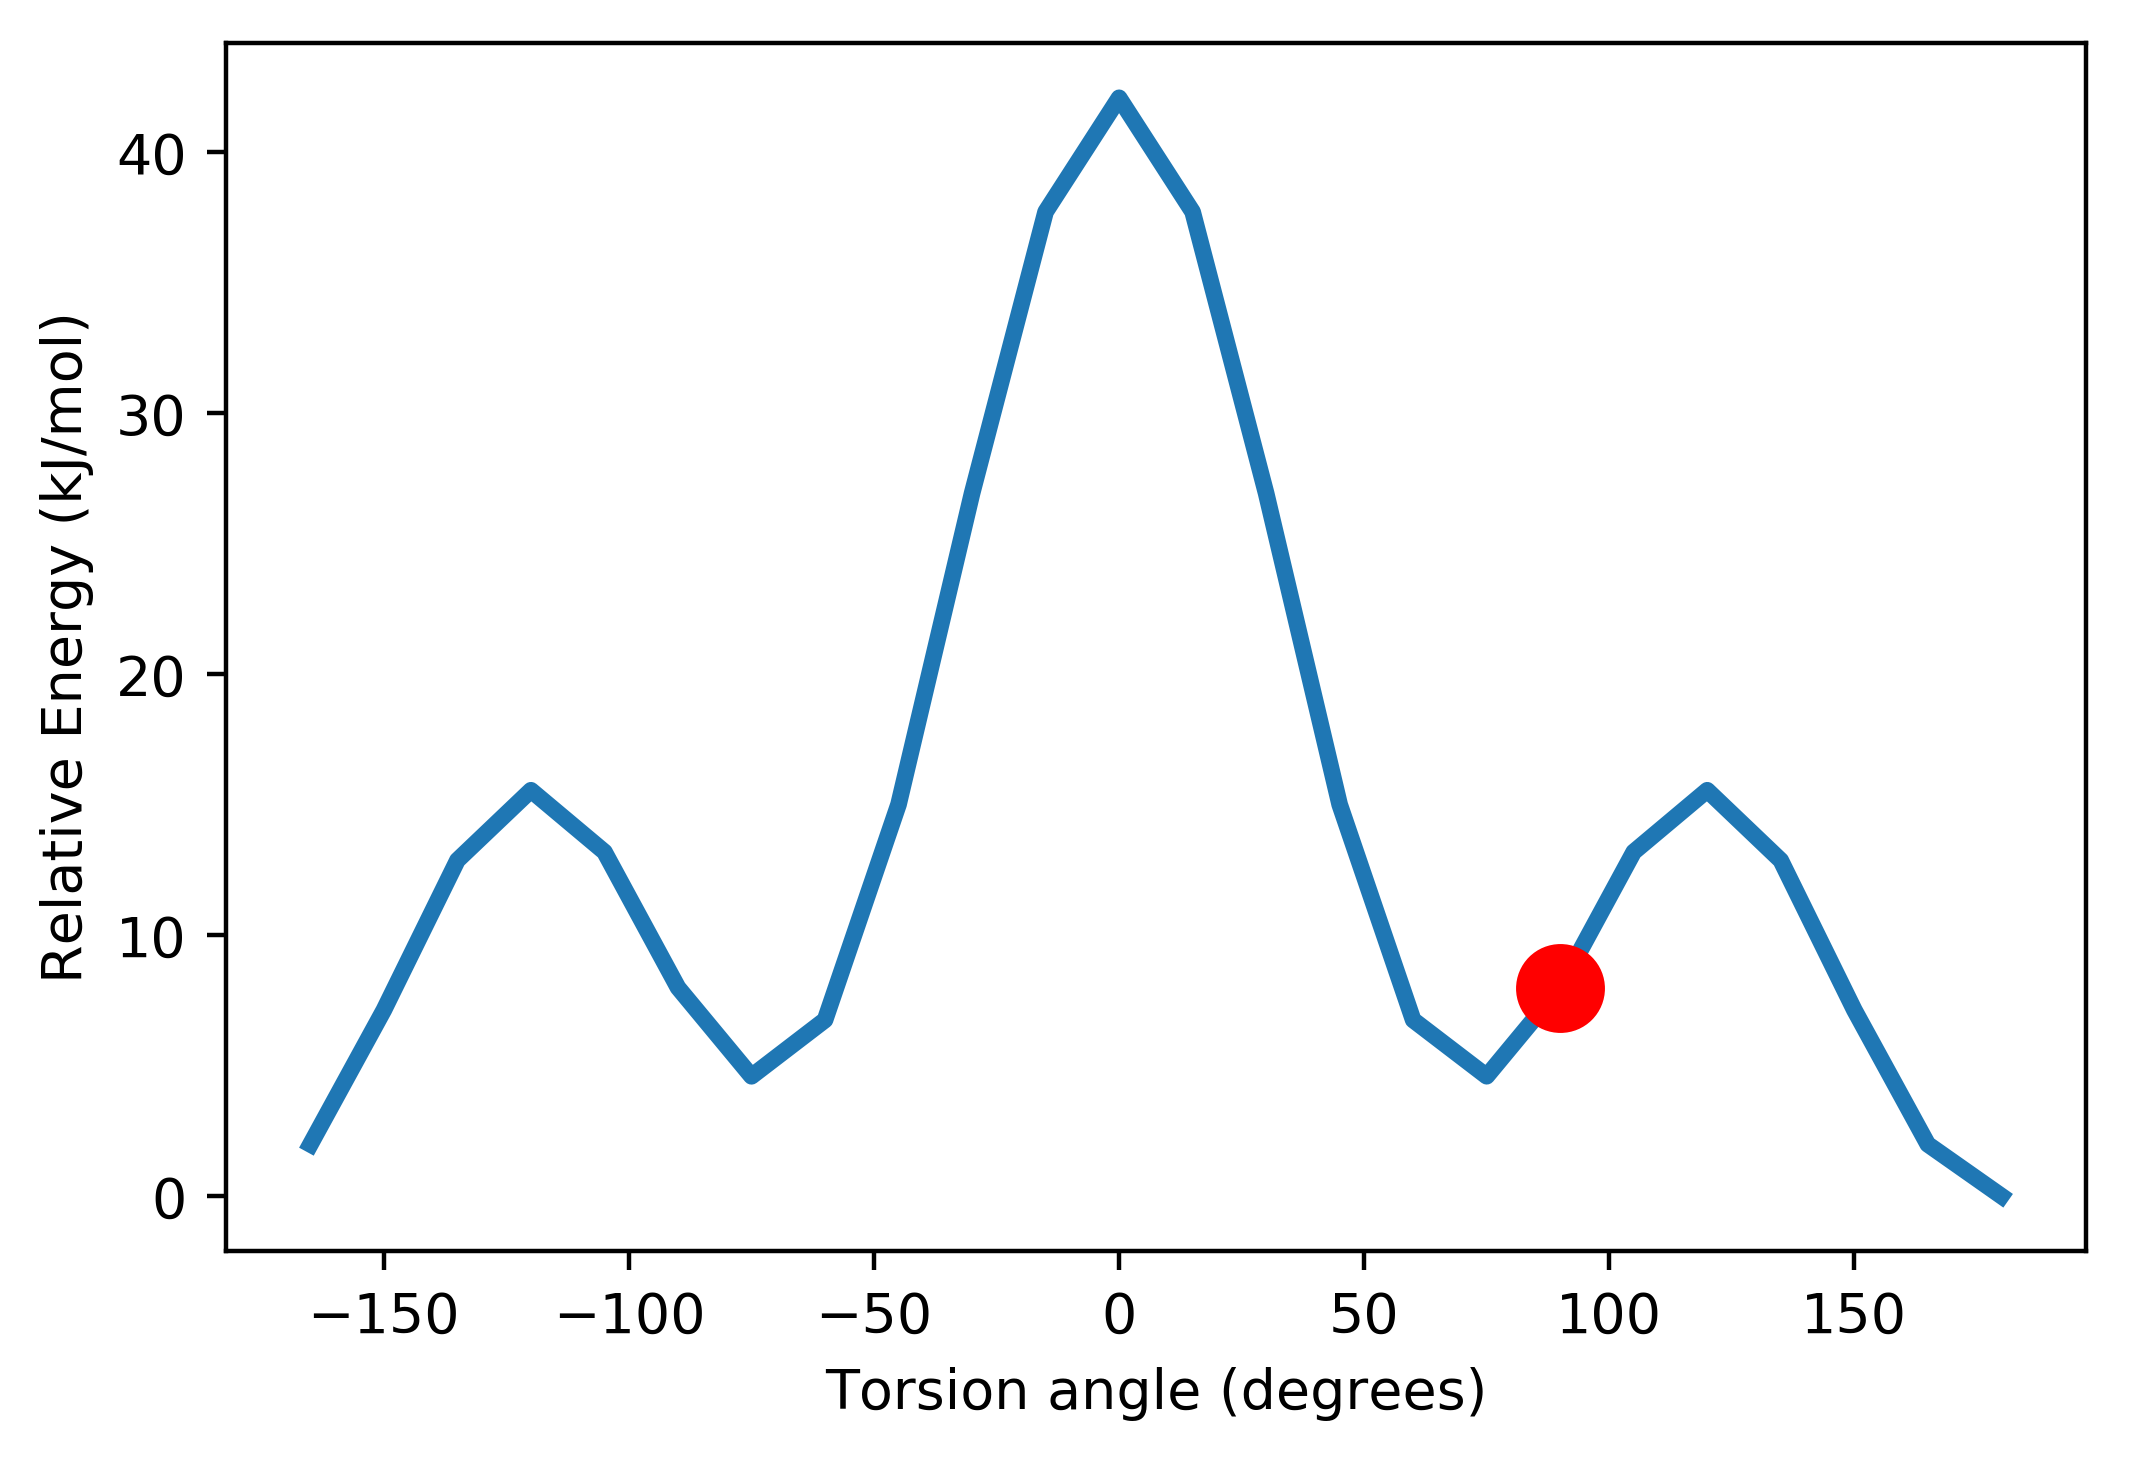

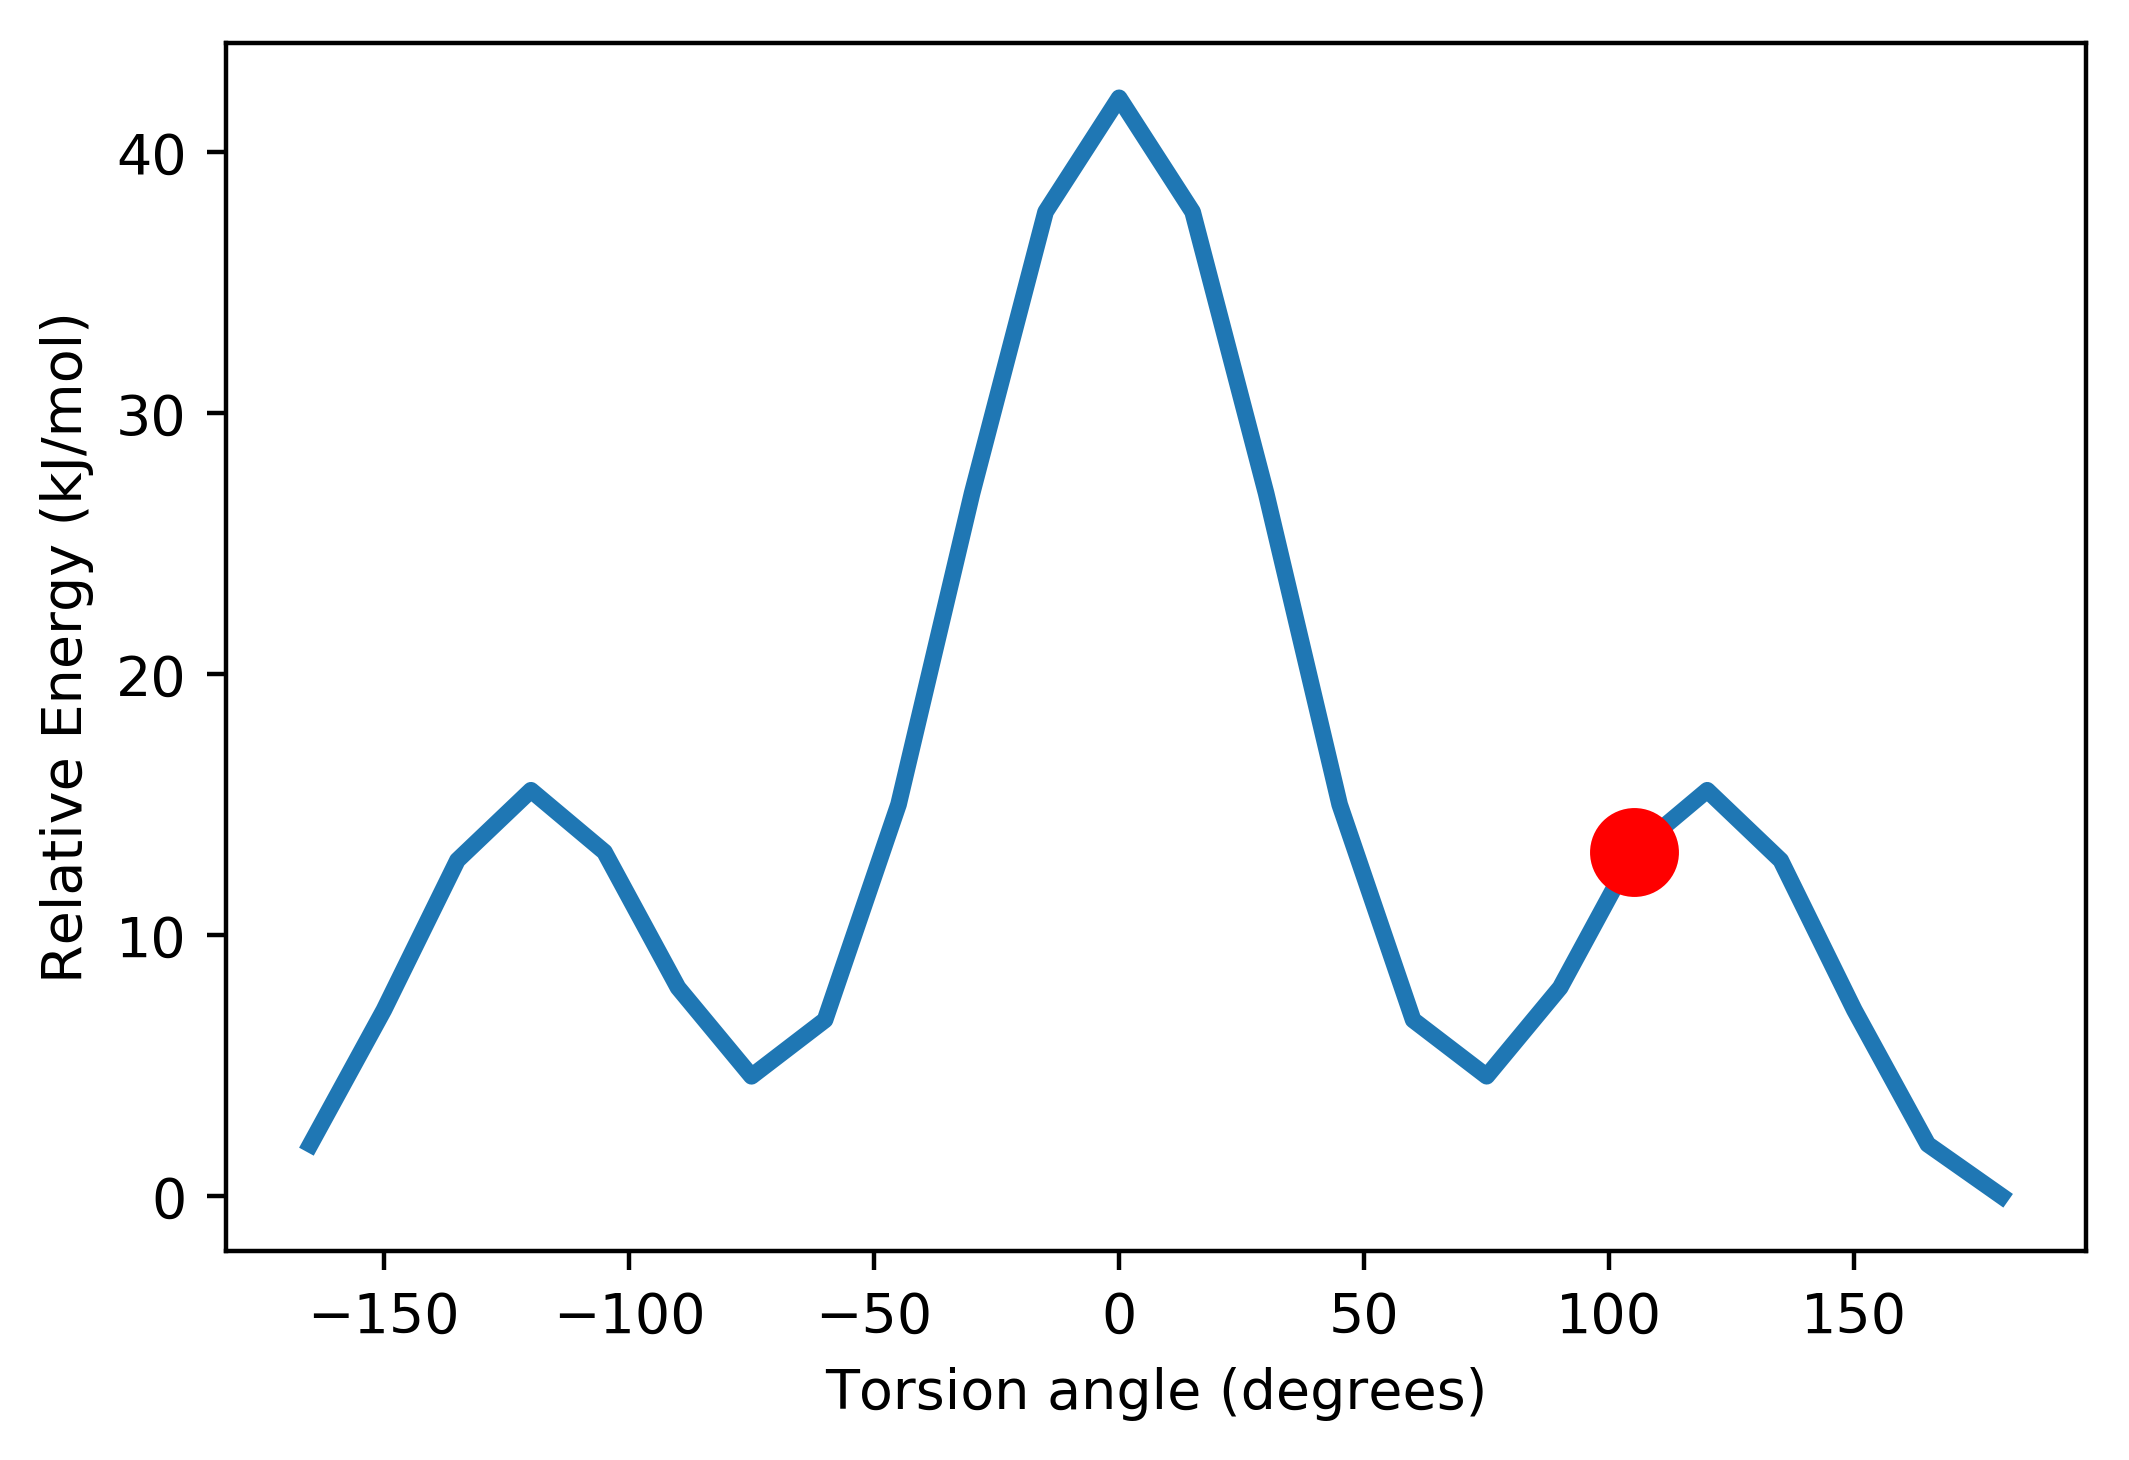

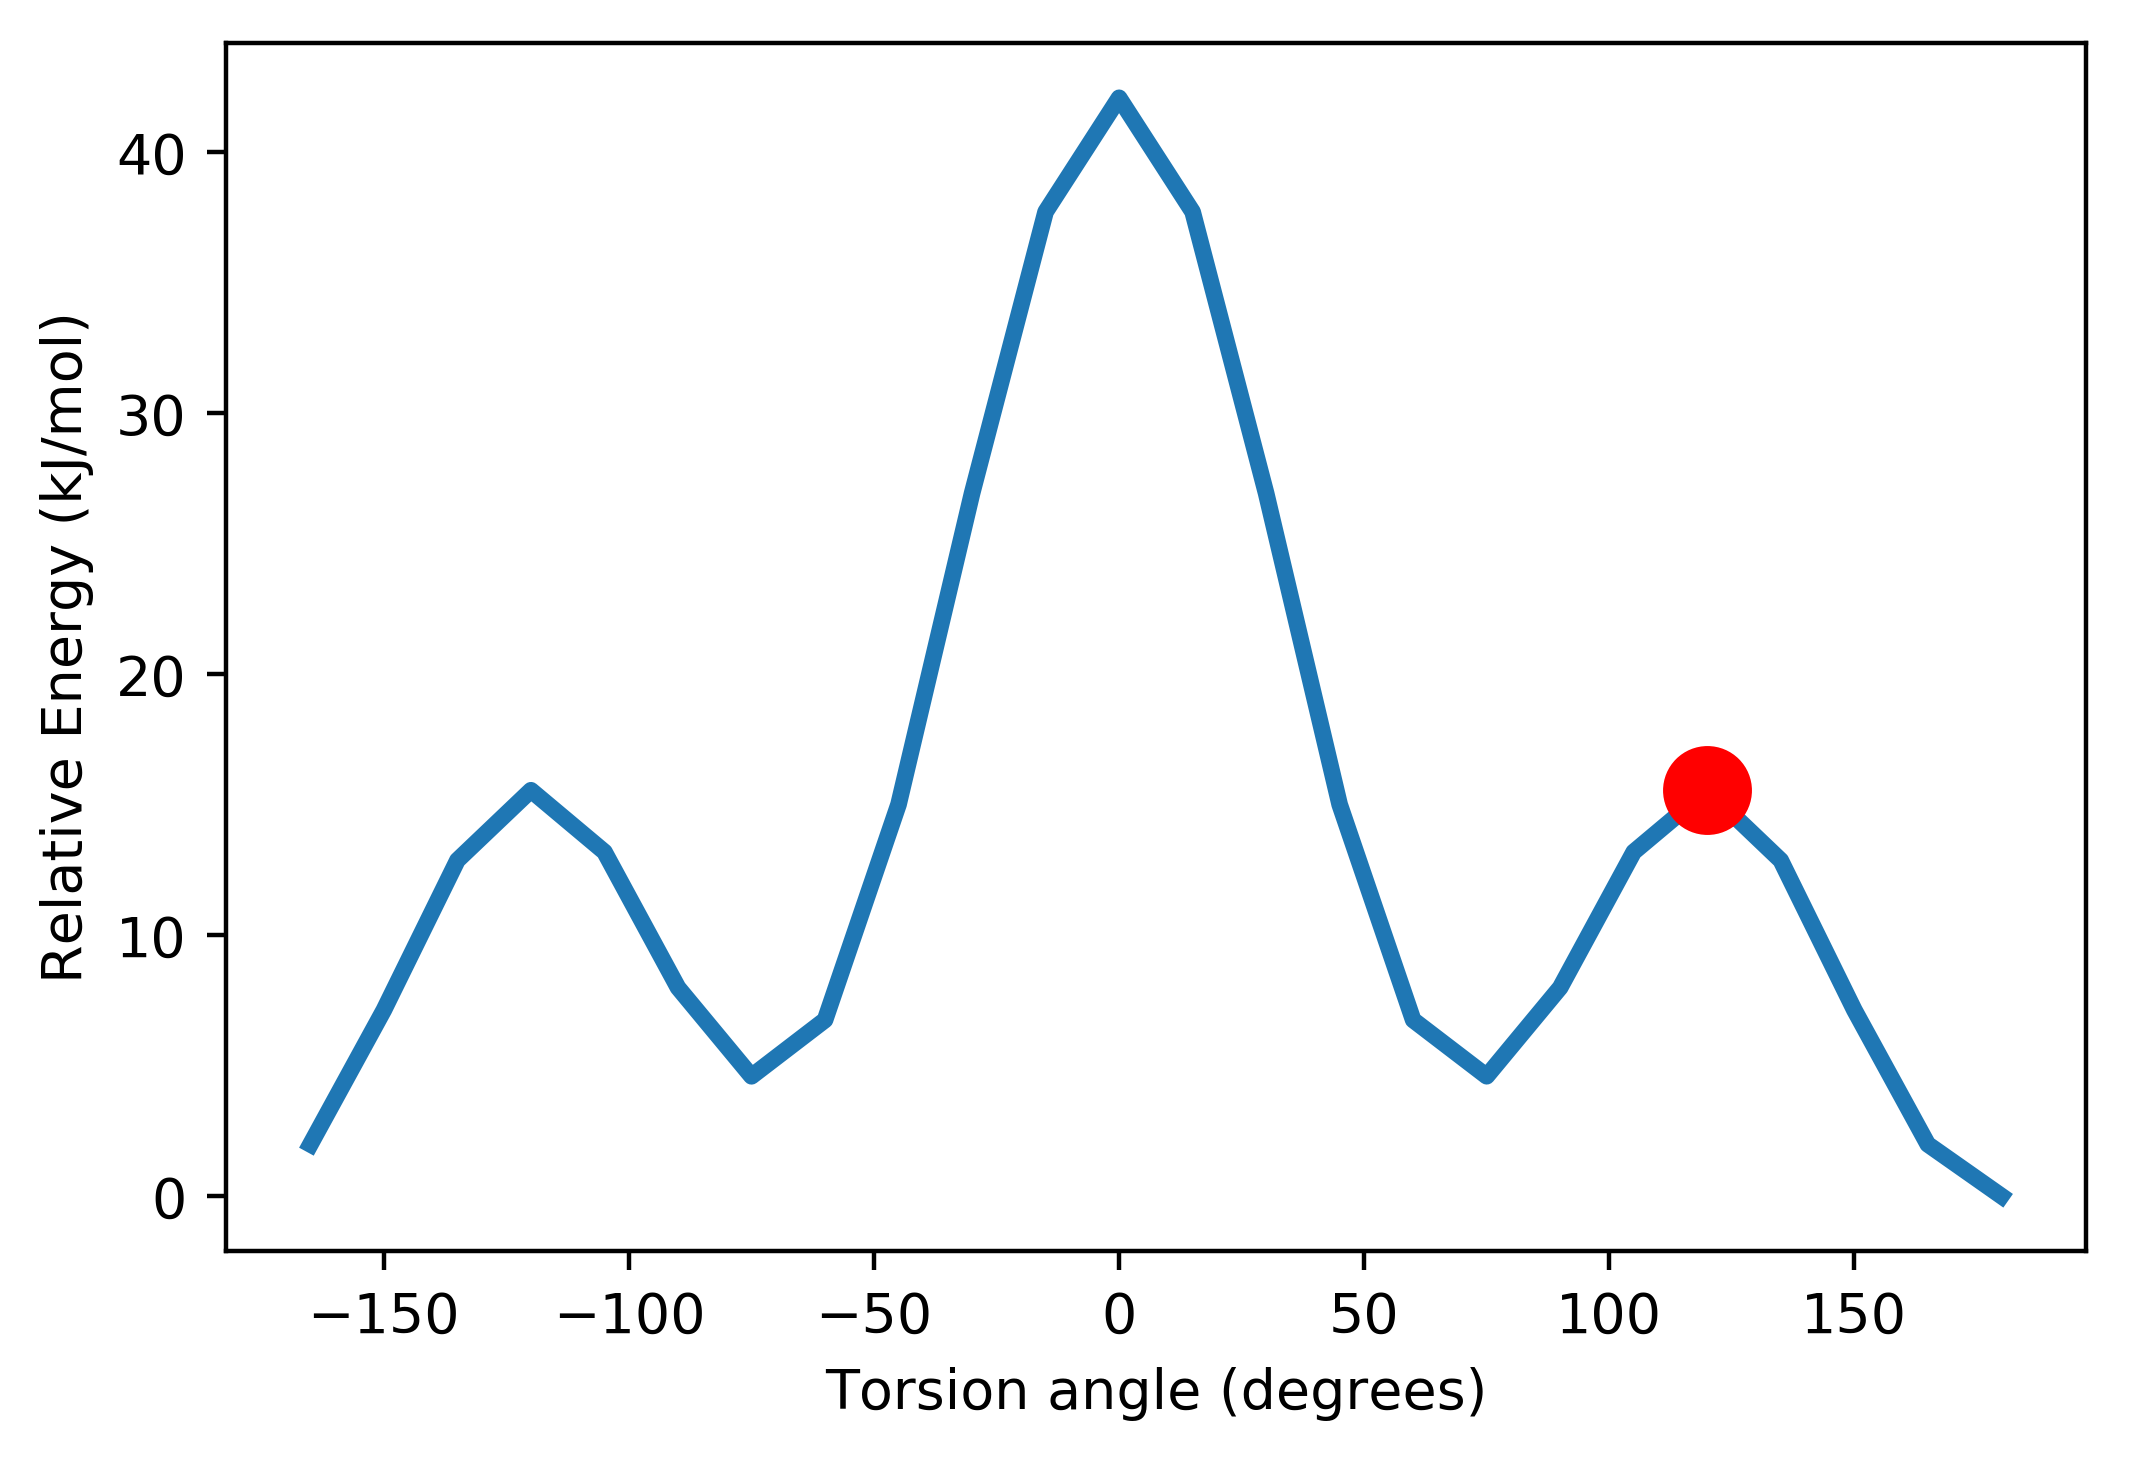

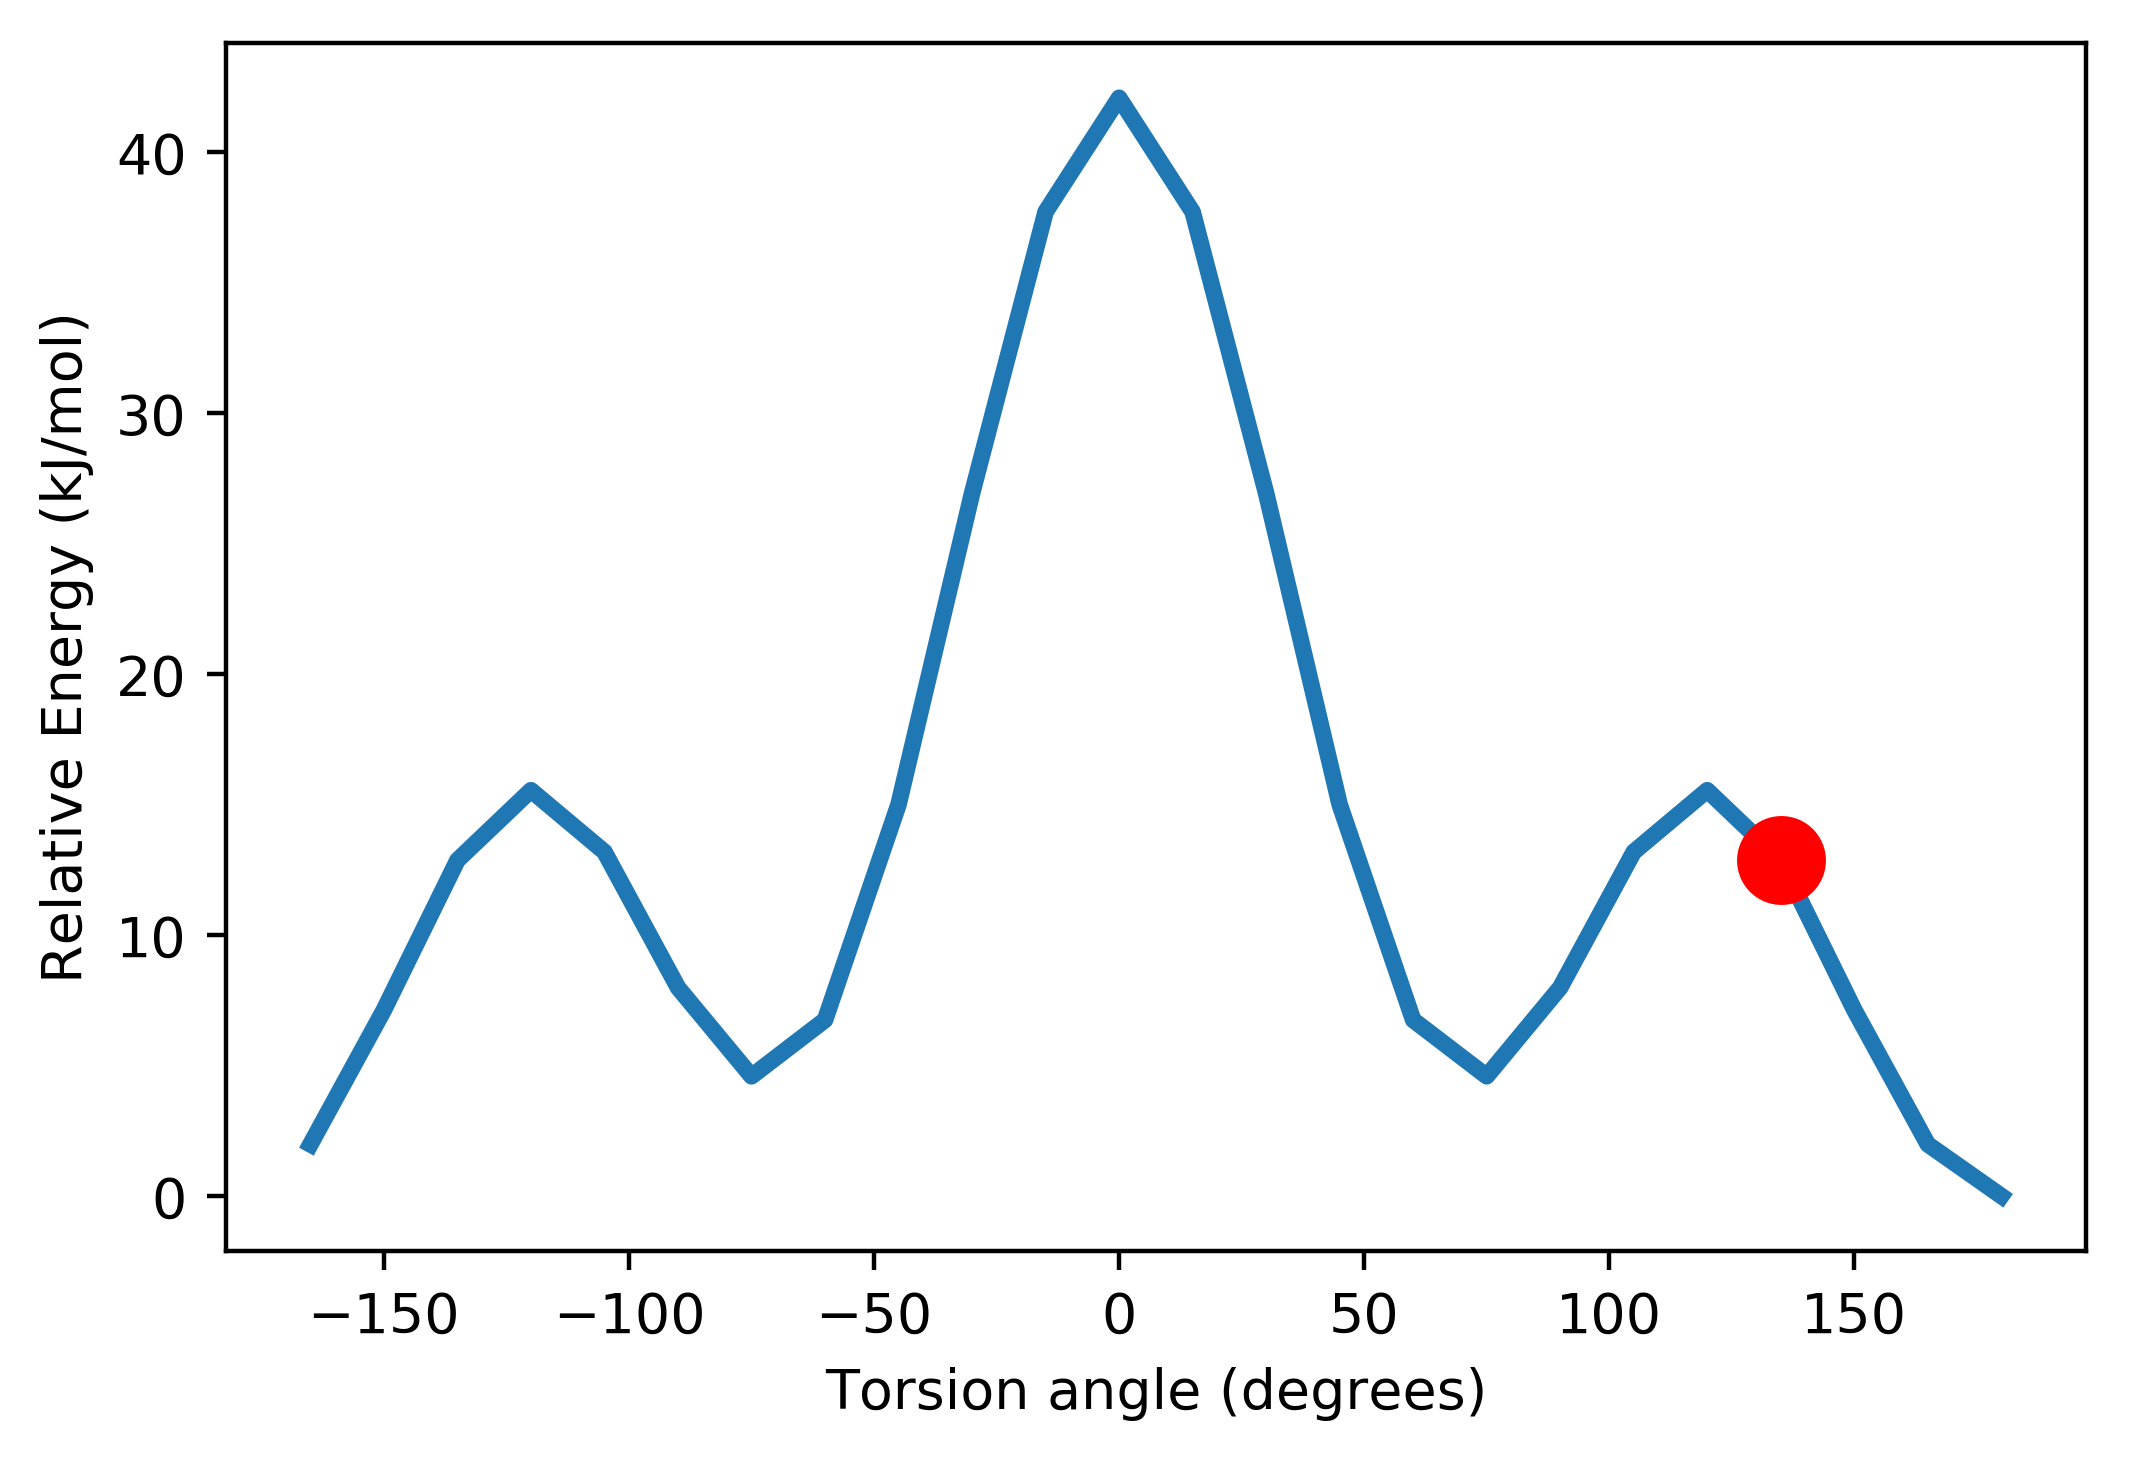

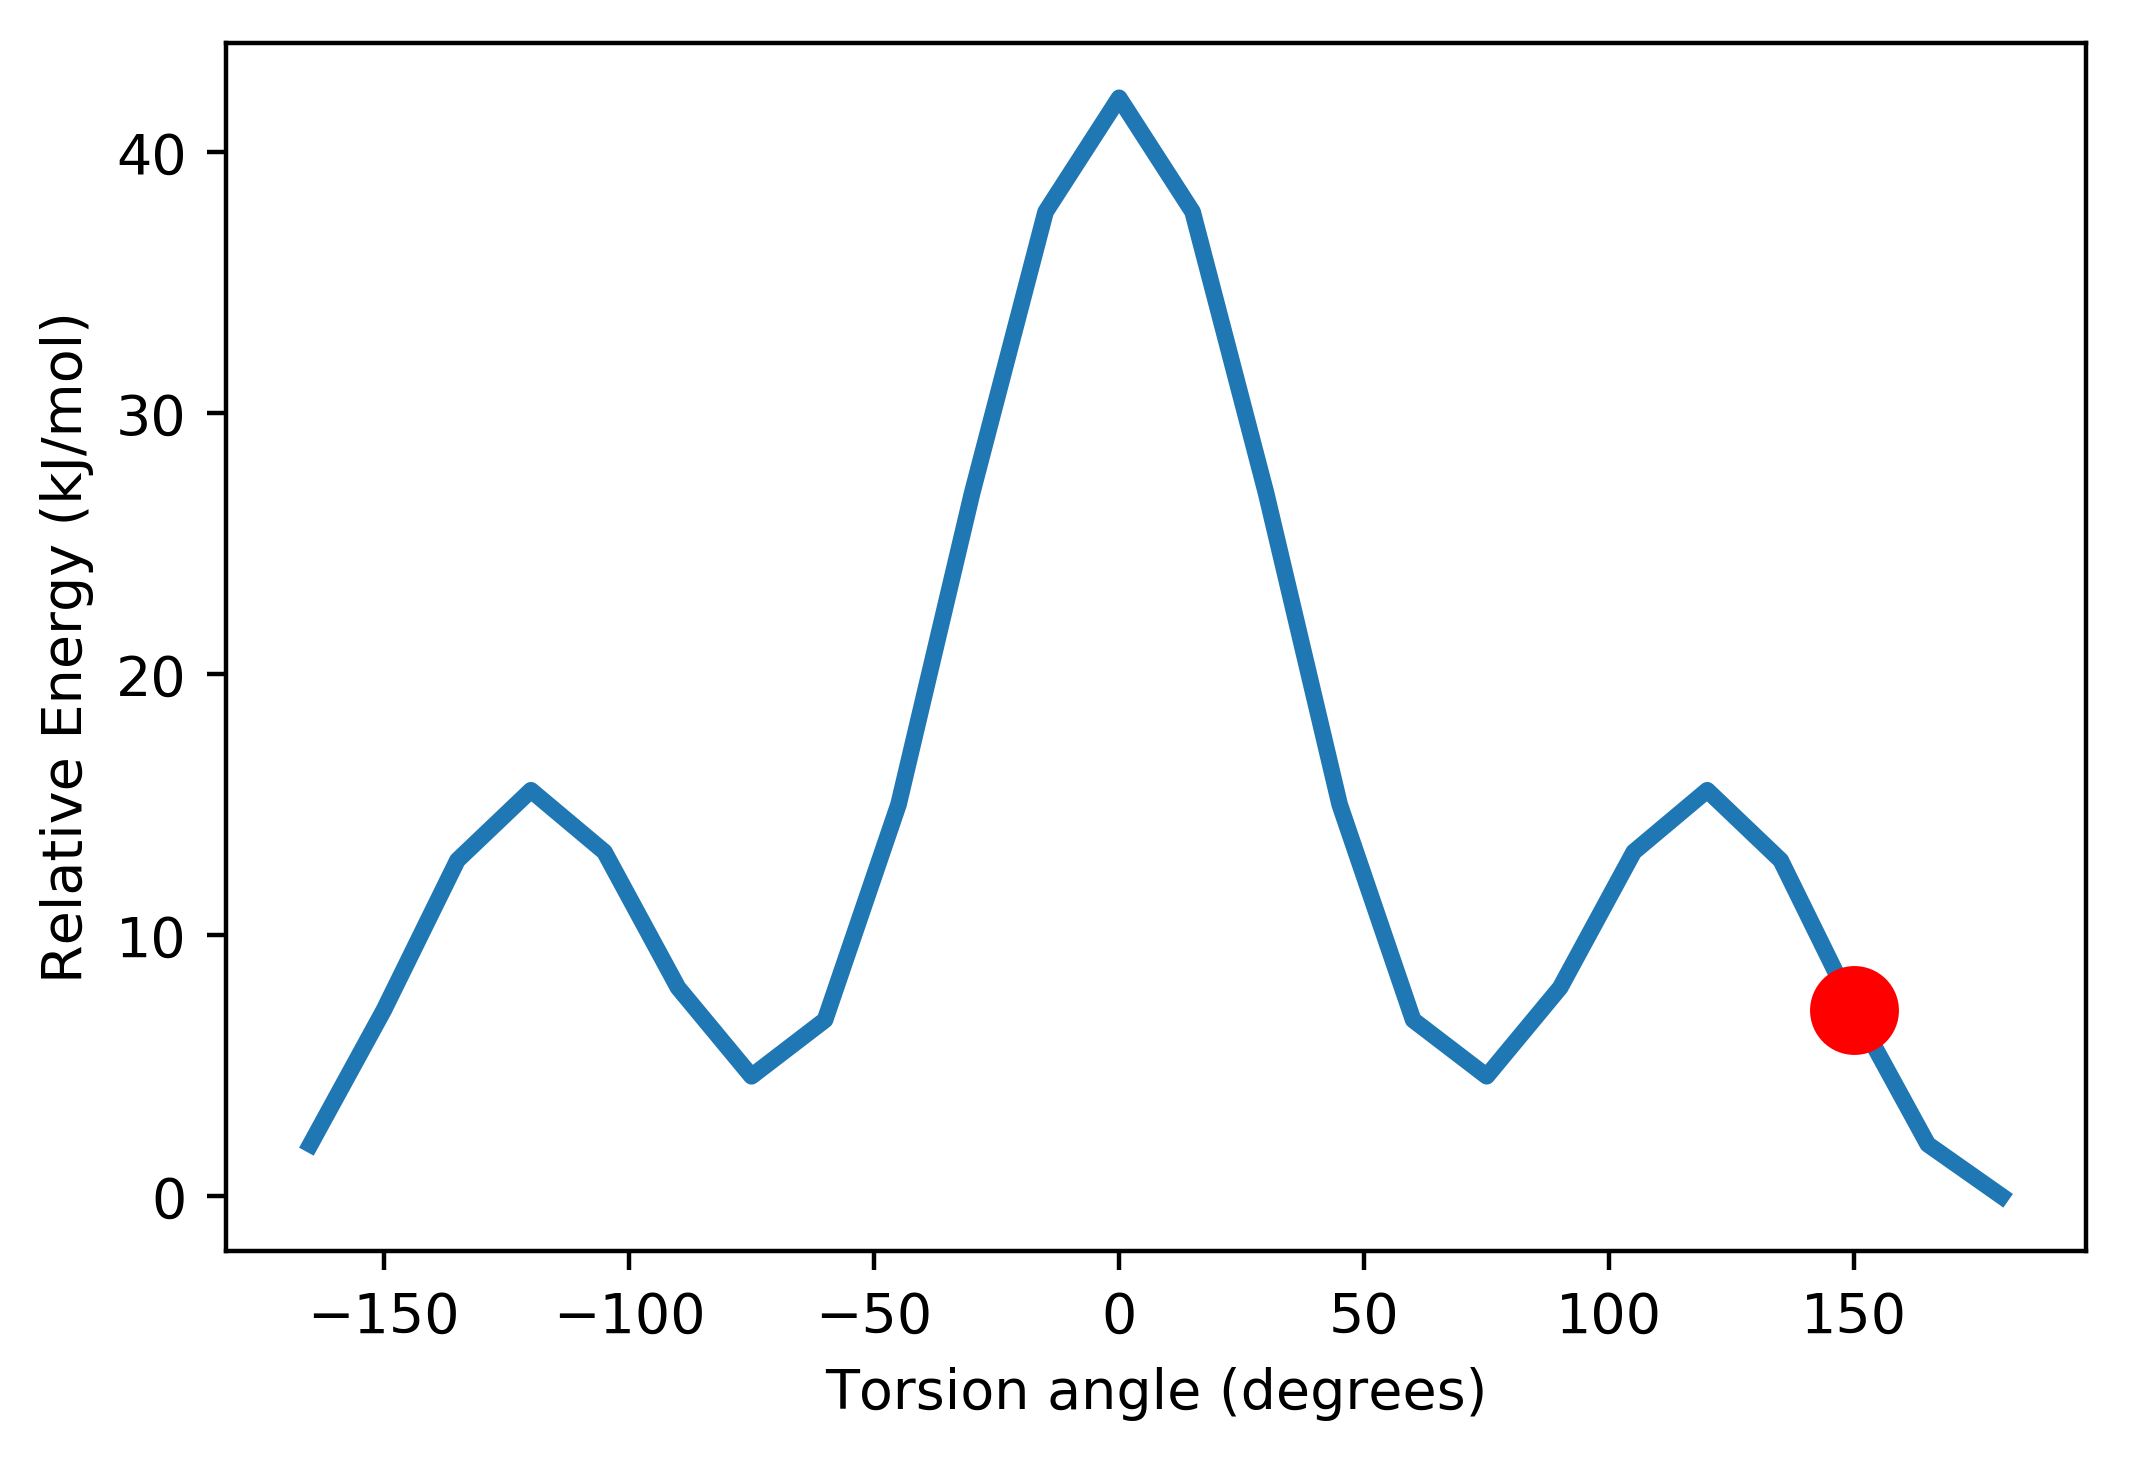

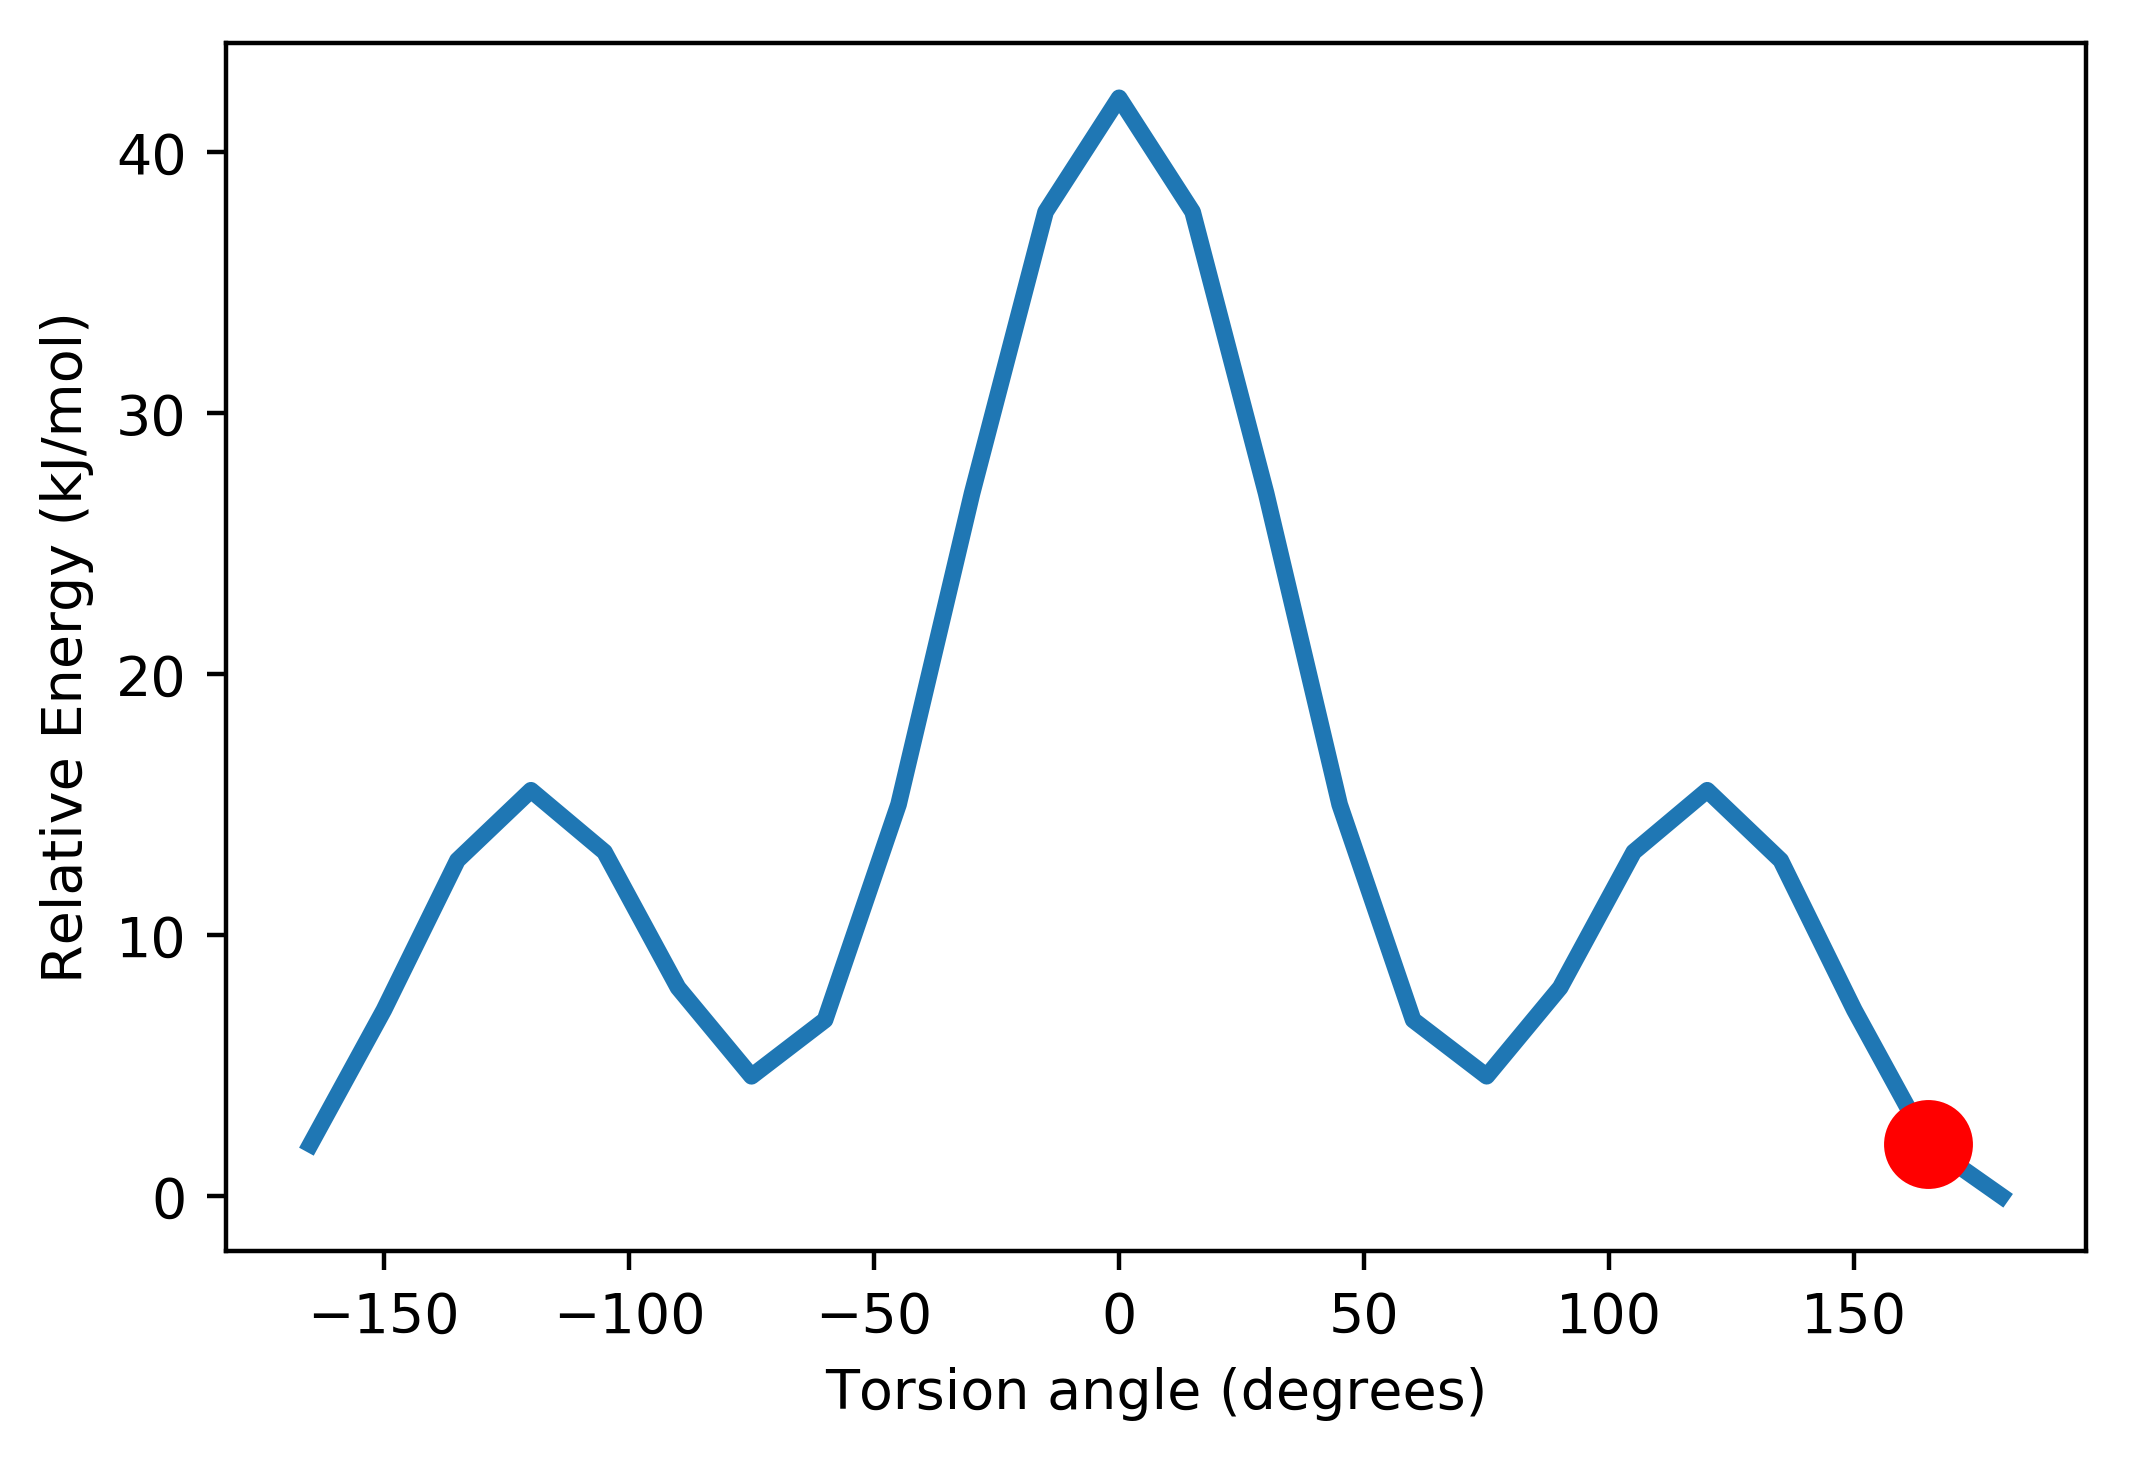

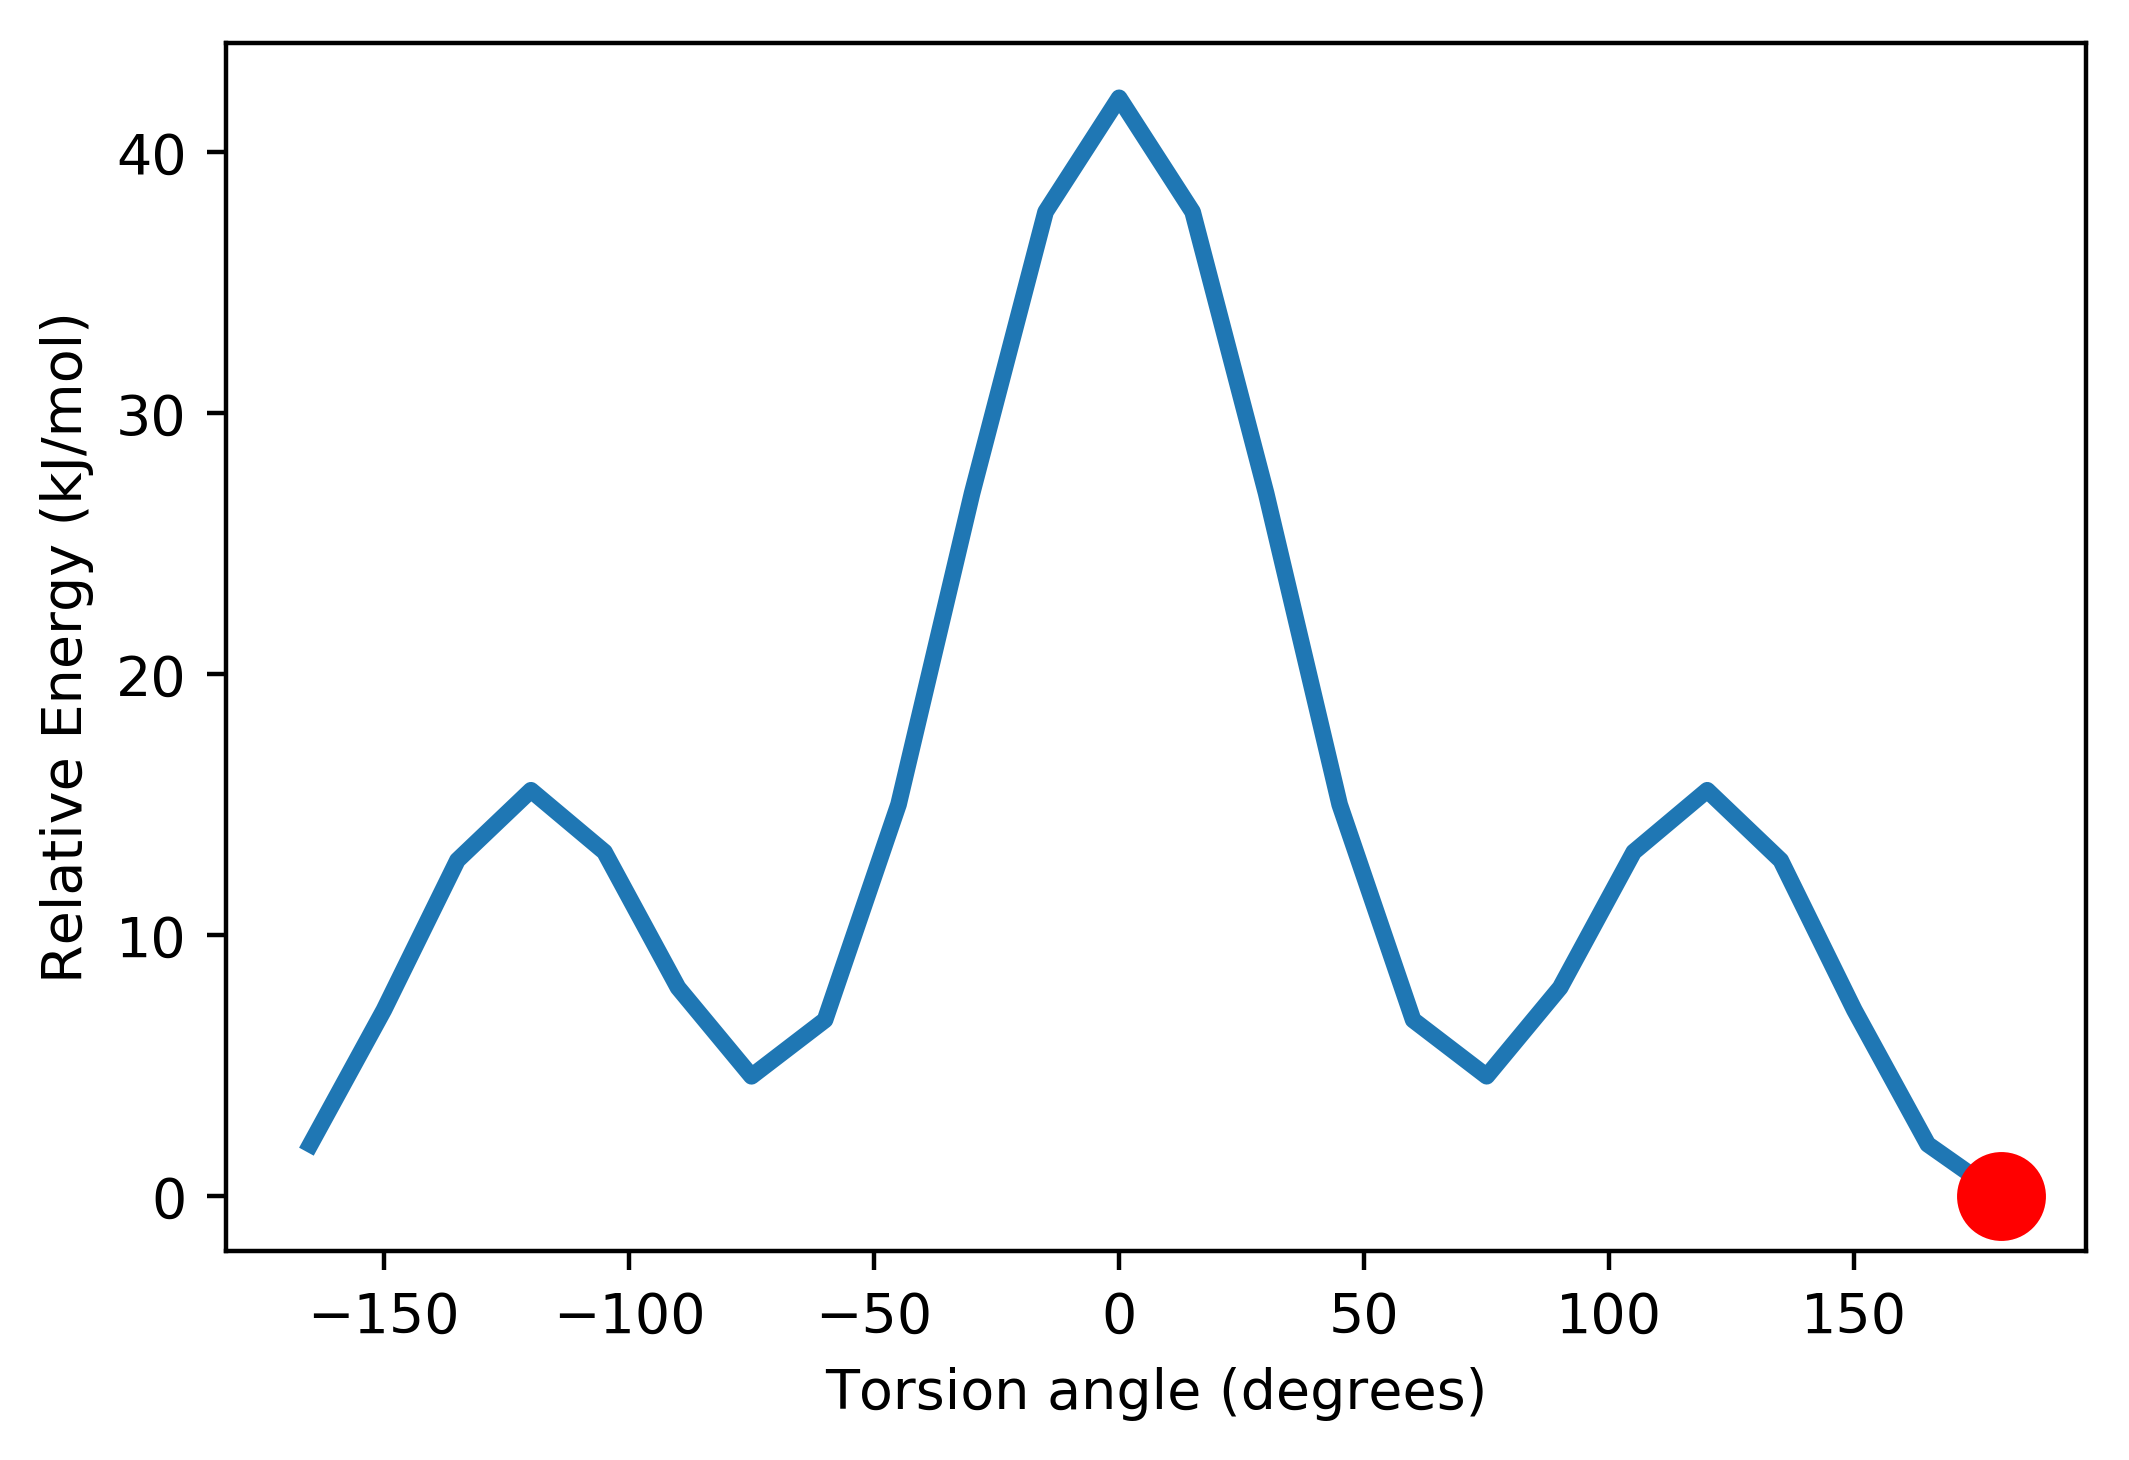

In [4]:
for frag in final_energies:
    for job in final_energies[frag]:
        for i in range(len(final_energies[frag][job][0])):
            plt.figure(dpi=400)
            plt.plot(final_energies[frag][job][0], final_energies[frag][job][1], linewidth=3.0)
            plt.plot(final_energies[frag][job][0][i], final_energies[frag][job][1][i], 'o', color='red', markersize=15.0)
            plt.ylabel('Relative Energy (kJ/mol)')
            plt.xlabel('Torsion angle (degrees)')
            plt.savefig('energy_{}.png'.format(str(i)))


In [5]:
from PIL import Image

def merge_images(file1, file2):
    """Merge two images into one, displayed side by side
    :param file1: path to first image file
    :param file2: path to second image file
    :return: the merged Image object
    """
    image1 = Image.open(file1)
    image2 = Image.open(file2)

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = width1 + width2 - 500 # play with the number here
    result_height = max(height1, height2)

    result = Image.new('RGB', (result_width, result_height), color='white')
    result.paste(im=image2, box=(width1-250, 0)) # play with the number here
    result.paste(im=image1, box=(0, int(result_height/2) - int(height1/2)))
    return result

In [6]:
for i in range(24):
    file_1 = 'energy_{}.png'.format(str(i))
    if i < 9:
        file_2 = 'ethylene_glycol000{}.png'.format(str(i+1))
    else:
        file_2 = 'ethylene_glycol00{}.png'.format(str(i+1))
    re = merge_images(file_1, file_2)
    re.save('energy_eg_{}.png'.format(str(i)))

In [37]:
import moviepy.editor as mpy

from glob import glob

files = (glob('energy_eg_*.png'))
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f)))) 
files.extend(files[::-1])

im = mpy.ImageSequenceClip(files, fps=5) # choose fps

im.write_videofile('movie.mp4', fps=5) # choose fps

[MoviePy] >>>> Building video movie.mp4
[MoviePy] Writing video movie.mp4


100%|██████████| 48/48 [00:08<00:00,  5.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: movie.mp4 

